In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Markdown, display
from collections import defaultdict

def printmd(string):
    display(Markdown(string))

# The minimum value of a function
Let us take a function $f(x) = x^2$

One obvious way to find "a minimum" when you are too lazy to use your brain is to just take random points from the domain of the function, find the function's values, and find the minimum of these values.

Let us do that here:

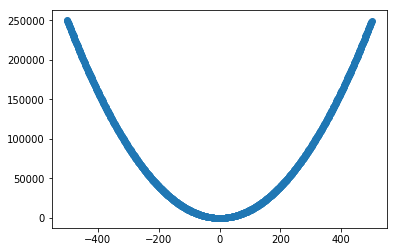

**THE MINIMUM VALUE BY TAKING 1000 RANDOM POINTS IS 0**

In [25]:
f = [x ** 2 for x in range(-500, 500)]
plt.scatter([x for x in range(-500, 500)], f)
plt.show()
printmd("**THE MINIMUM VALUE BY TAKING {} RANDOM POINTS IS {}**".format(len(f), min([f[np.random.choice(range(1000))] for _ in range(1000)])))

# Well done!
Did you try that enough number of times till you got 0? Of course, you know zero is the minima for this function. 

What about the function did we use to get to the minima?

Nothing, really.

# Suppose we knew how to look ahead from where we were, how would we calculate the minima?
You want to know where you will be in 10 minutes if you travel at your current speed wrt where you are now.

# Now suppose you can't look ahead, but I tell you that you could derive what "ahead" would look like? 

You want to know where you will be in 10 minutes if you travel at your current speed wrt where you are now, but you don't know your speed. :\

# Stochastic Gradient Descent
Vanilla update. The simplest form of update is to change the parameters along the negative gradient direction. We are trying to identify the x where f(x) is minimum

$x += -$learning rate $ * \frac {d}{dx}(f(x))$

In [26]:
def SGD_quad(lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    #orig_err = np.sum((lst_of_ws.dot(lst_of_xs.T))**2)
    printmd("**STARTING POINT: {}**".format(lst_of_ws))
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = delta = 2 * lst_of_ws
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 2 * lst_of_ws
        delta = delta.reshape(1,)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        counter += 1
    dict_of_ws_for_viz['SGD'] = viz_ws
    printmd("**FINAL POINT: {}**".format(lst_of_ws))
    printmd("**NUMBER OF STEPS: {}**".format(counter))
    return dict_of_ws_for_viz, lst_of_ws

lst_of_ws = np.array([-10.])
xx = SGD_quad(copy.deepcopy(lst_of_ws), 0.01)

**STARTING POINT: [-10.]**

**FINAL POINT: [-0.00242741]**

**NUMBER OF STEPS: 412**

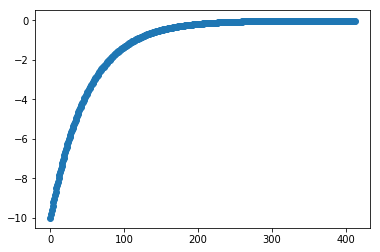

In [4]:
plt.scatter([i for i in range(len(xx[0]['SGD']))], [x for x in xx[0]['SGD']])

# Now, let's go a little closer to the real problem that we want to solve
Create the data using the equation 

$y = 1.5 * x_1 + 3.7 * x_2$

$x_1 \in [0, 1]$

$x_2 \in [0, 1]$

**P.S.**: nudge $x_1$ and $x_2$ ever so slightly so that the data is not exactly conforming to this plane. nudge it small enough so that this plane still fits the data the best

In [5]:
#PREPARING SOME RANDOM DATA IN 3 DIMENSION WITH EQUATION Y = AX1 + BX2
x1 = [x * 1./1000 for x in range(1000)]
x2 = [x * 1./1000 for x in range(1000)]
np.random.shuffle(x1)
# np.random.shuffle(x2)
x1 = np.array(x1); x2 = np.array(x2)
randomiser = np.random.random(len(x1))*1.
y = 1.5 * x1 + 3.7 * x2 + randomiser*1./10

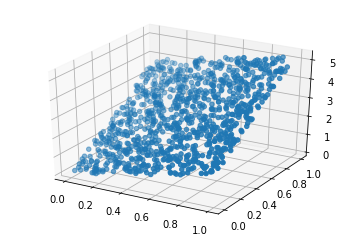

In [6]:
#DATA VIS IN 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, zdir='z', s=20, c=None, depthshade=True)

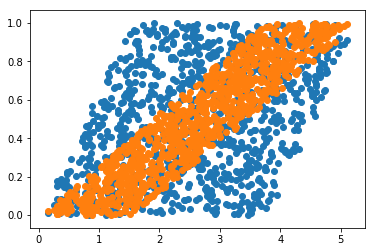

In [7]:
#DATA VIS IN 2D
plt.scatter(y, x1)
plt.scatter(y, x2)

# Fitting a plane to this data
We will be trying to identify a plane of the form 

$y = w_1 * x_1 + w_2 * x_2$

$w_1$ and $w_2$ will be learnt numerically. 

We will learn a few algorithms that does this job for us and compare their performances

# Loss function - squared loss

# IMPORTANT QUESTIONS
   **What are we estimating?**
   
   **What really are we minimizing?**
   
   **How are we attempting to minimize?**
   
   **What will the derivative look like?**

In [8]:
def SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2) * 1. / len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['SGD'] = viz_ws
    dict_of_errs_for_viz['SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

# Momentum update
Think of the problem of finding the minimum in the parabola. Your velocity is super high (in the negative direction) in the high negatives, and then it slowly reduces to 0 and then starts picking up speed in the positive direction. Why not use the information of your velocity to "look ahead"?

v = mu * v - learning_rate * dx ---> integrate velocity

x += v ---> integrate position

v - keeps track of how position has been changing till now.
mu - equivalent of coefficient of friction - in other words, old gradients not as important as new ones.
dx - current change in position  

In [9]:
def Momentum_SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    #orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['Momentum_SGD'] = viz_ws
    dict_of_errs_for_viz['Momentum_SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

# Nesterov Momentum
<img src=nesterov_momentum.jpg>

x_ahead = x + mu * v
# evaluate dx_ahead (the gradient at x_ahead instead of at x)
v = mu * v - learning_rate * dx_ahead

x += v

In [10]:
def Nesterov_Momentum_SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta + 0.9 * prev_delta)
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        counter += 1
    dict_of_ws_for_viz['Nesterov_Momentum_SGD'] = viz_ws
    dict_of_errs_for_viz['Nesterov_Momentum_SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

# ADAGRAD

Tuning the learning rates is an expensive process, so much work has gone into devising methods that can adaptively tune the learning rates, and even do so per parameter.

cache $+= (dx)^2$

x += - learning_rate * $\frac {dx}{\sqrt{cache + eps}}$

**A downside of Adagrad is that in case of Deep Learning, the monotonic learning rate usually proves too aggressive and stops learning too early.**

In [11]:
def ADAGRAD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        cache += delta ** 2 * 1. / len(lst_of_ys ** 2)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['ADAGRAD'] = viz_ws
    dict_of_errs_for_viz['ADAGRAD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws
   

# RMSPROP

The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. In particular, it uses a moving average of squared gradients instead, giving:

cache = decay_rate $* $cache $+ (1 - $decay_rate$) * dx^2$

x $+= - $learning_rate$* \frac{dx}{\sqrt{cache + eps}}$

In [12]:
def RMSPROP(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        cache = (0.01 * delta ** 2 * 1. / (len(lst_of_ys ** 2))) + 0.99 * cache
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['RMSPROP'] = viz_ws
    dict_of_errs_for_viz['RMSPROP'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

# ADAM

Basically RMSProp + Momentum


m $=$ beta$_1*m + (1-$beta$_1)*dx$

$v = $beta$_2*v + (1-$beta$_2)*dx^2$

$x += - $learning_rate $* \frac{m}{\sqrt{v + eps}}$

In [13]:
def ADAM(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        dx = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        delta = 0.9*delta + 0.1 * dx
        cache = (0.001 * dx ** 2) + 0.999 * cache
        mt = delta / (1 - 0.9**(counter + 1))
        vt = cache / (1 - 0.999**(counter + 1))
        lst_of_ws -= learning_rate * (mt) / (np.sqrt(vt) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['ADAM'] = viz_ws
    dict_of_errs_for_viz['ADAM'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

# RUN ALL THE ALGORITHMS FOR VARIOUS LEARNING RATES

USED [0.0001, 0.001, 0.01, 0.1, 1.0]

In [14]:
lst_of_ys = y
lst_of_xs = np.array([x1, x2]).T
lst_of_ws = np.random.random(2)
#aa = sgd(lst_of_xs, lst_of_ys, lst_of_ws, 0.0001)
lst_of_learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
order = ['SGD', 'Momentum_SGD', 'Nesterov_Momentum_SGD', 'ADAGRAD', 'RMSPROP', 'ADAM']
dict_w_learning_rates = {}
dict_err_learning_rates = {}
dict_w_algo = defaultdict(lambda: defaultdict(list))
dict_err_algo = defaultdict(lambda: defaultdict(list))
for each_rate in lst_of_learning_rates:
    dict_w_learning_rates[each_rate] = {}
    dict_err_learning_rates[each_rate] = {}
    for each_algo in order:
        print each_algo, each_rate
        aa = locals()[each_algo](lst_of_xs, lst_of_ys, copy.deepcopy(lst_of_ws), each_rate)
        dict_w_algo[each_algo][each_rate].append(aa[0])
        dict_err_algo[each_algo][each_rate].append(aa[1])
        dict_w_learning_rates[each_rate].update(aa[0])
        dict_err_learning_rates[each_rate].update(aa[1])

SGD 0.0001
STARTING WEIGHTS:  [0.79002468 0.59782574]
STARTING ERROR:  4655.607198013606
FINAL ERROR:  0.6073085358258642
FINAL WEIGHTS:  [1.94128906 2.12379328]
NUMBER OF STEPS:  10000
Momentum_SGD 0.0001
STARTING WEIGHTS:  [0.79002468 0.59782574]
STARTING ERROR:  4655.607198013606
FINAL ERROR:  0.009458703347539352
FINAL WEIGHTS:  [1.75700627 3.52722282]
NUMBER OF STEPS:  10000
Nesterov_Momentum_SGD 0.0001
STARTING WEIGHTS:  [0.79002468 0.59782574]
STARTING ERROR:  4655.607198013606
FINAL ERROR:  0.0016177774347874323
FINAL WEIGHTS:  [1.58437284 3.69988735]
NUMBER OF STEPS:  10000
ADAGRAD 0.0001
STARTING WEIGHTS:  [0.79002468 0.59782574]
STARTING ERROR:  4655.607198013606
FINAL ERROR:  2.389393805288347
FINAL WEIGHTS:  [1.37537329 1.19128806]
NUMBER OF STEPS:  10000
RMSPROP 0.0001
STARTING WEIGHTS:  [0.79002468 0.59782574]
STARTING ERROR:  4655.607198013606
FINAL ERROR:  0.0012905168803433746
FINAL WEIGHTS:  [1.55309073 3.72803033]
NUMBER OF STEPS:  1365
ADAM 0.0001
STARTING WEIGHTS:

# Reminder of what we are predicting

$w1 = 1.5$

$w2 = 3.7$

# For each algorithm, for each learning rate, number of iterations taken to converge

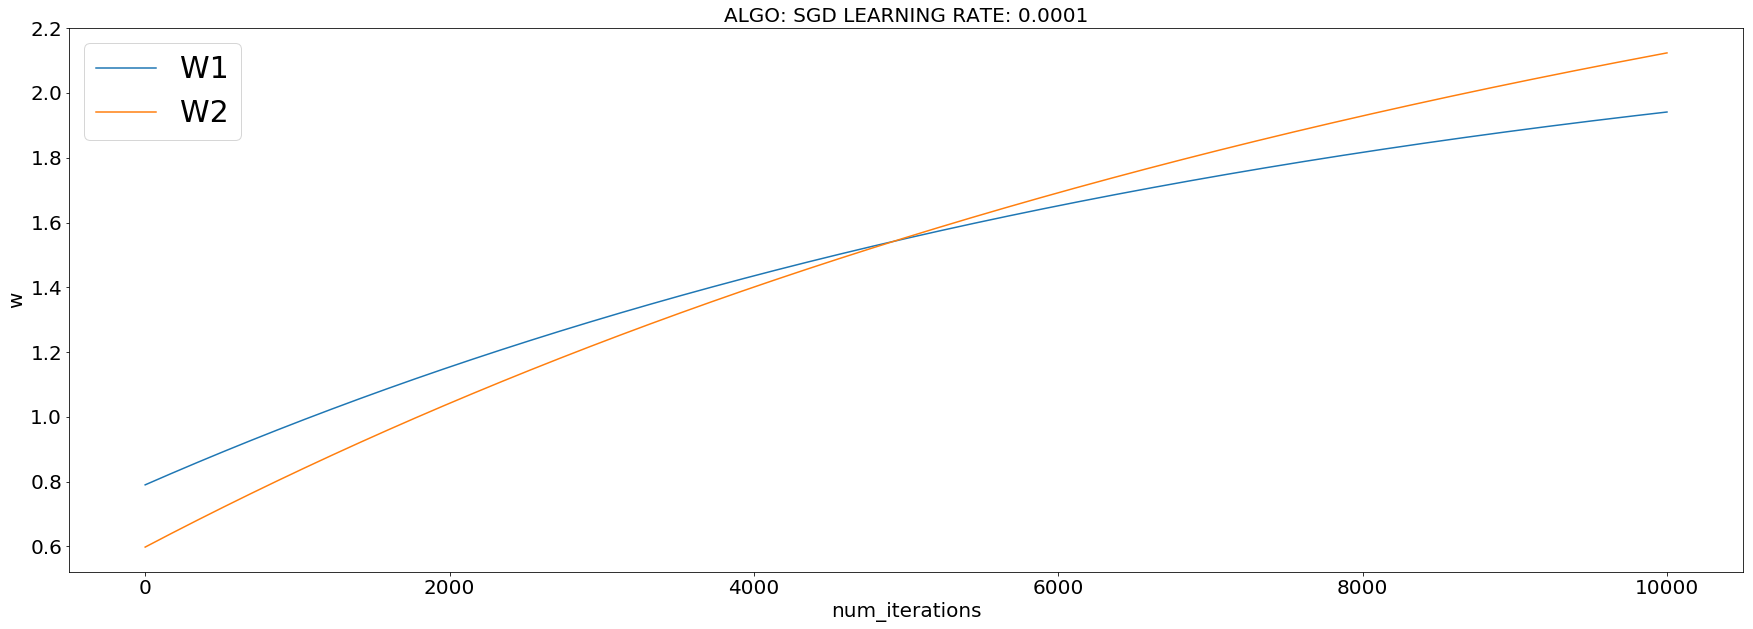

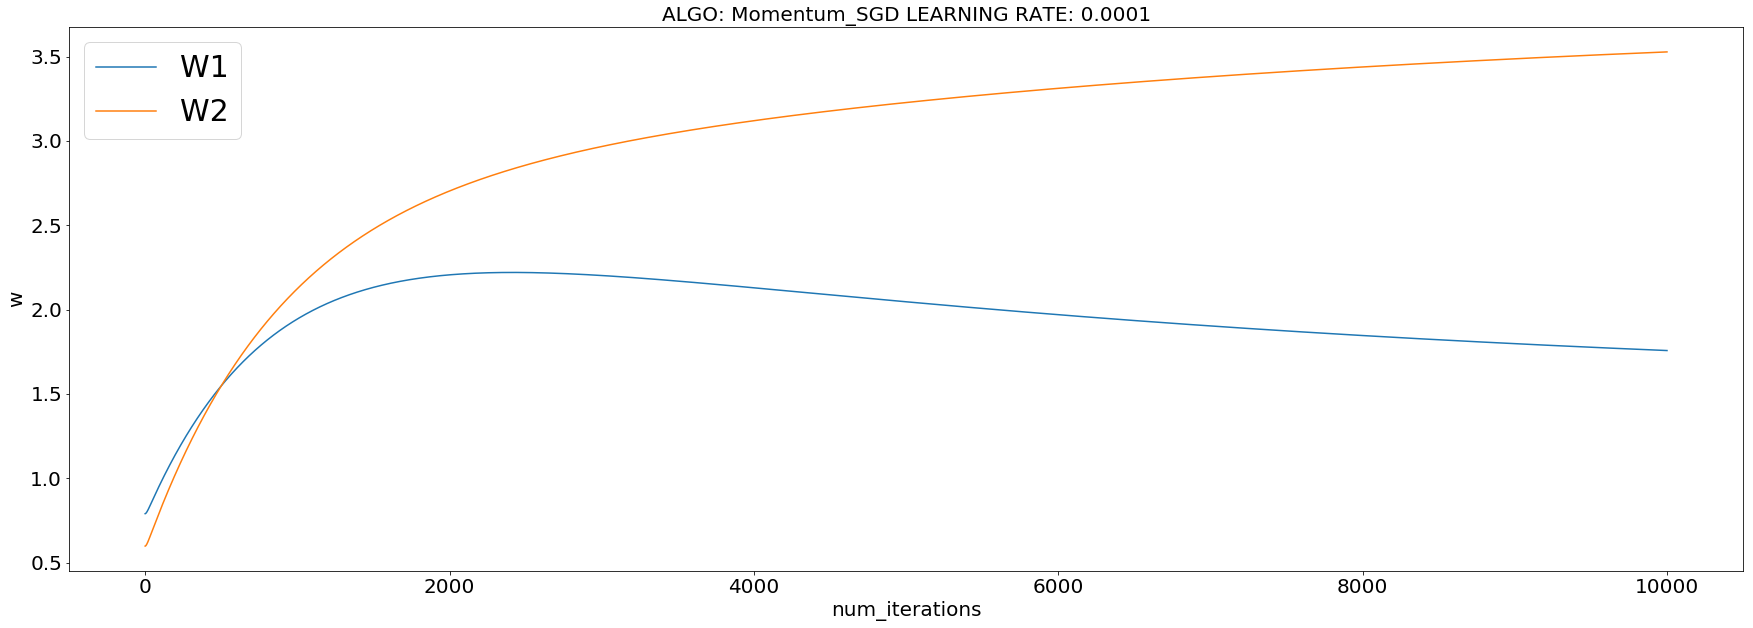

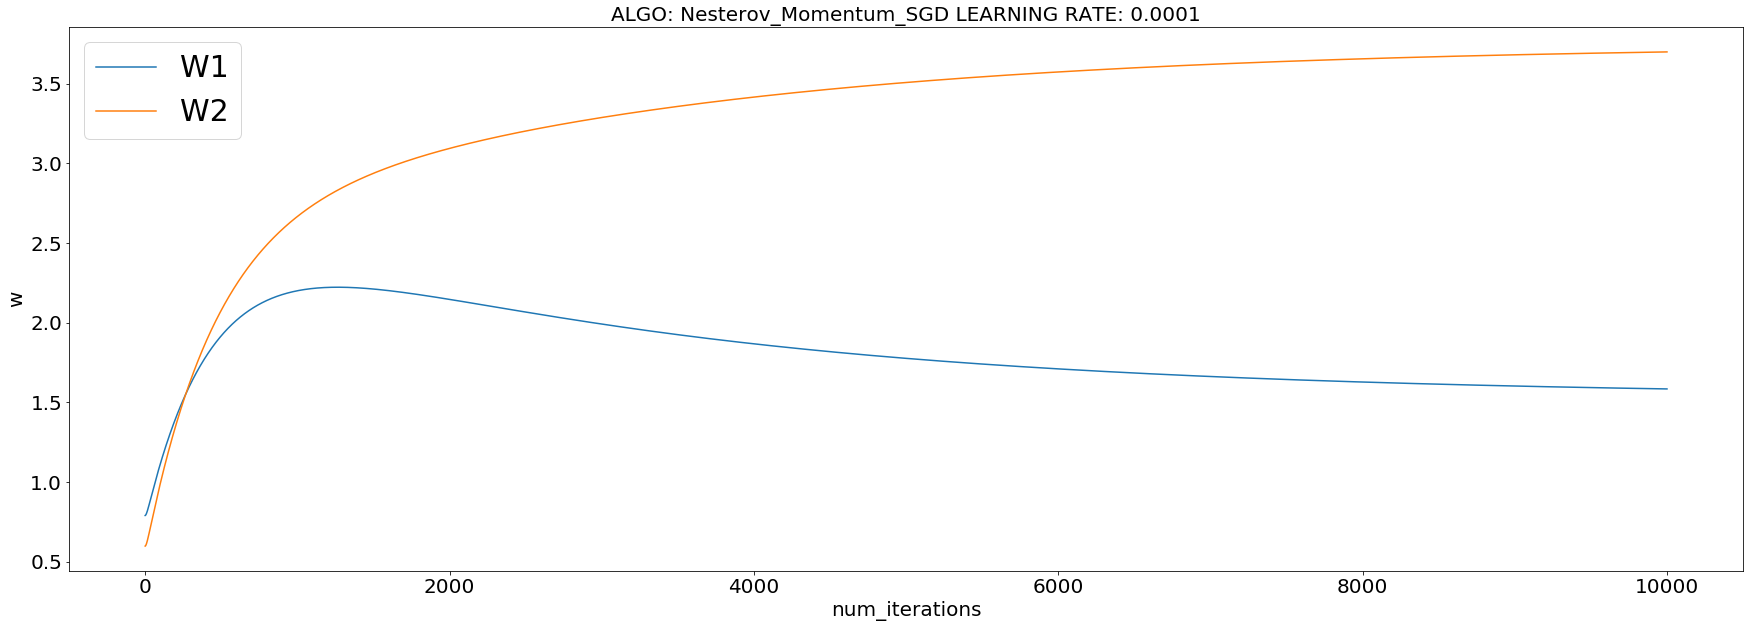

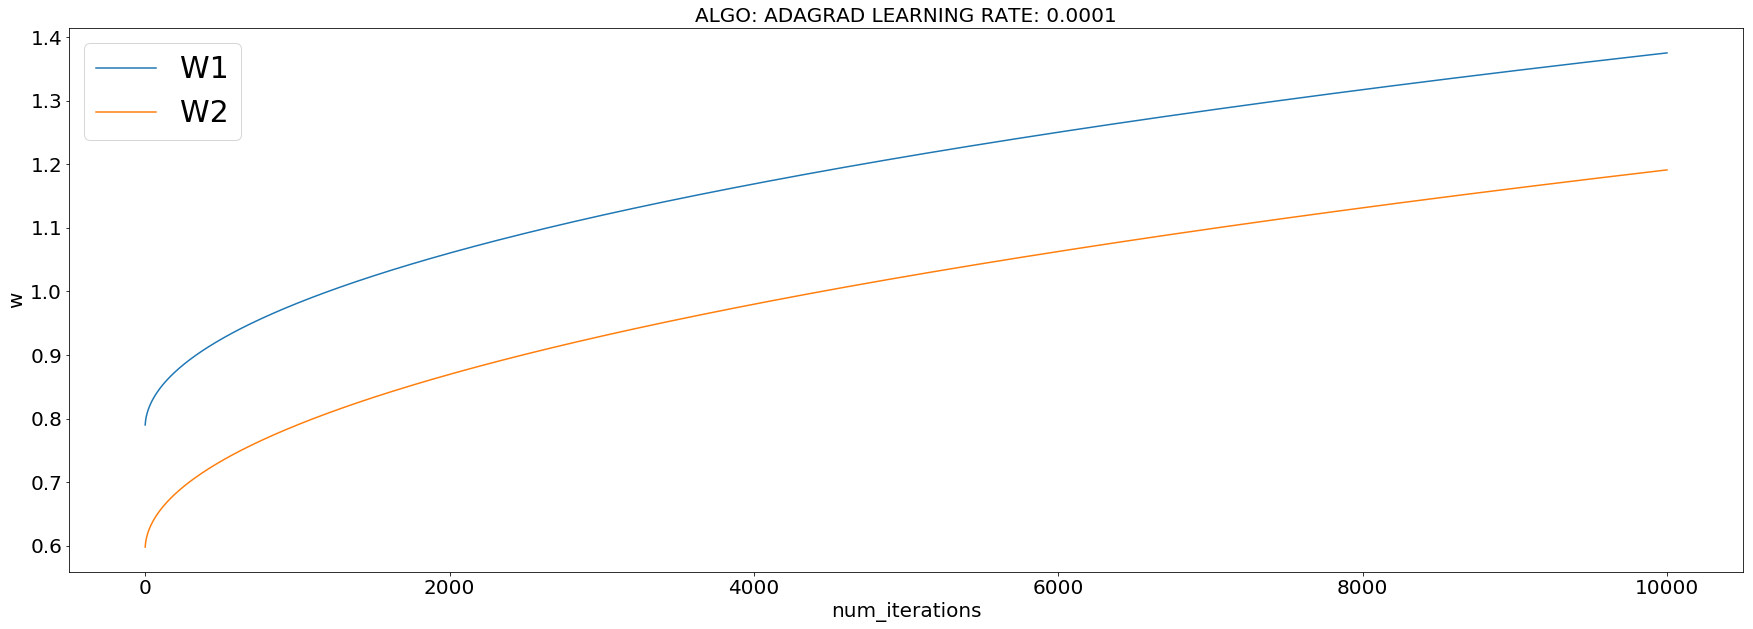

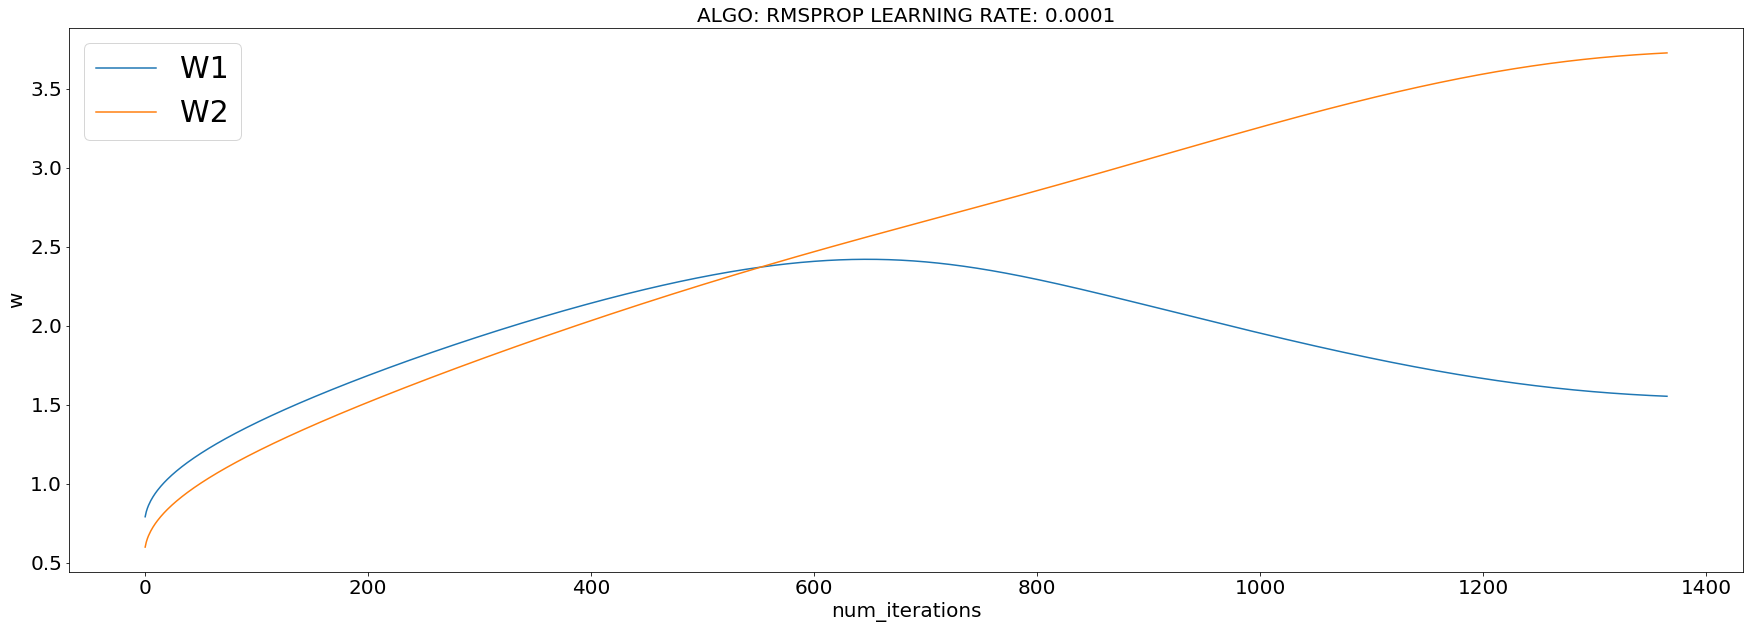

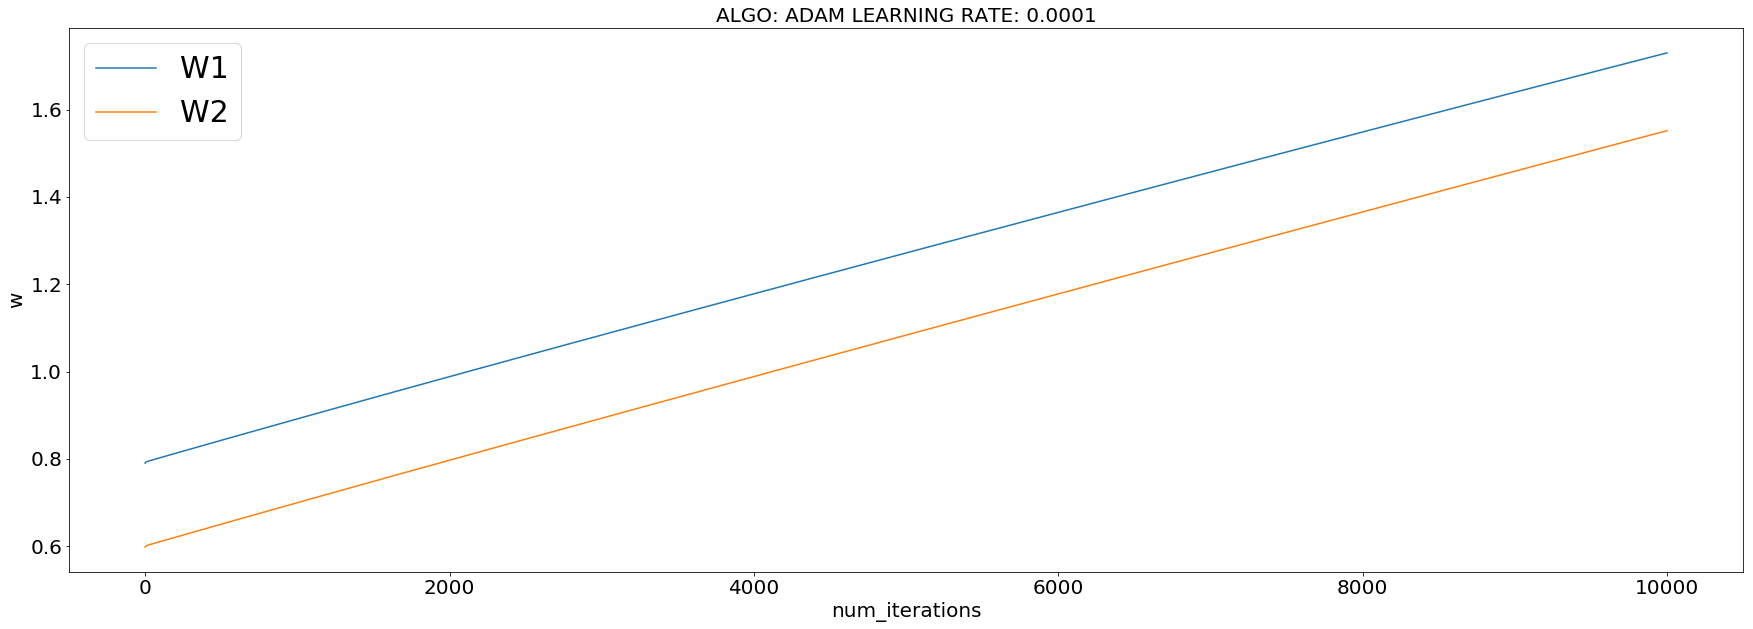

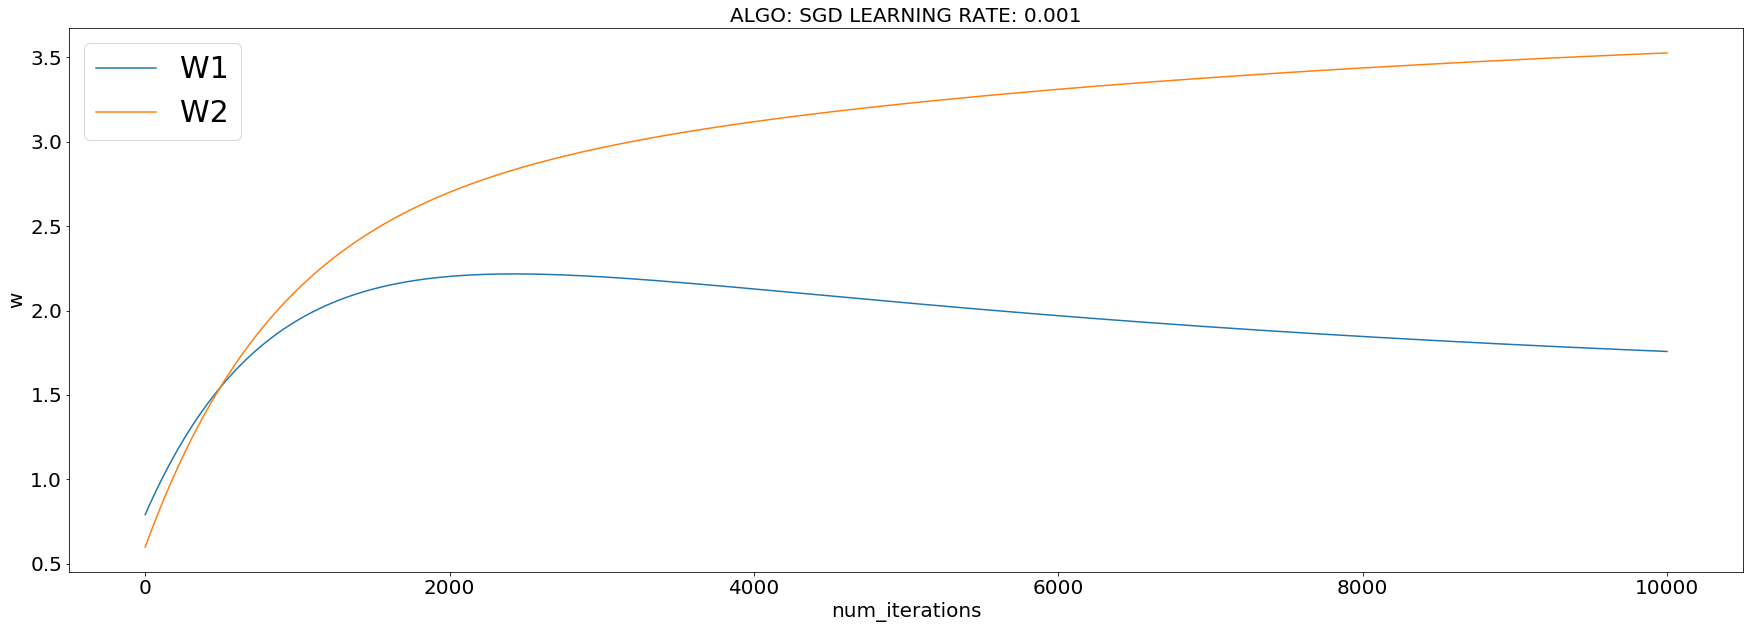

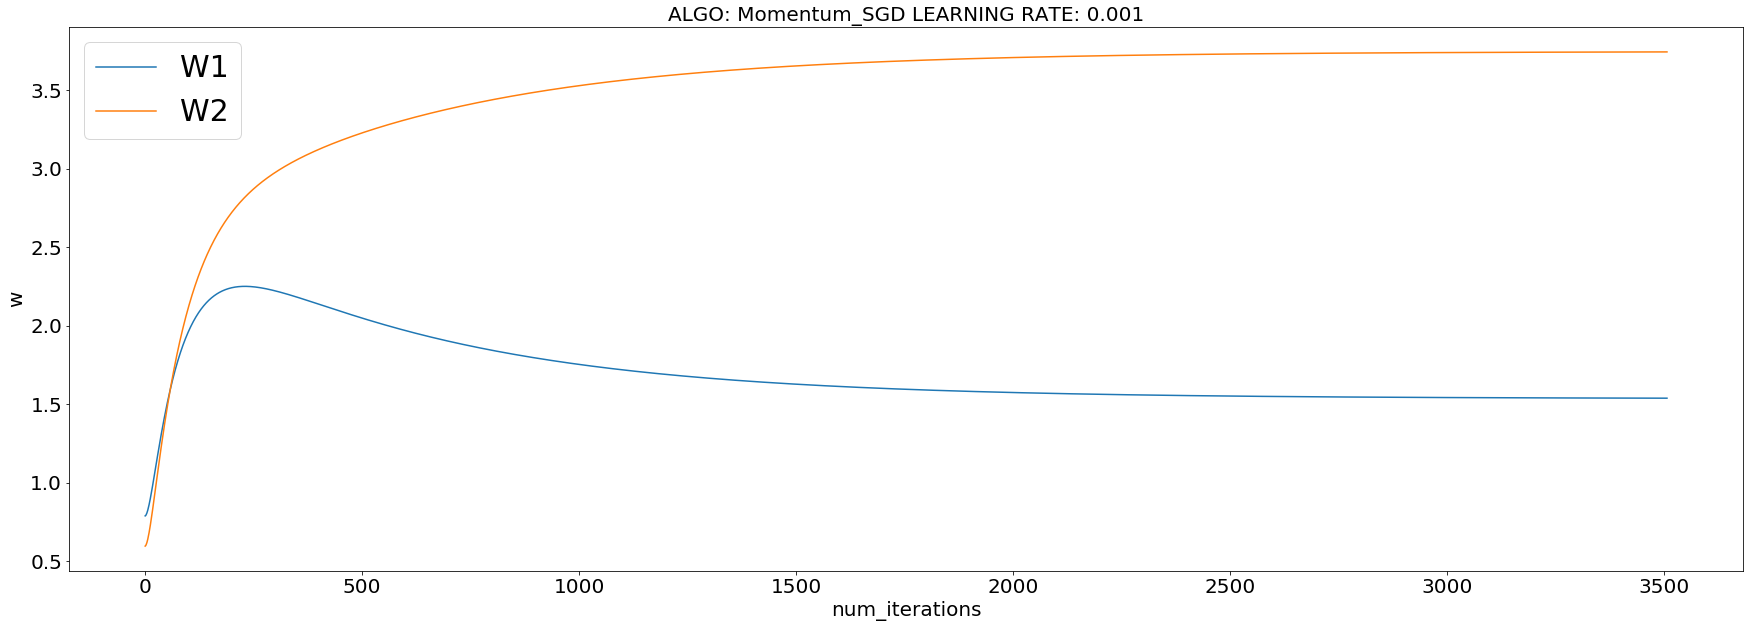

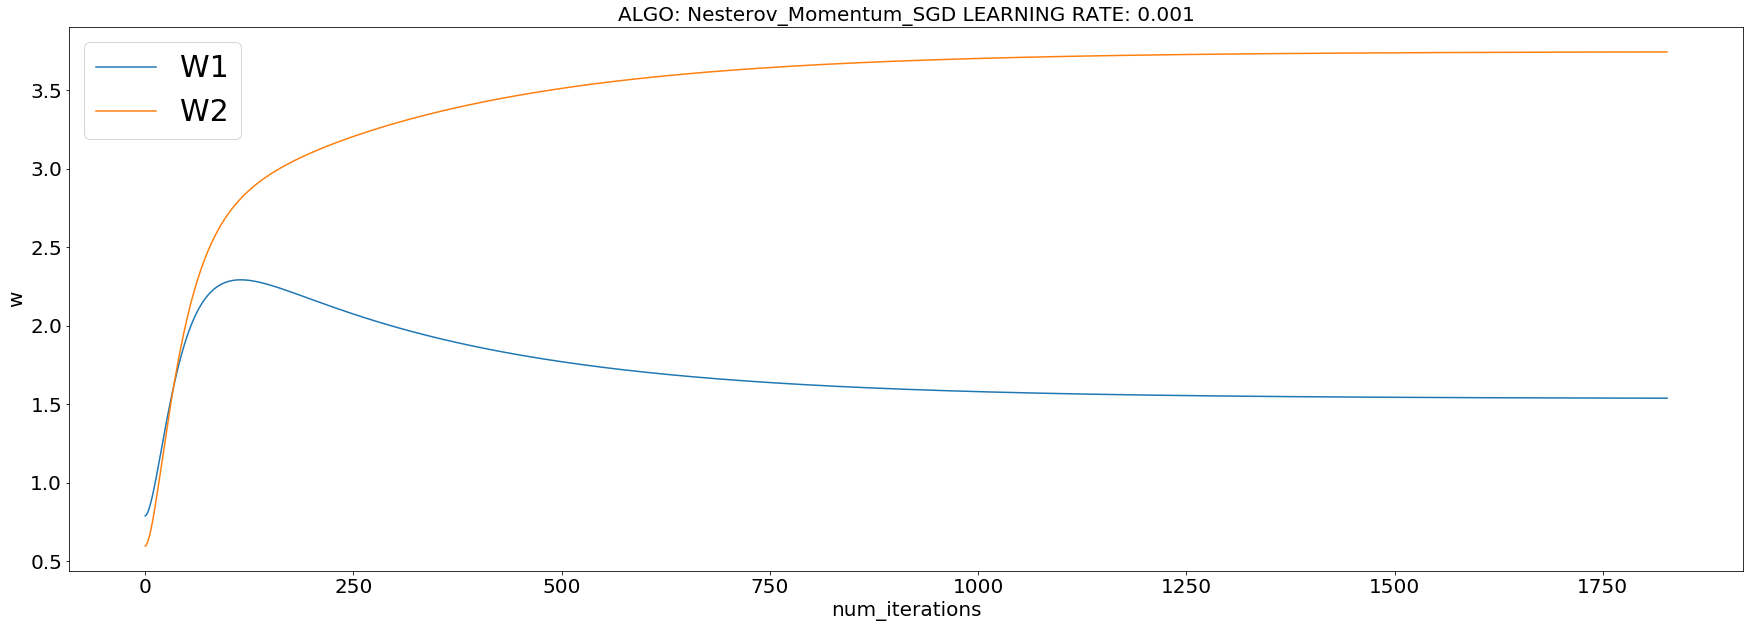

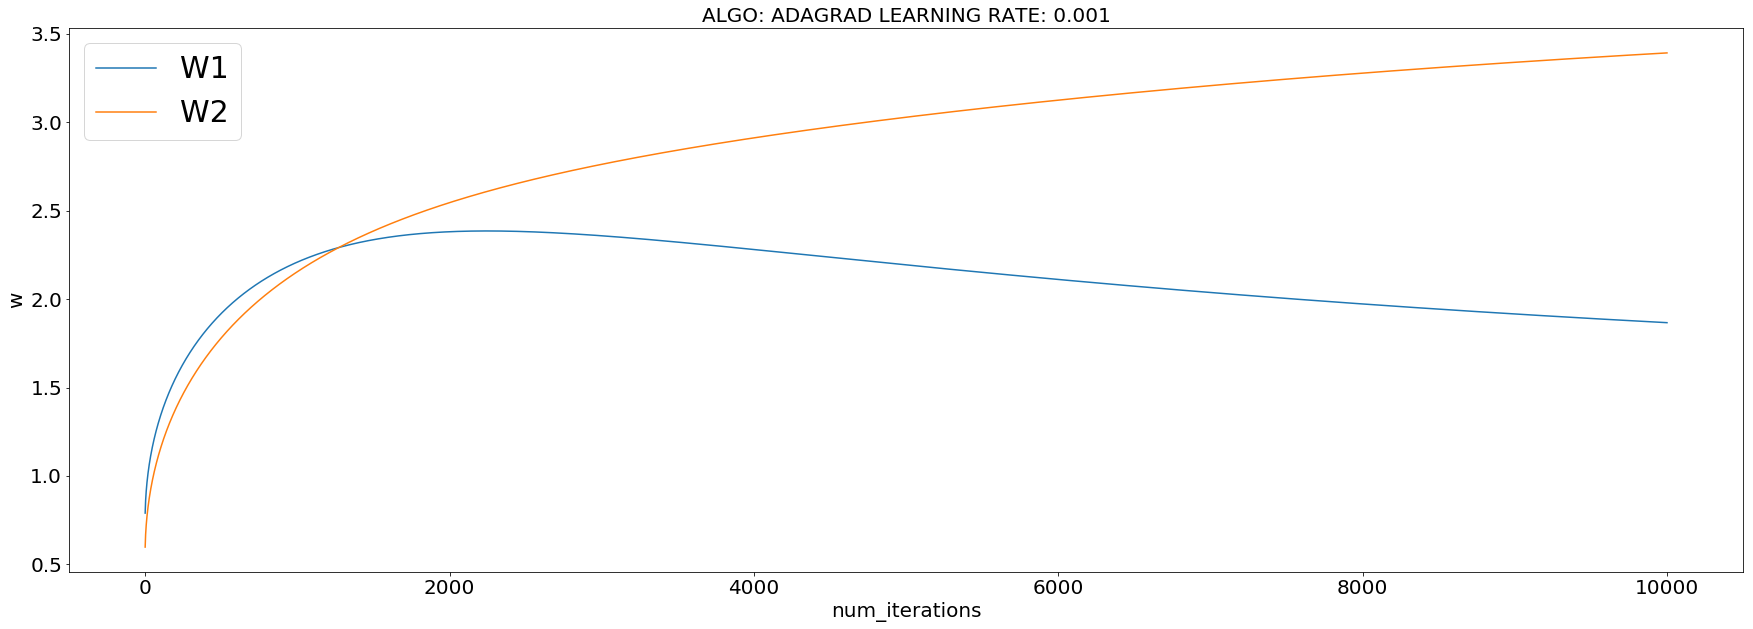

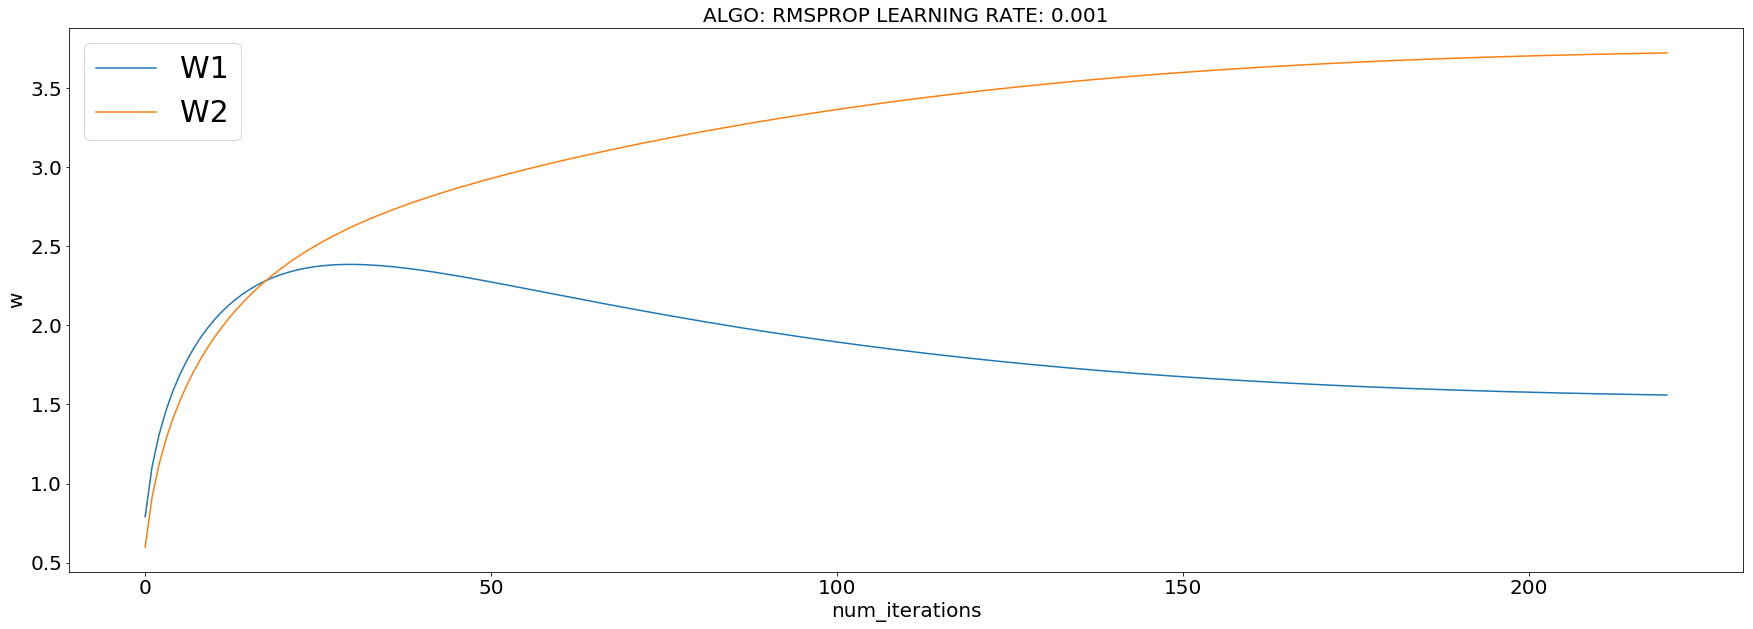

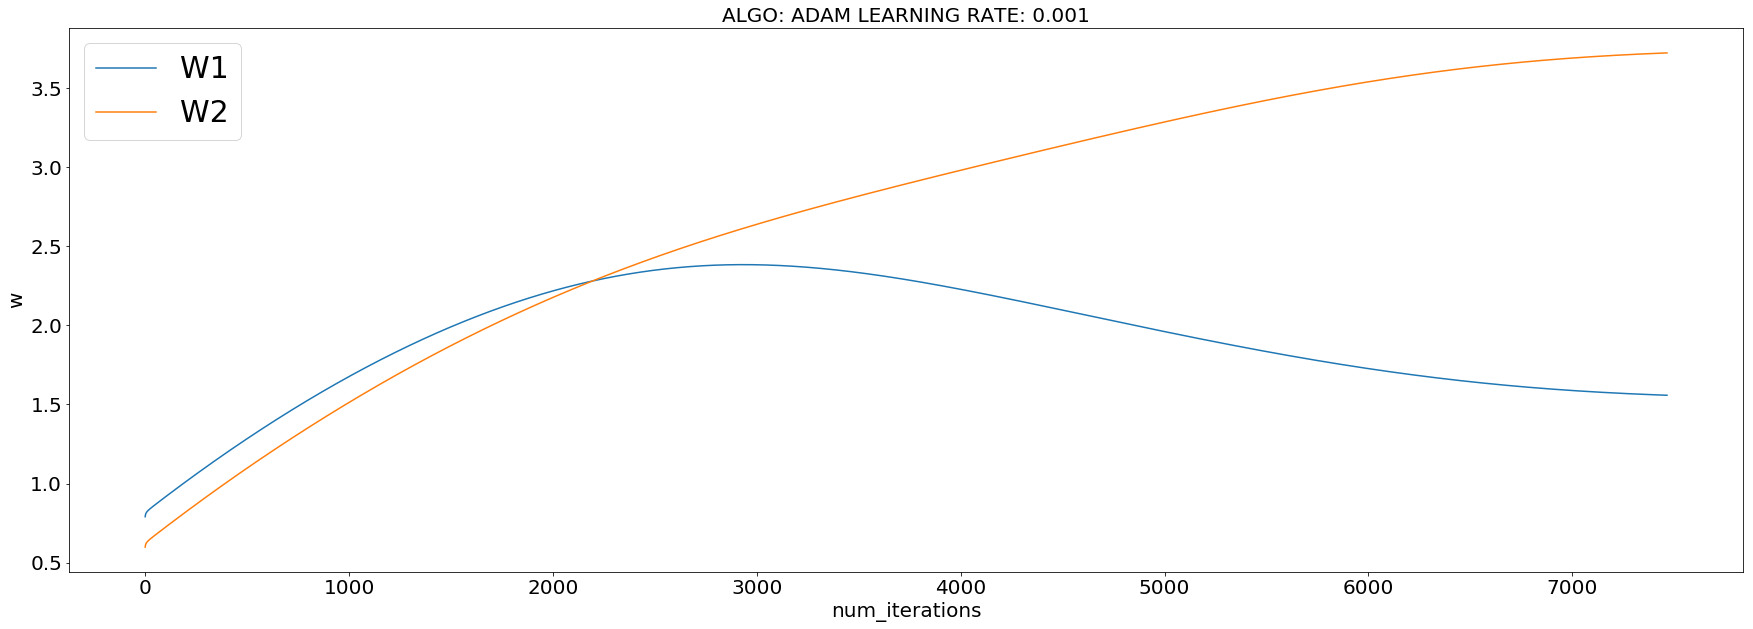

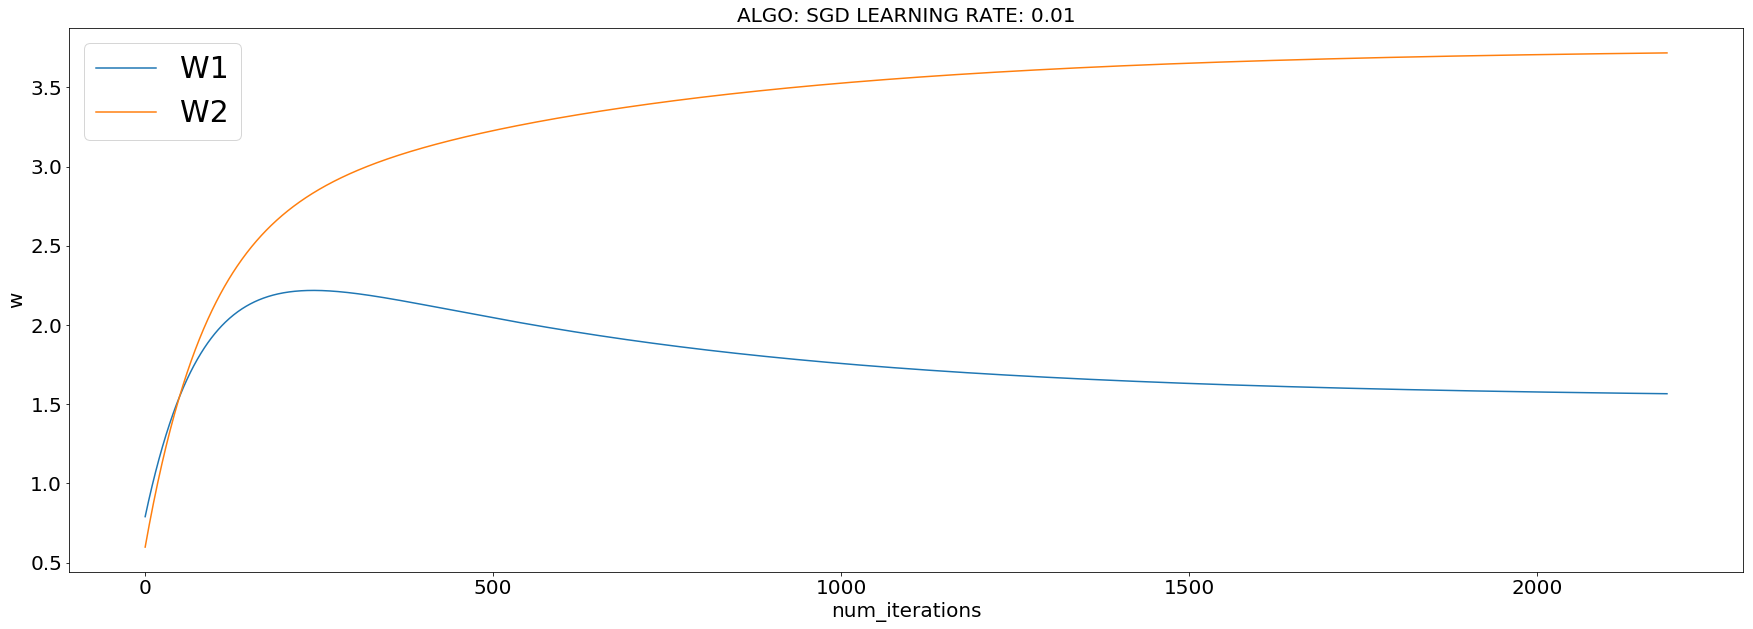

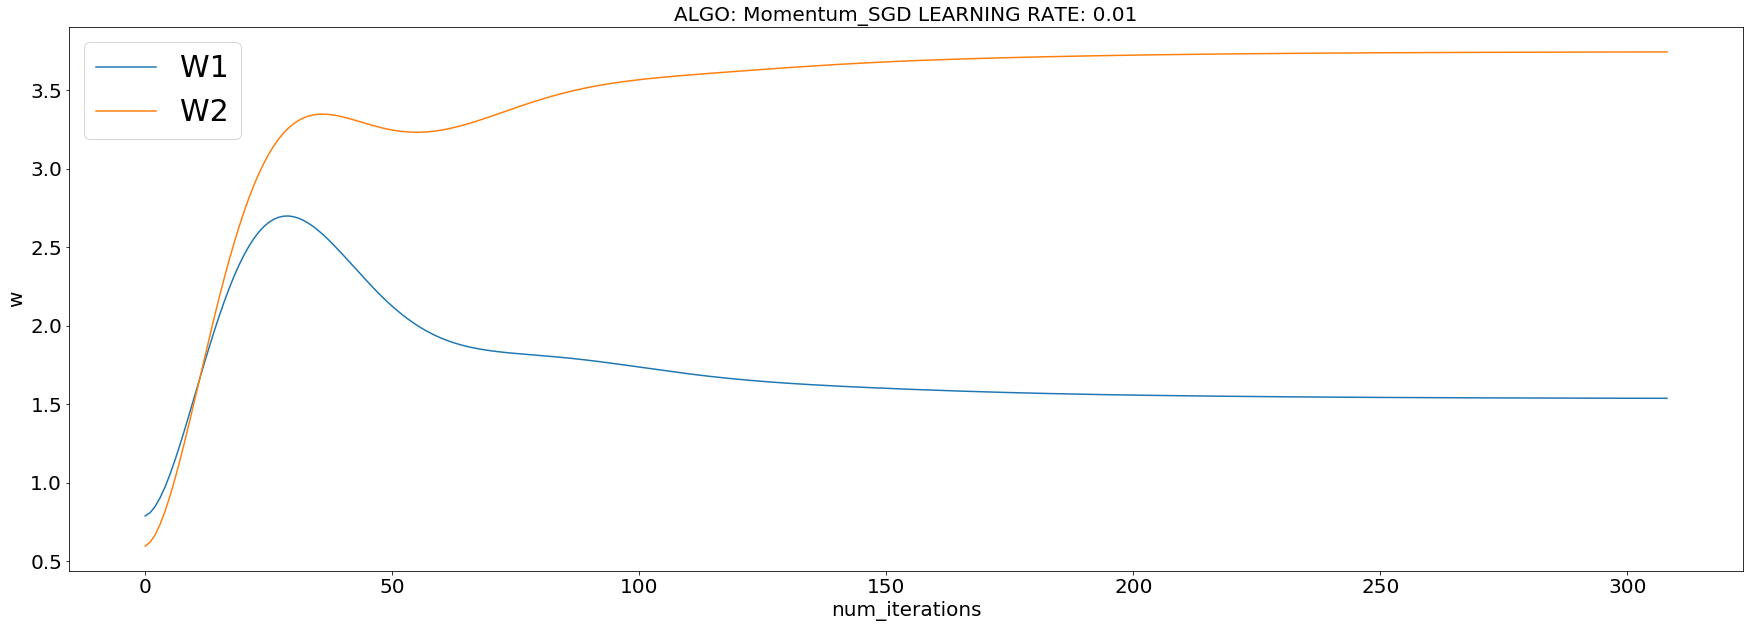

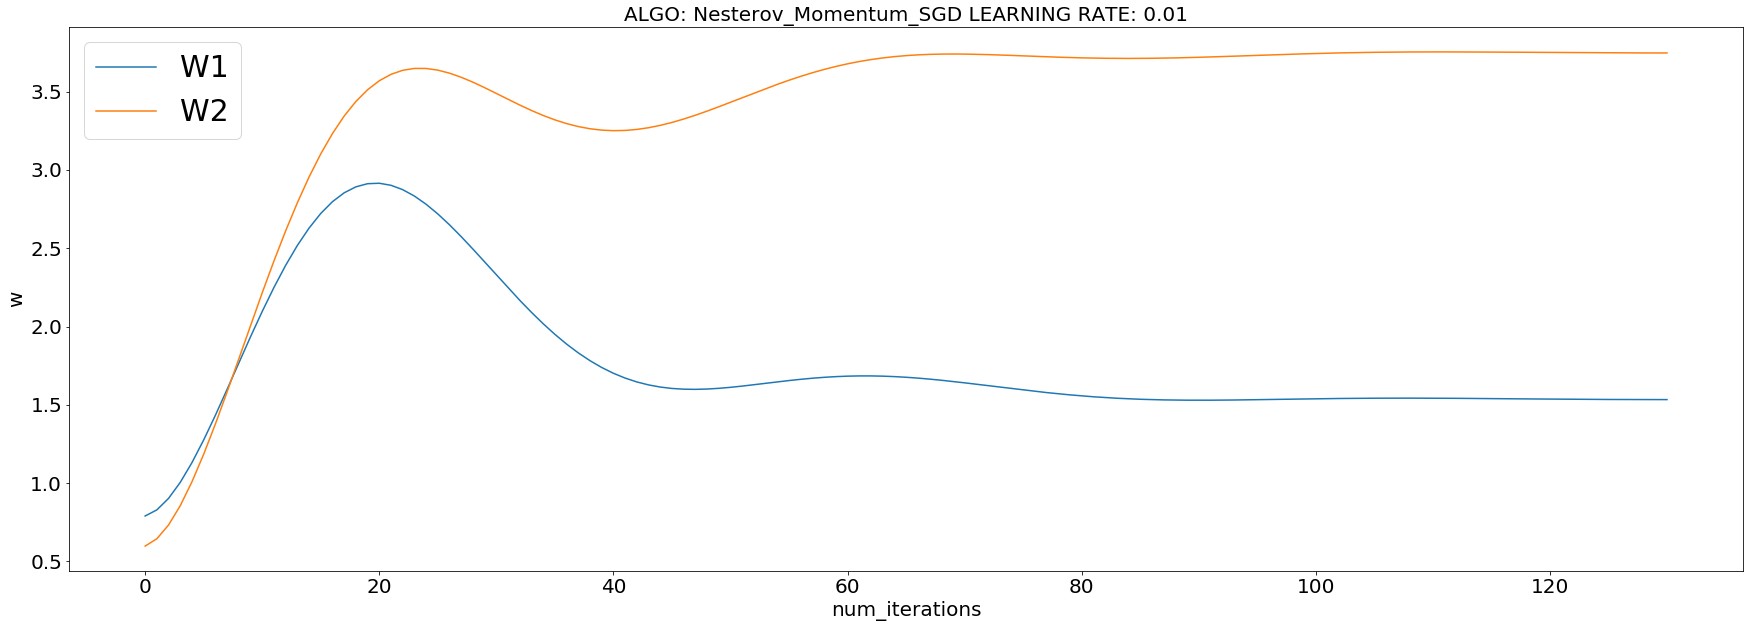

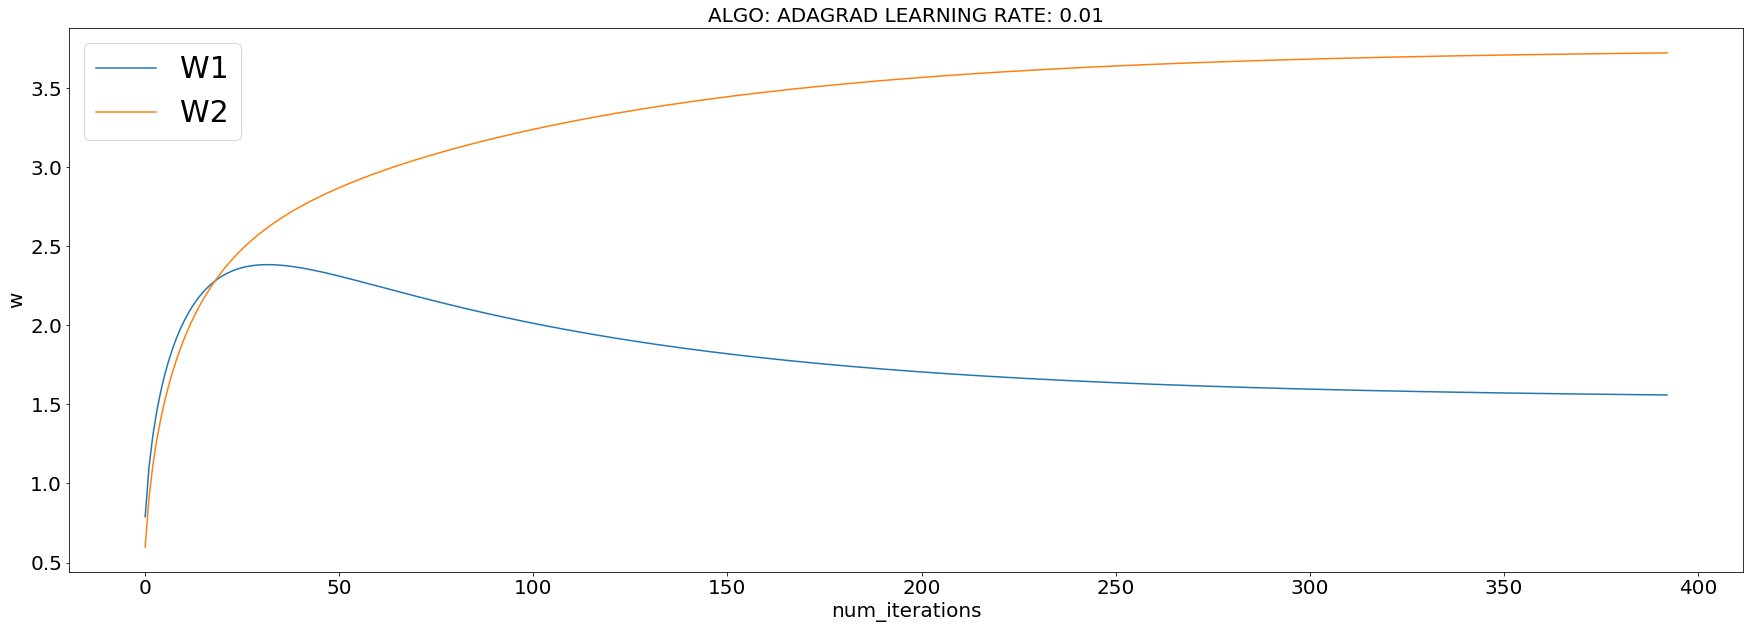

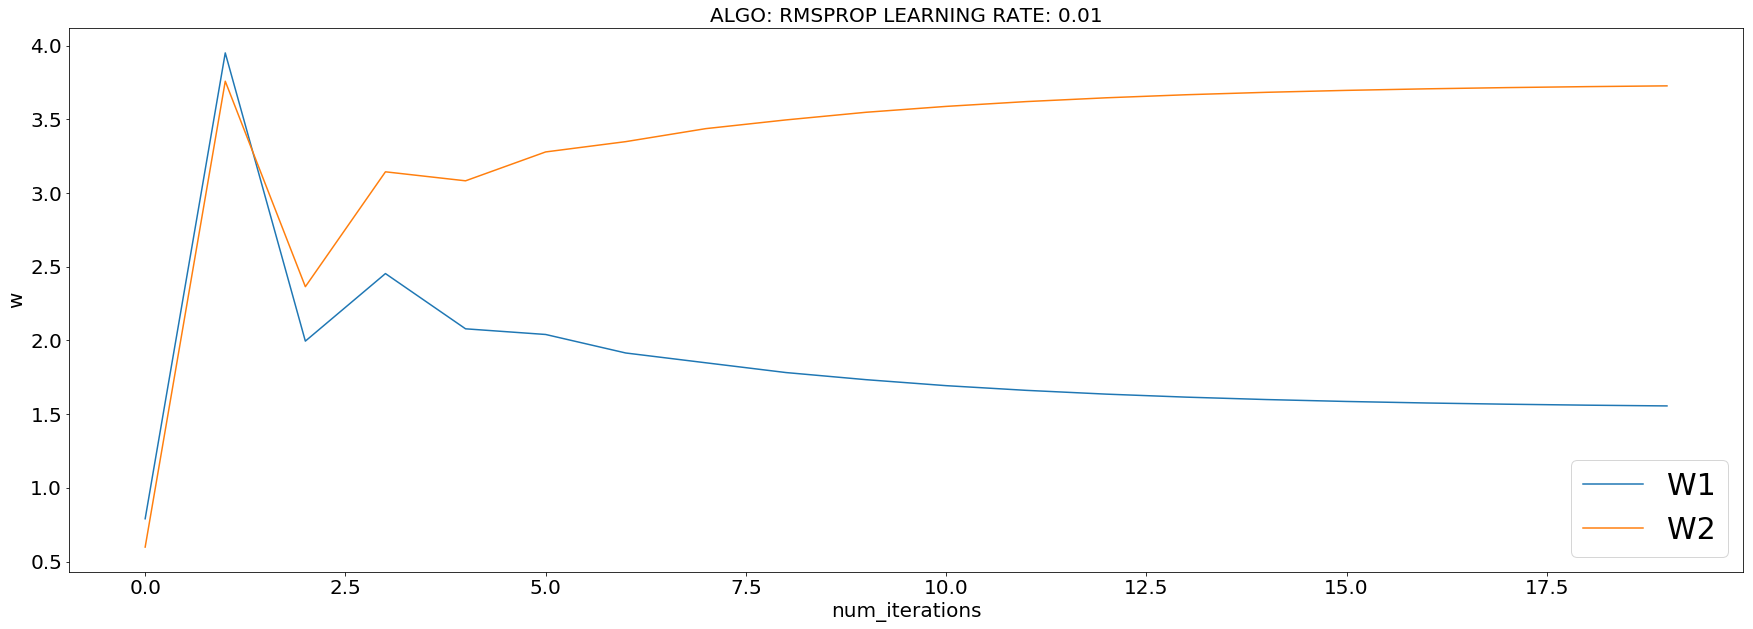

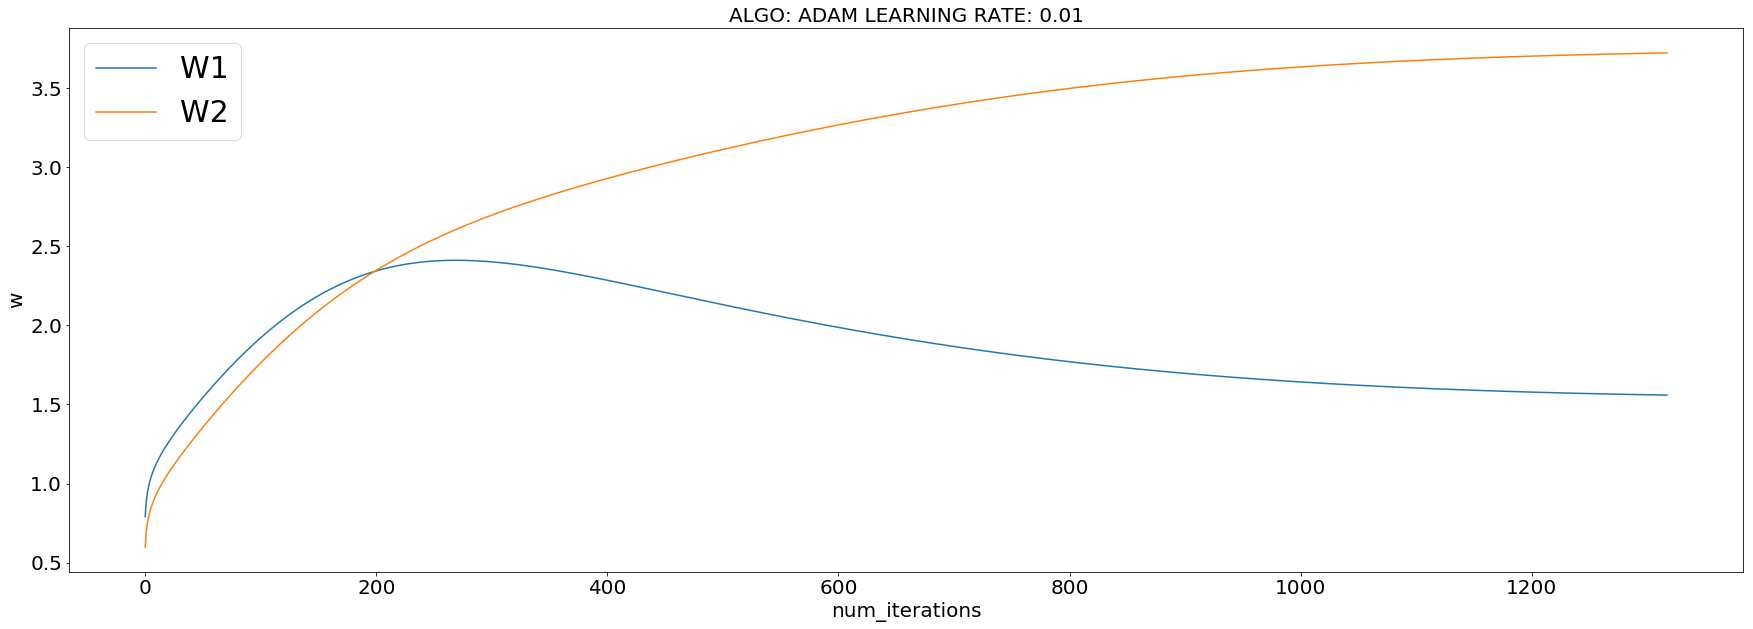

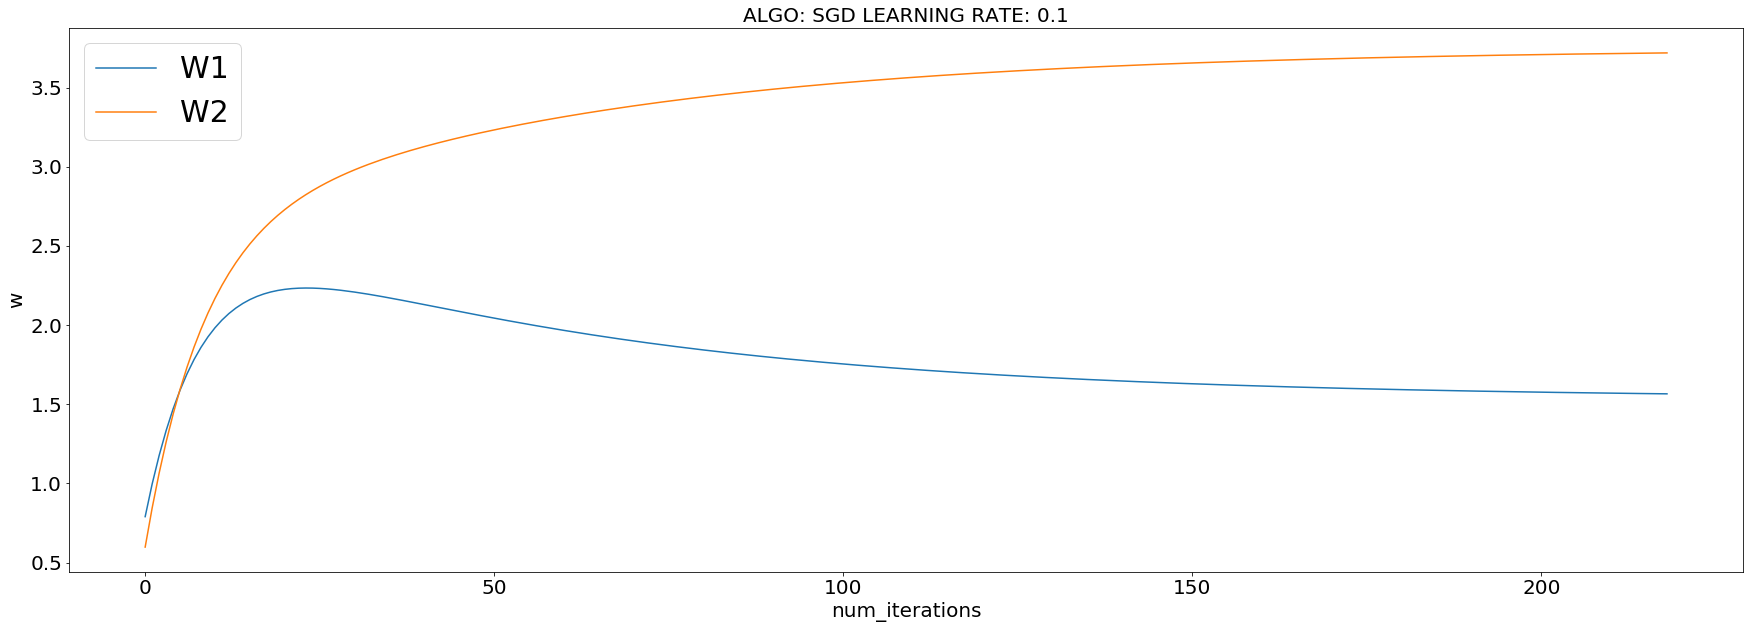

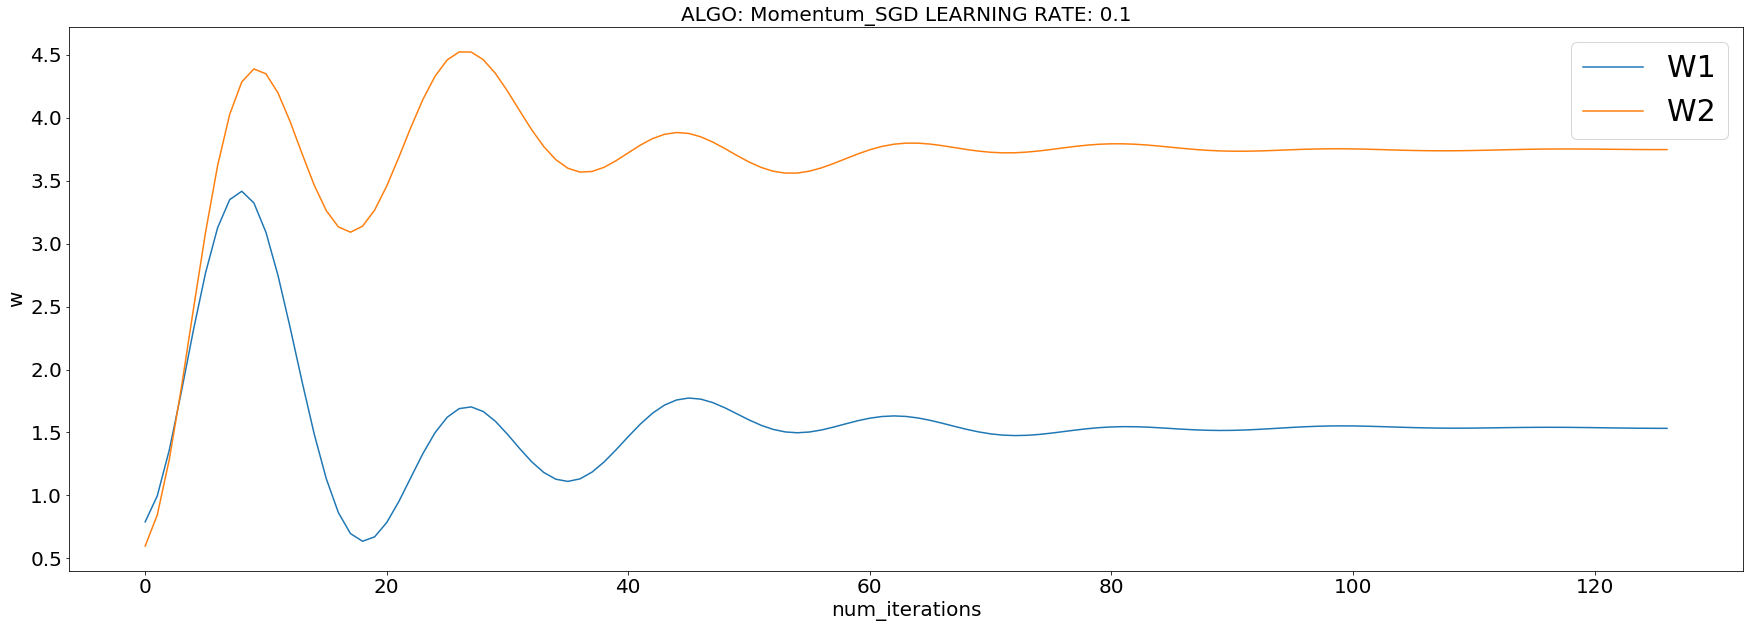

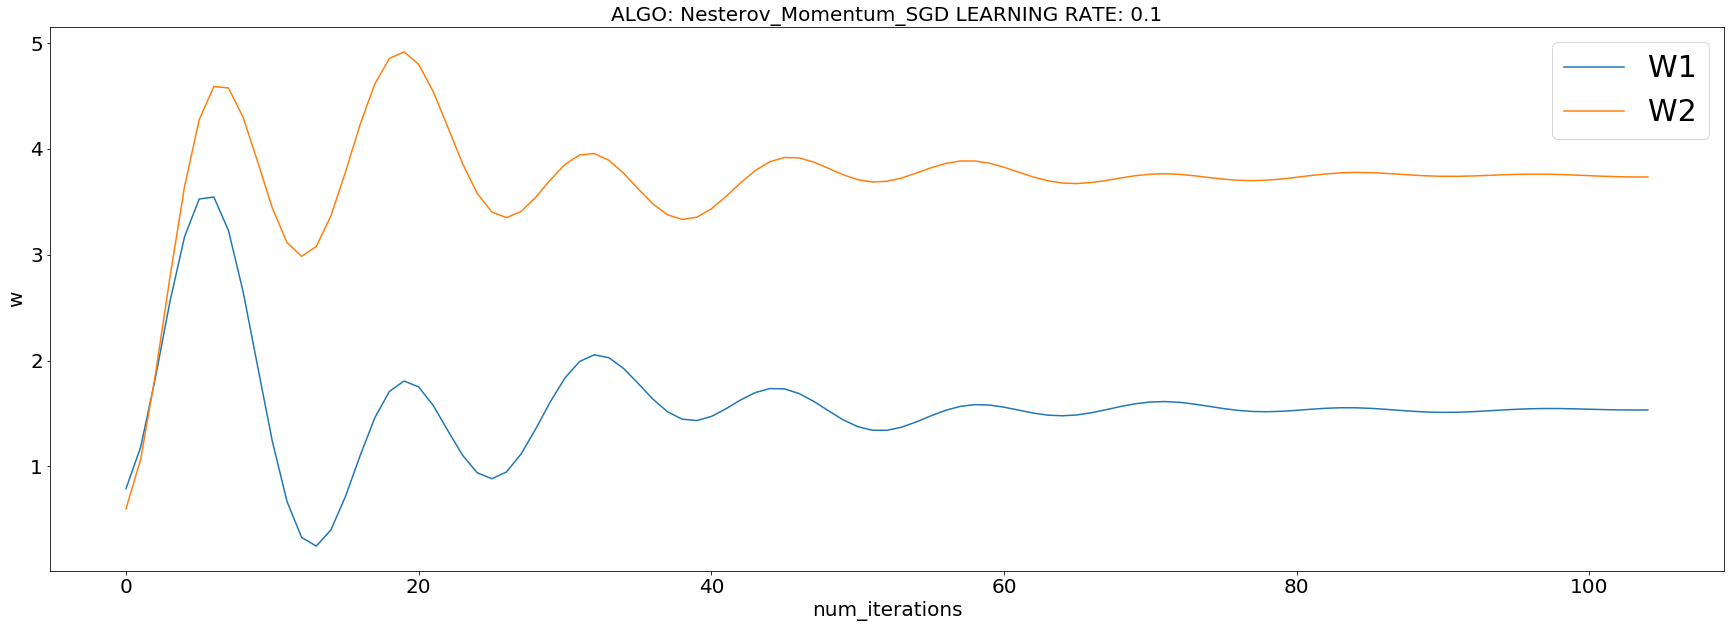

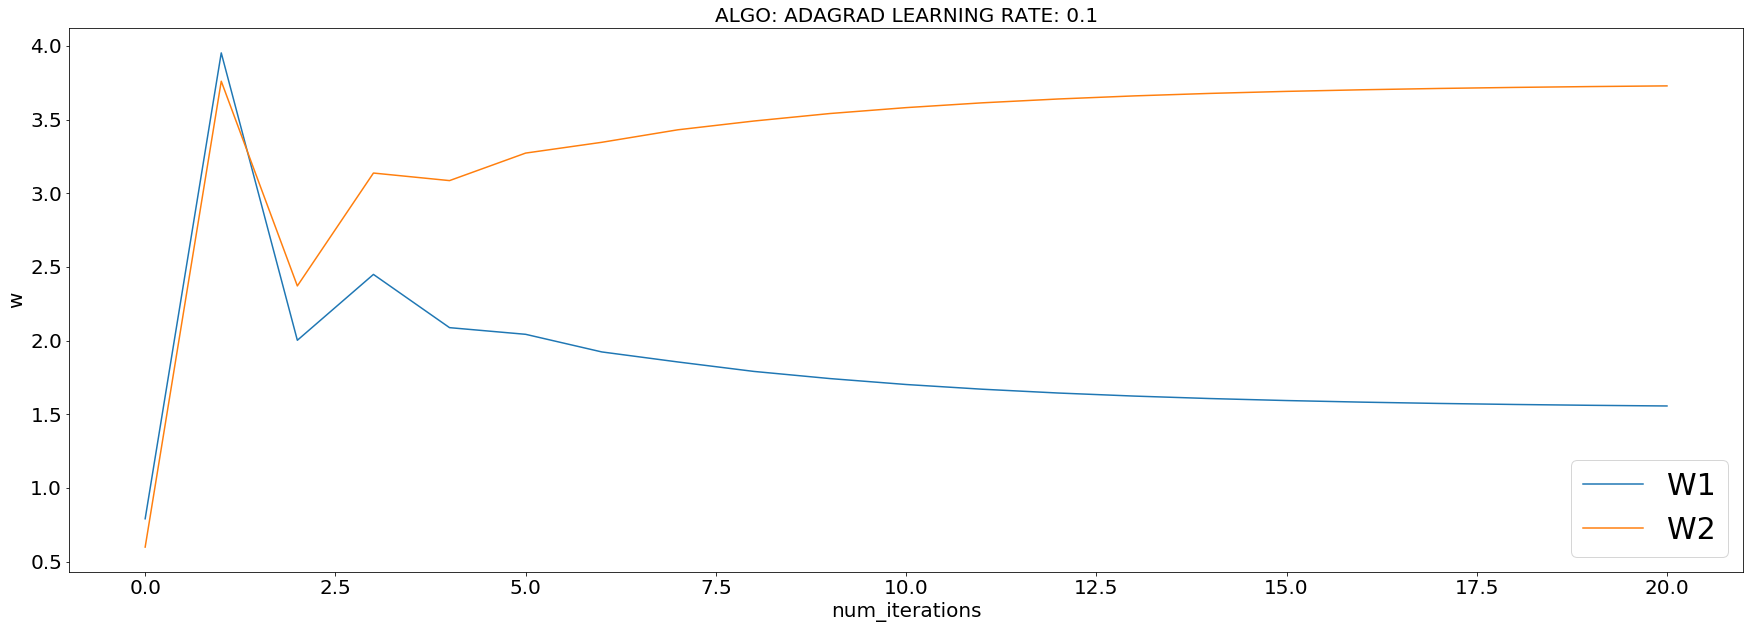

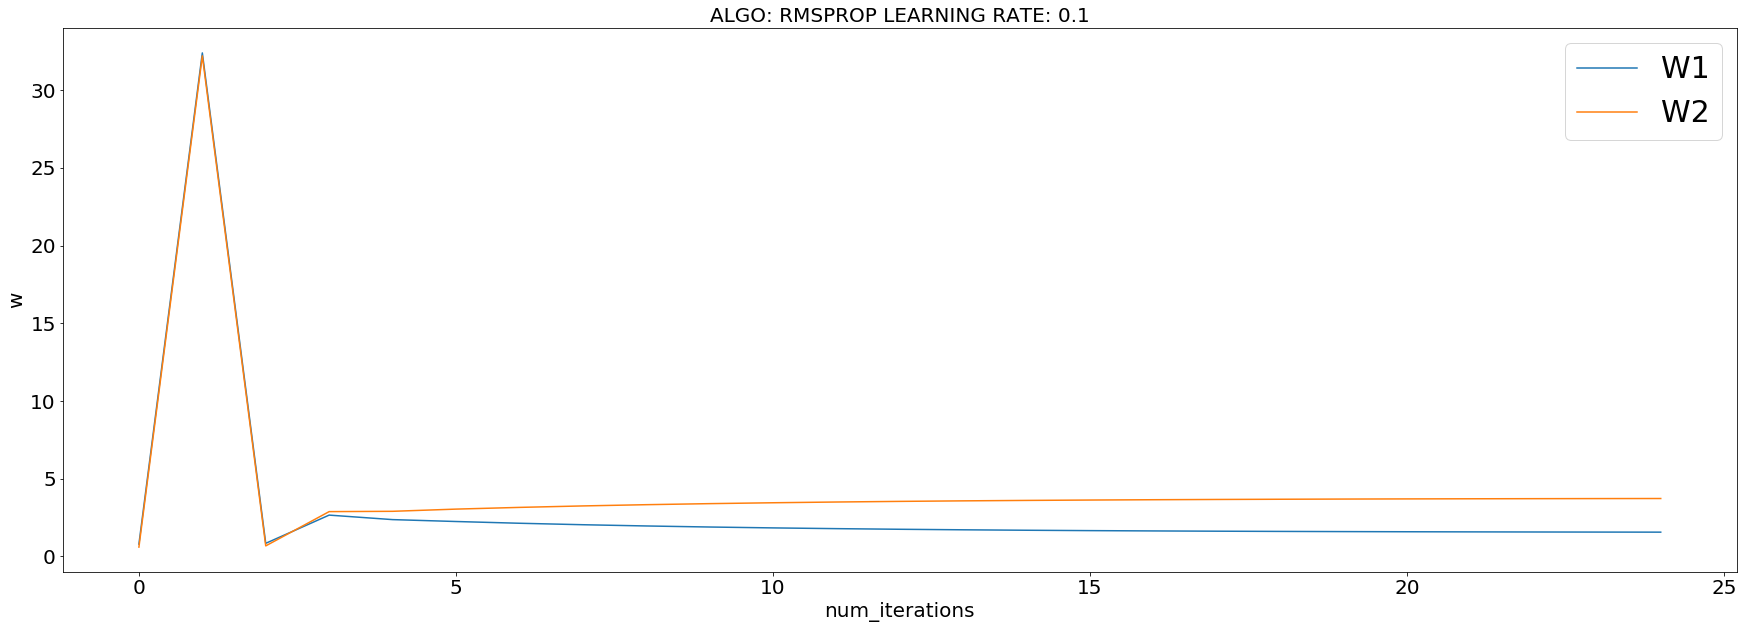

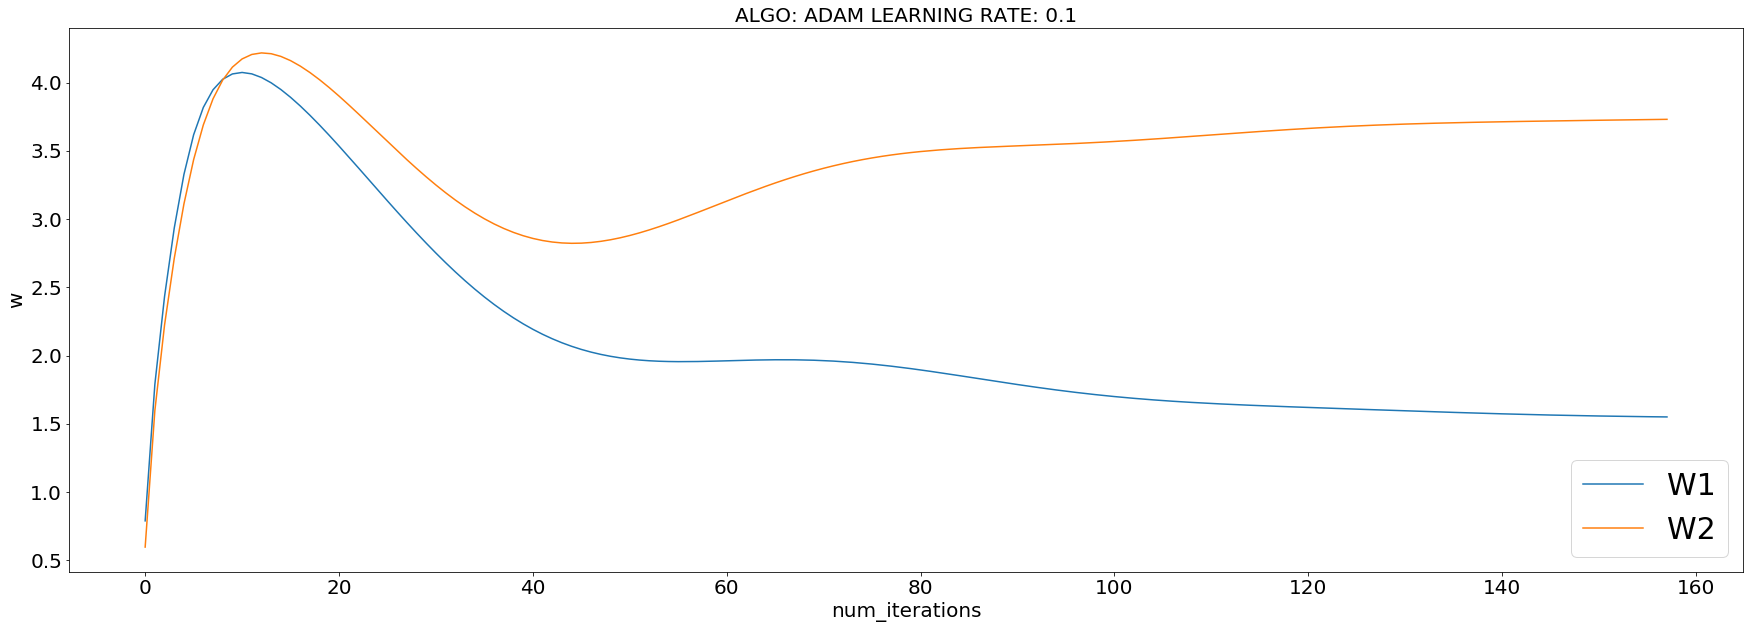

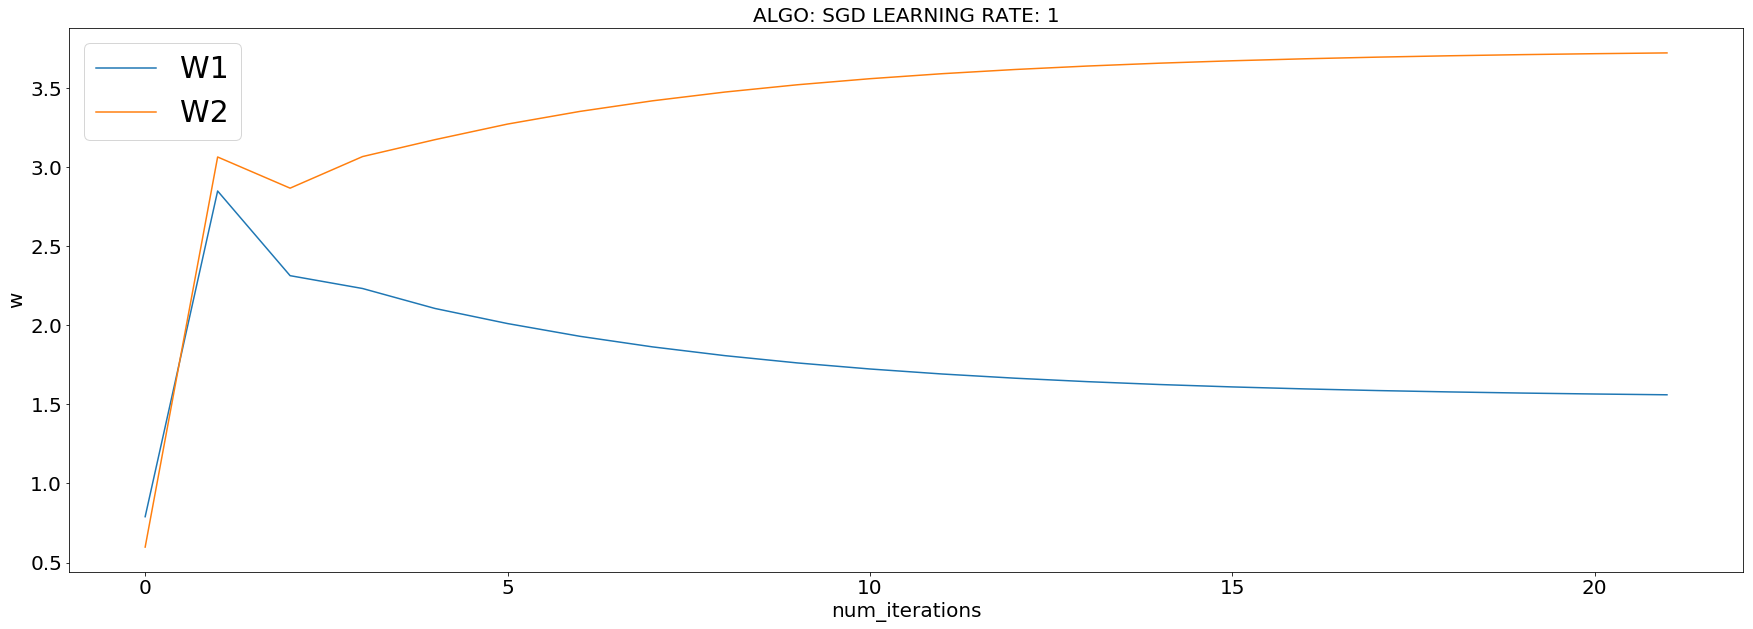

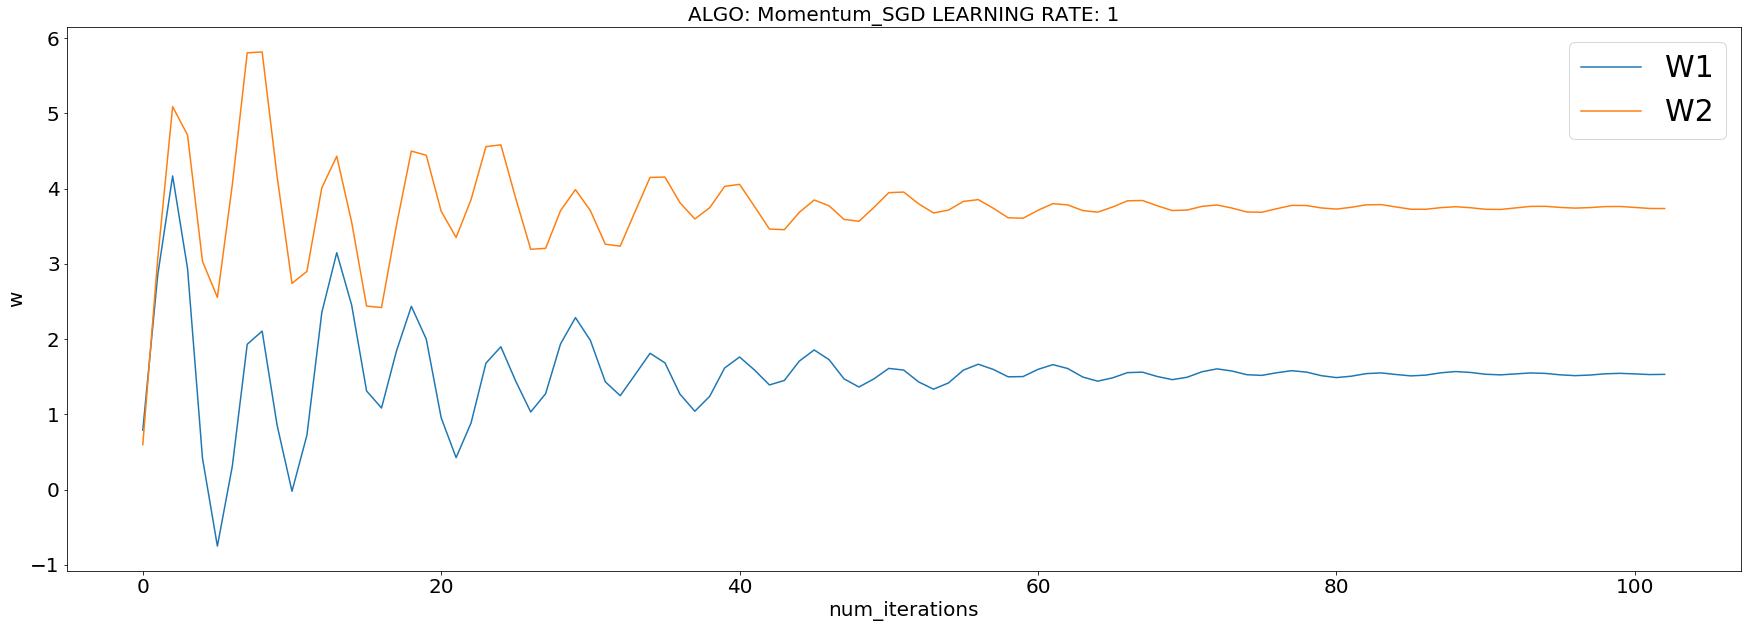

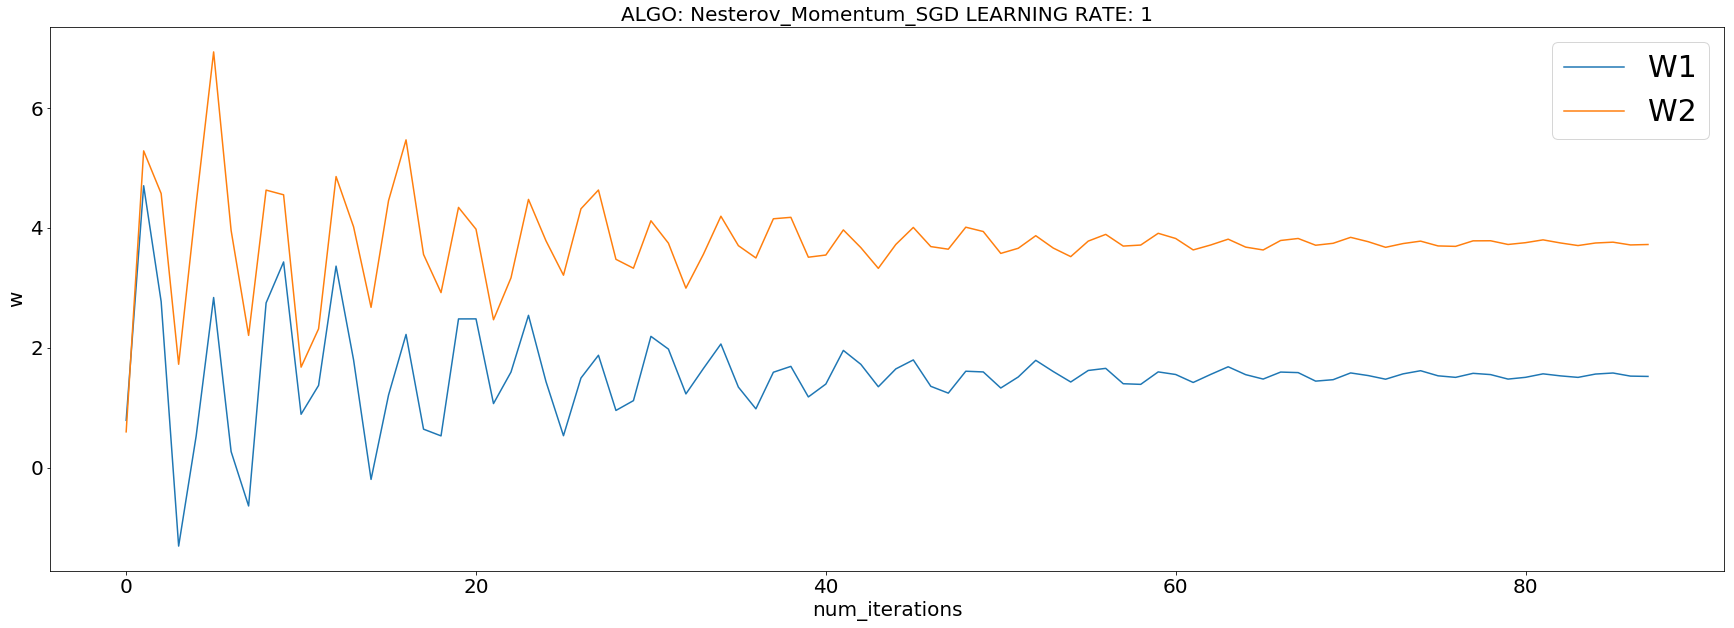

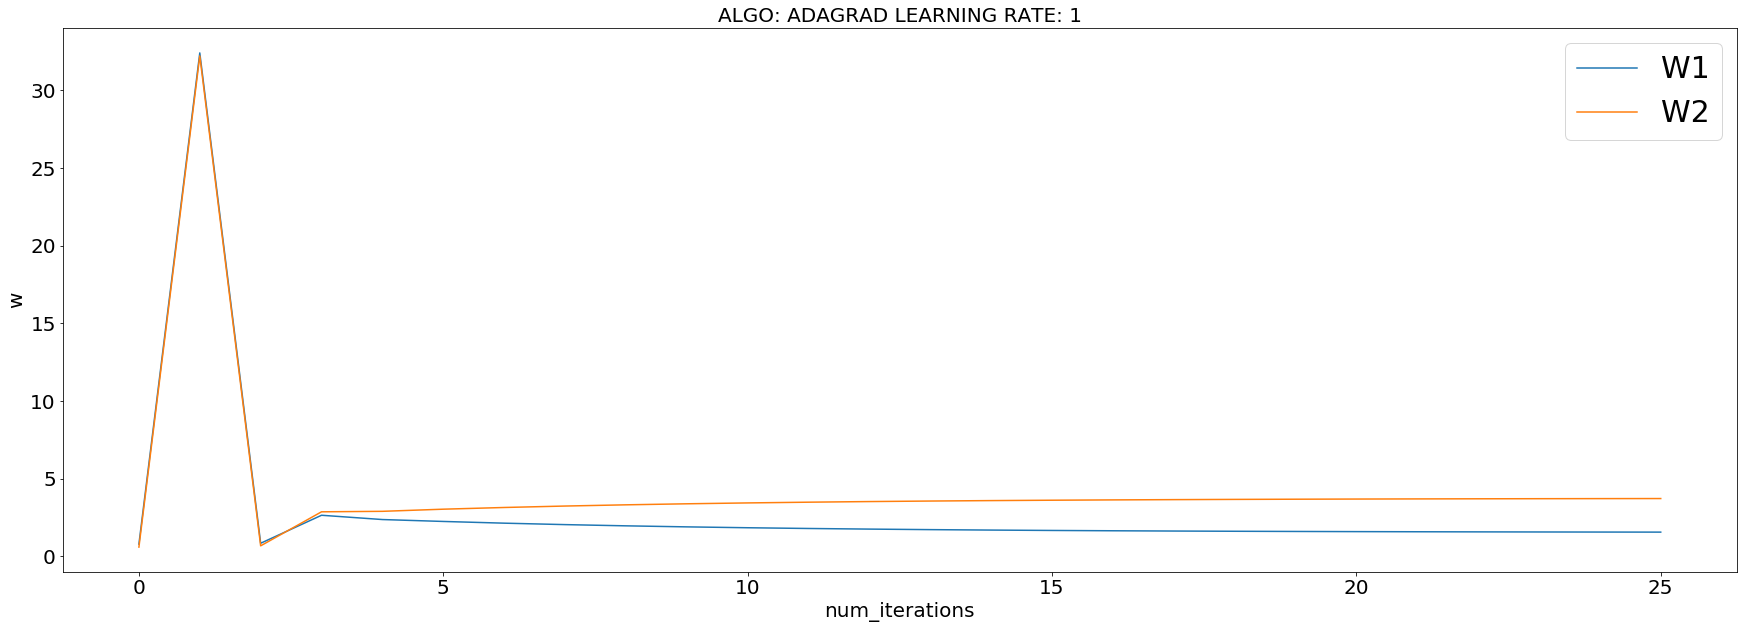

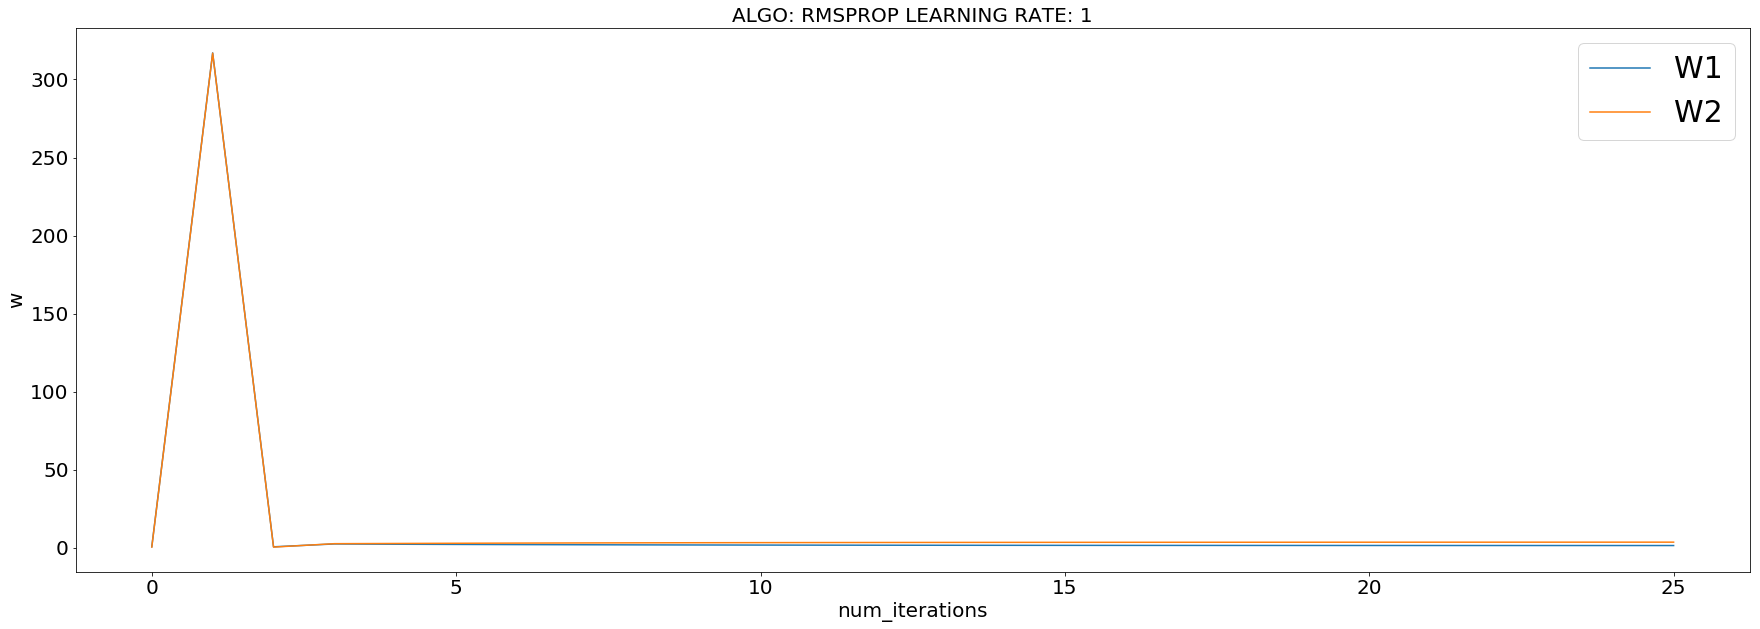

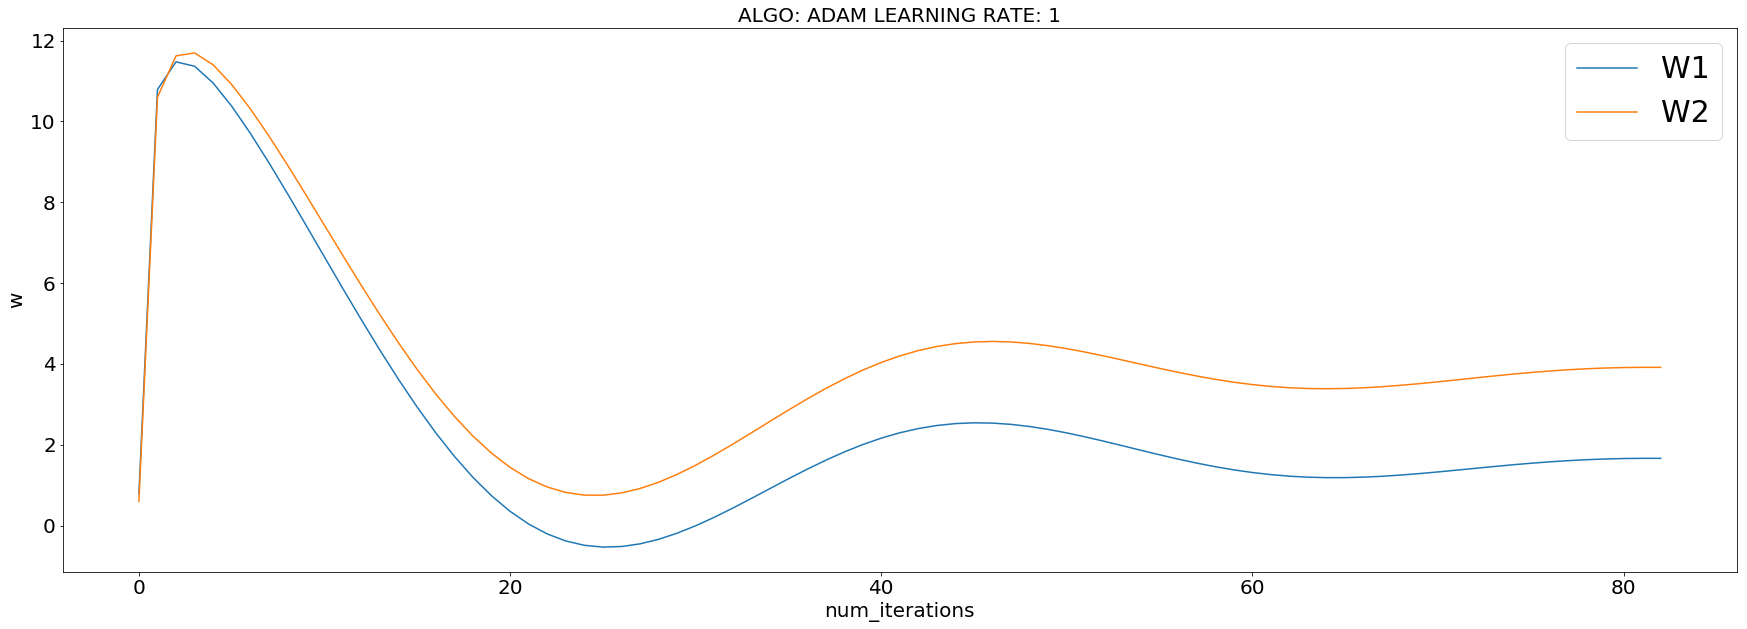

In [15]:
for each_learning_rate in lst_of_learning_rates:
    for each_algo in order:
        plt.figure(figsize=(30, 10))
        viz_ws = dict_w_learning_rates[each_learning_rate][each_algo]
        #print "ALGO: {} learning rate: {}".format(each_algo, each_learning_rate)
        plt.title('ALGO: {} LEARNING RATE: {}'.format(each_algo, each_learning_rate), fontsize=20)
        plt.plot([i for i, _ in enumerate(viz_ws)], [x[0] for x in viz_ws], label='W1')
        plt.legend(fontsize=30)
        plt.plot([i for i, _ in enumerate(viz_ws)], [x[1] for x in viz_ws], label='W2')
        plt.legend(fontsize=30)
        plt.xlabel('num_iterations', fontsize=20)
        plt.ylabel('w', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        print "\n"

# For each learning rate, comparison of performances of all algorithms

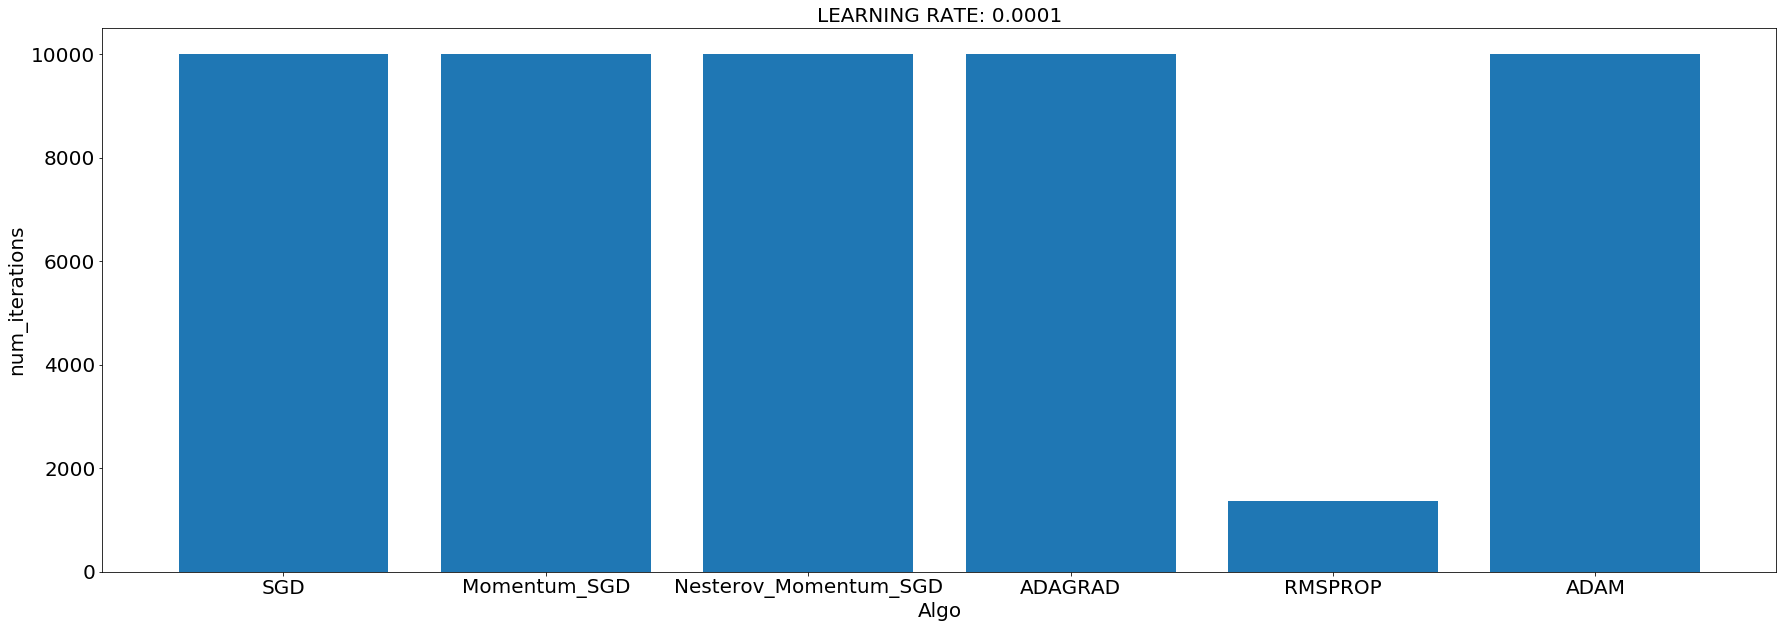

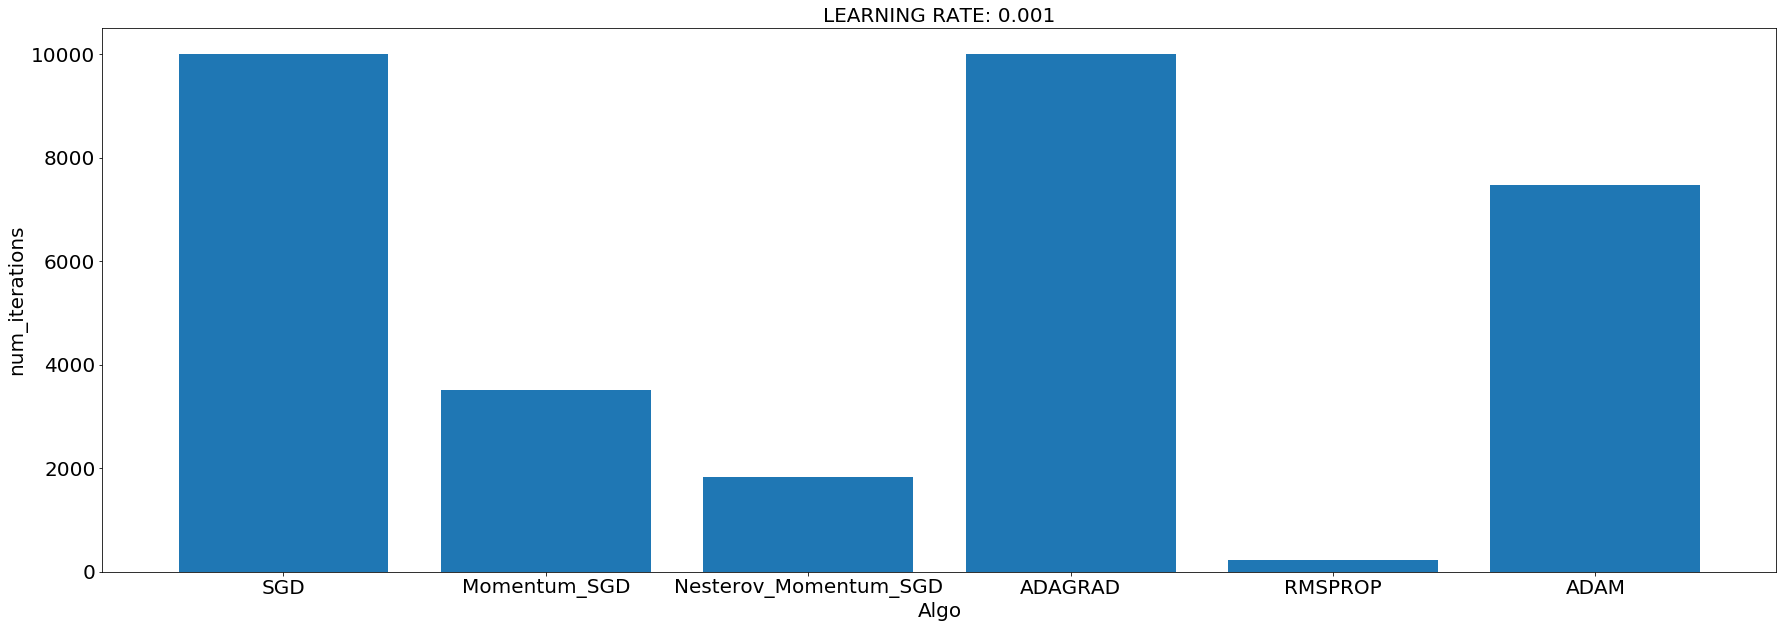

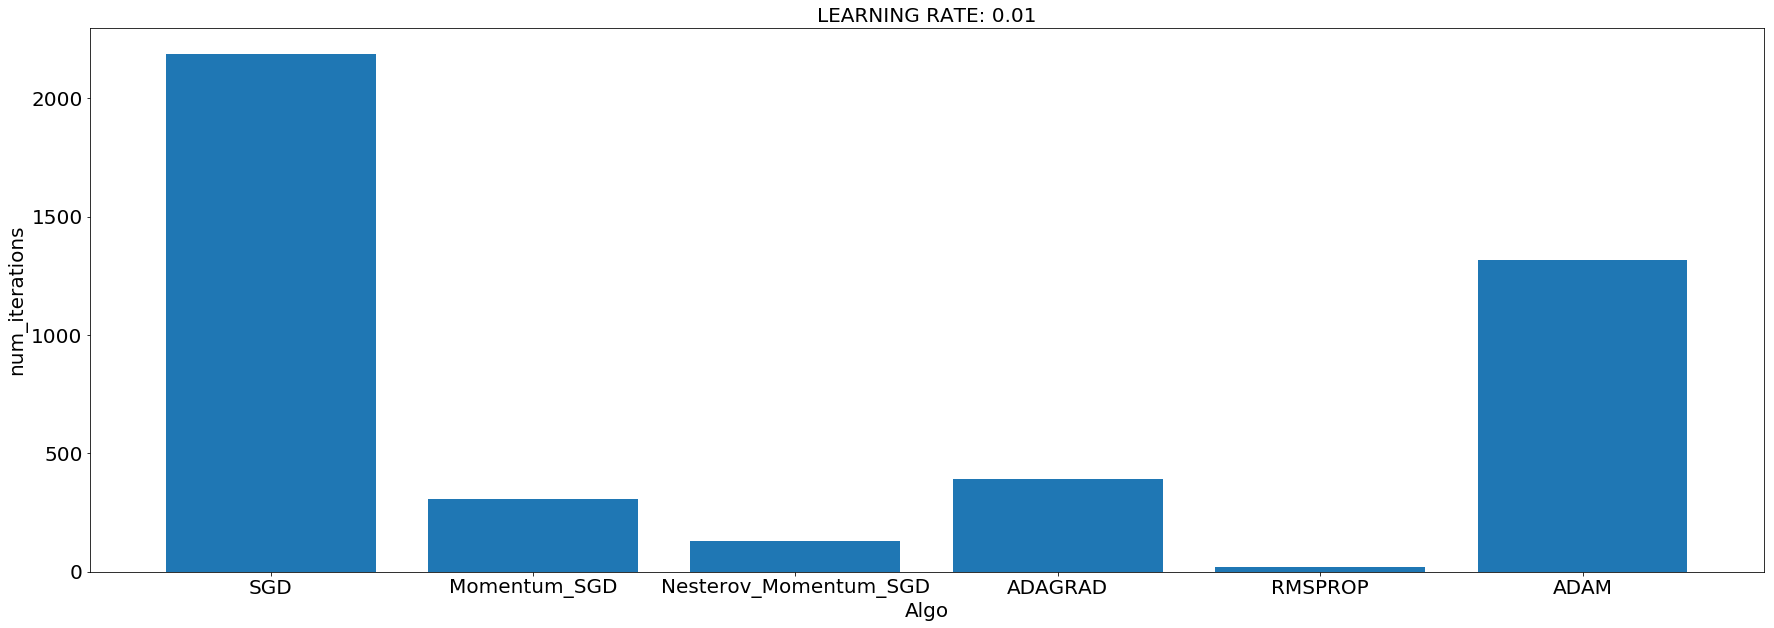

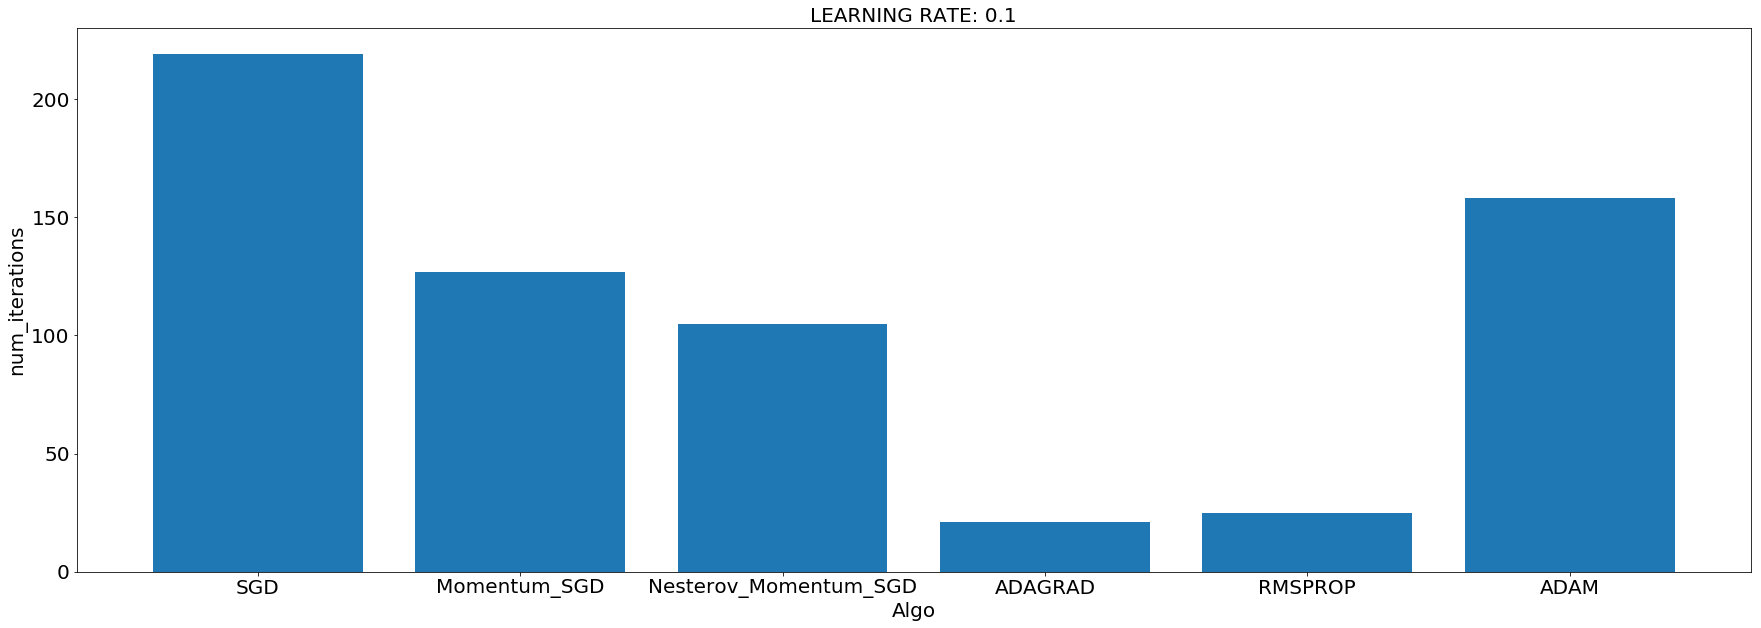

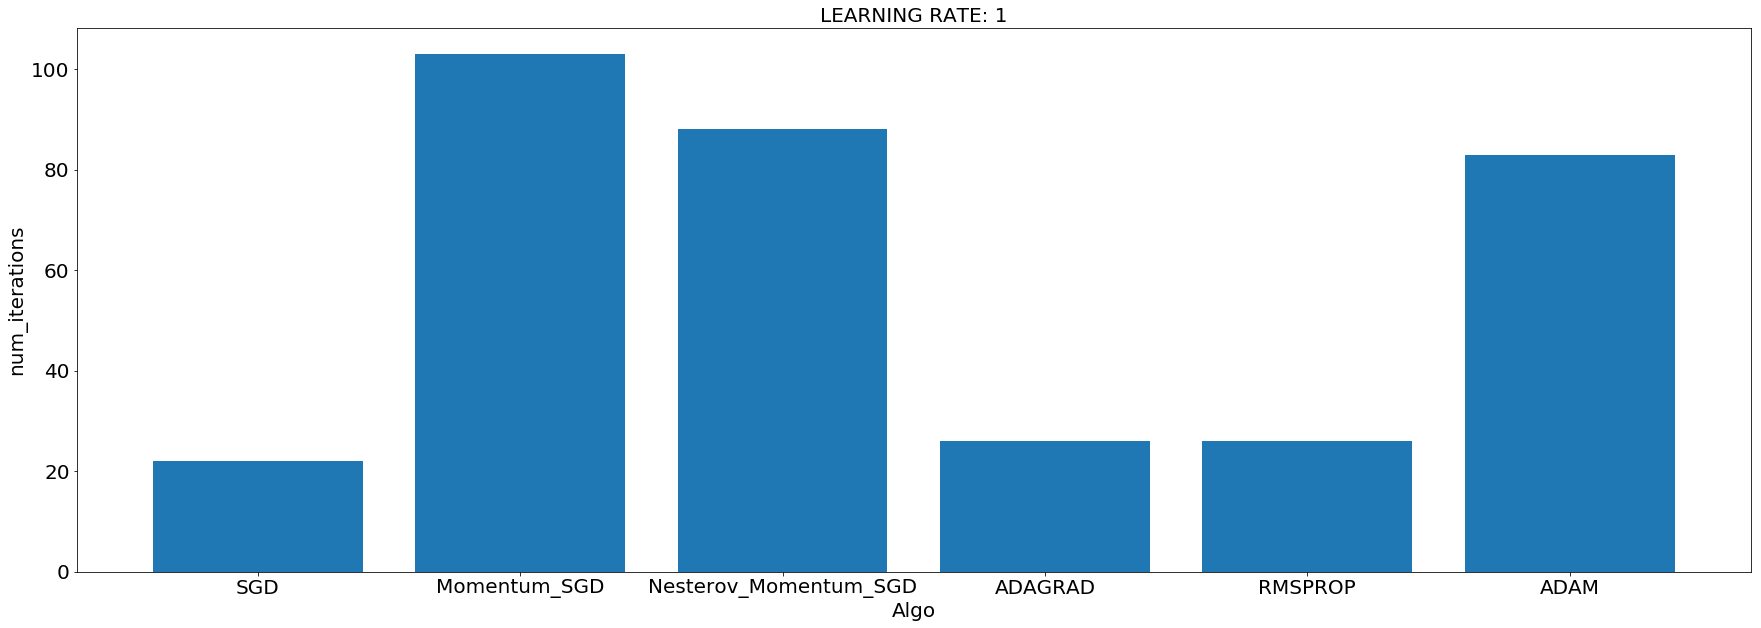

In [16]:
for each_learning_rate in lst_of_learning_rates:
    algo_time = []
    for each_algo in order:
        viz_ws = dict_w_learning_rates[each_learning_rate][each_algo]
        algo_time.append(len(viz_ws))
    plt.figure(figsize=(30, 10))
    plt.title('LEARNING RATE: {}'.format(each_learning_rate), fontsize=20)
    plt.bar([i for i,_ in enumerate(order)], algo_time)
    plt.xlabel('Algo', fontsize=20)
    plt.ylabel('num_iterations', fontsize=20)
    plt.xticks([i for i,_ in enumerate(order)], order, fontsize=20)
    plt.yticks(fontsize=20)
        

# Error visualisation wrt number of iterations, for each learning rate, for each algo

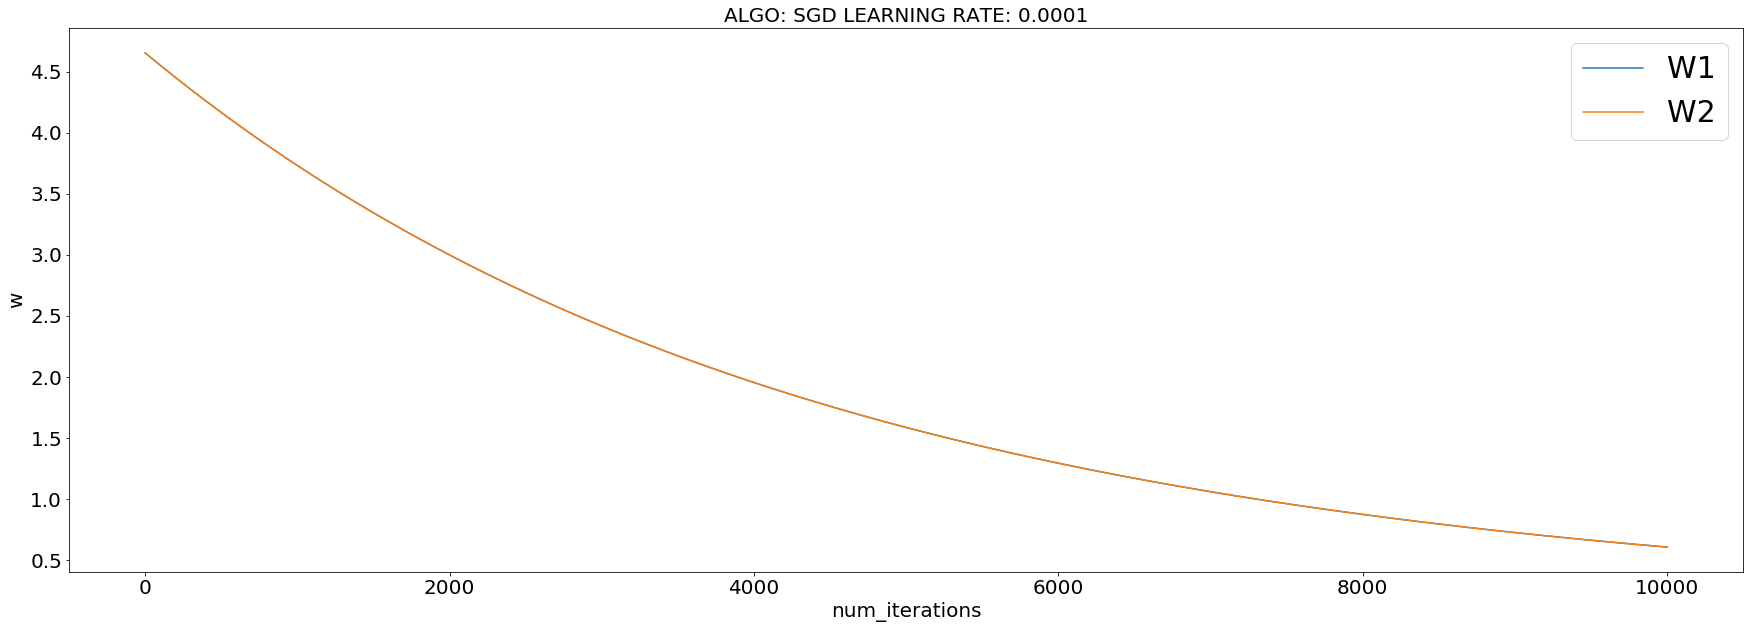

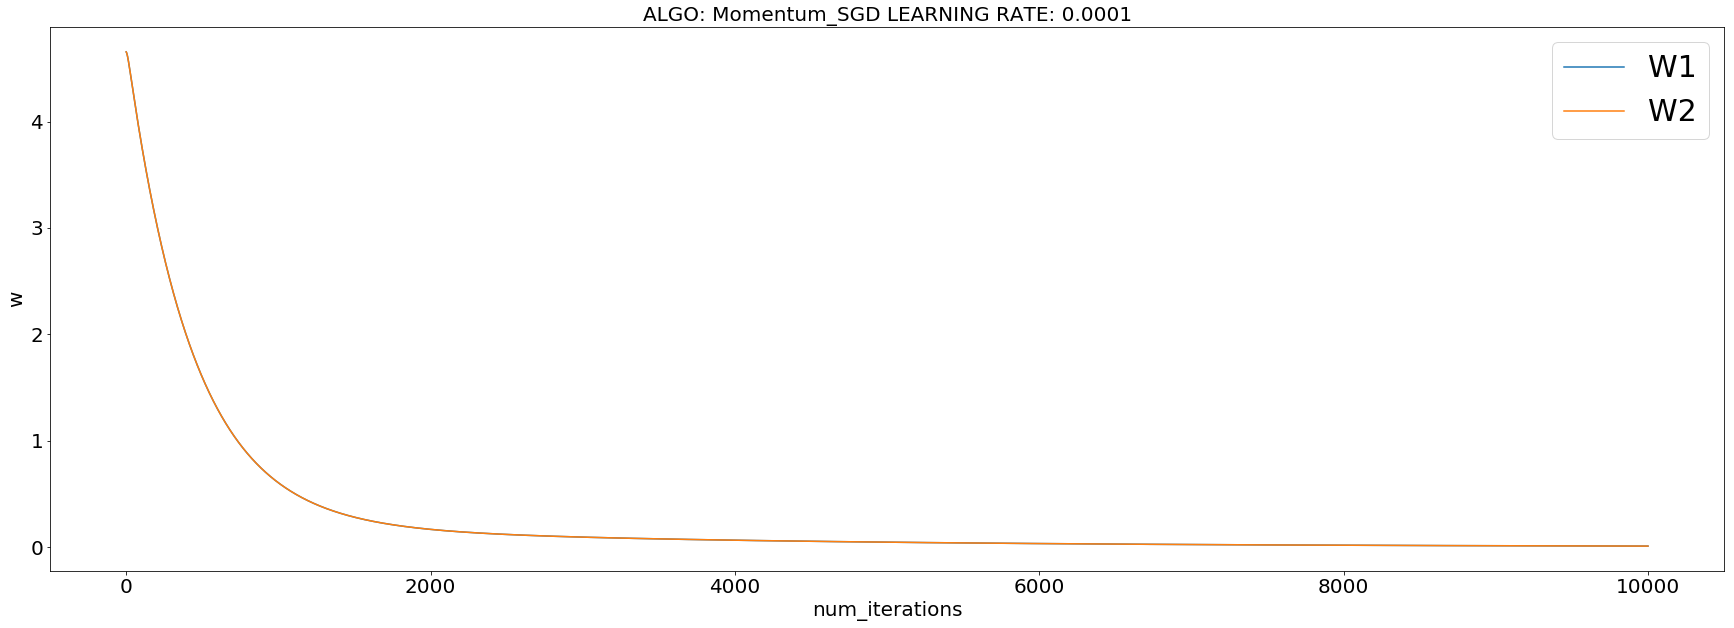

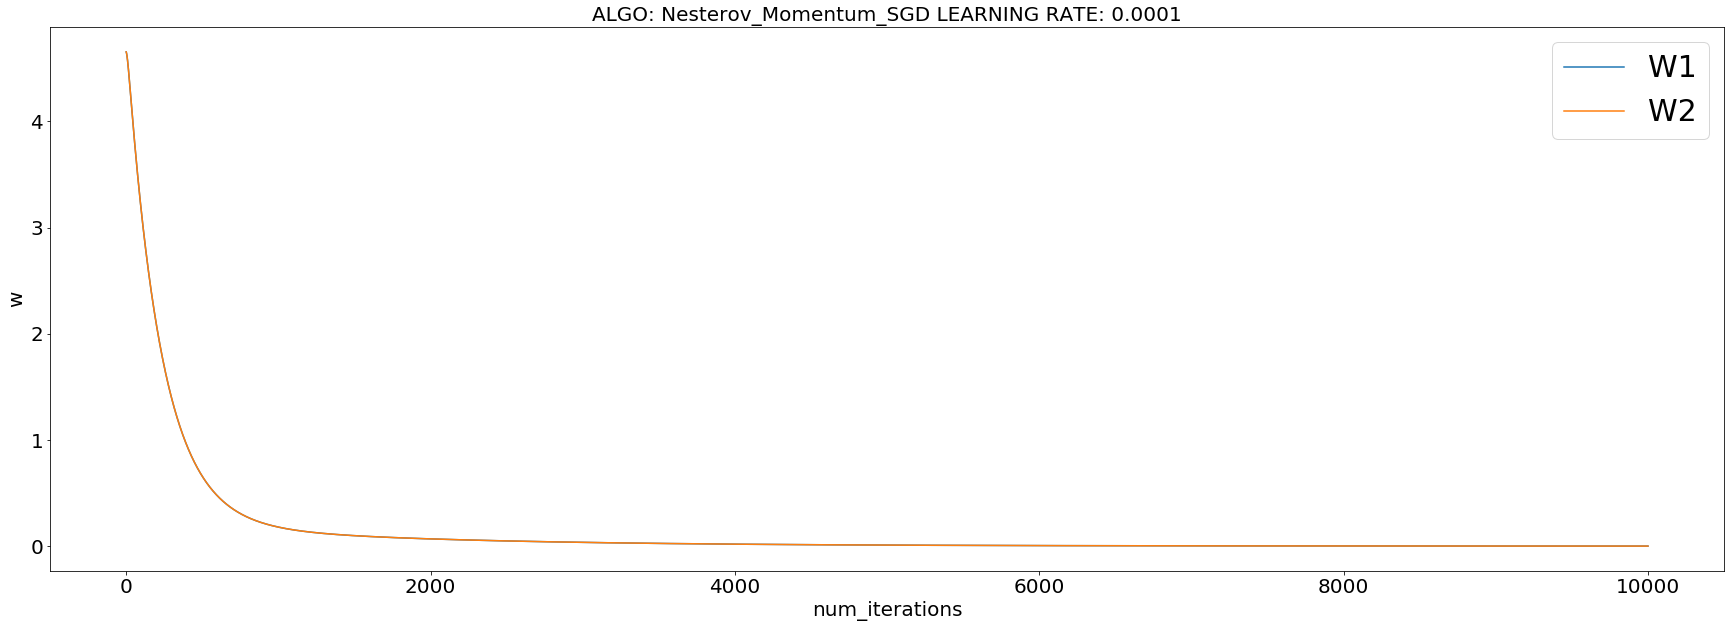

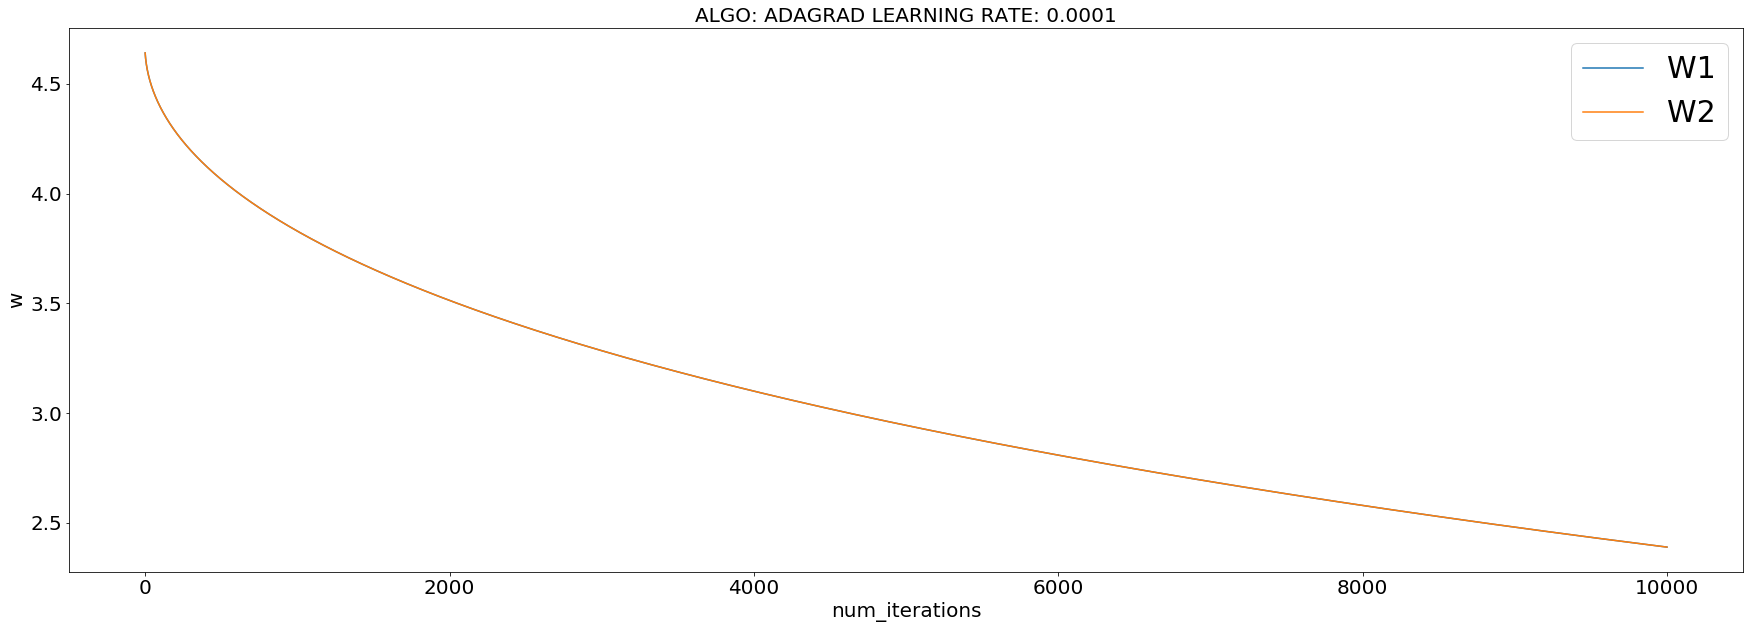

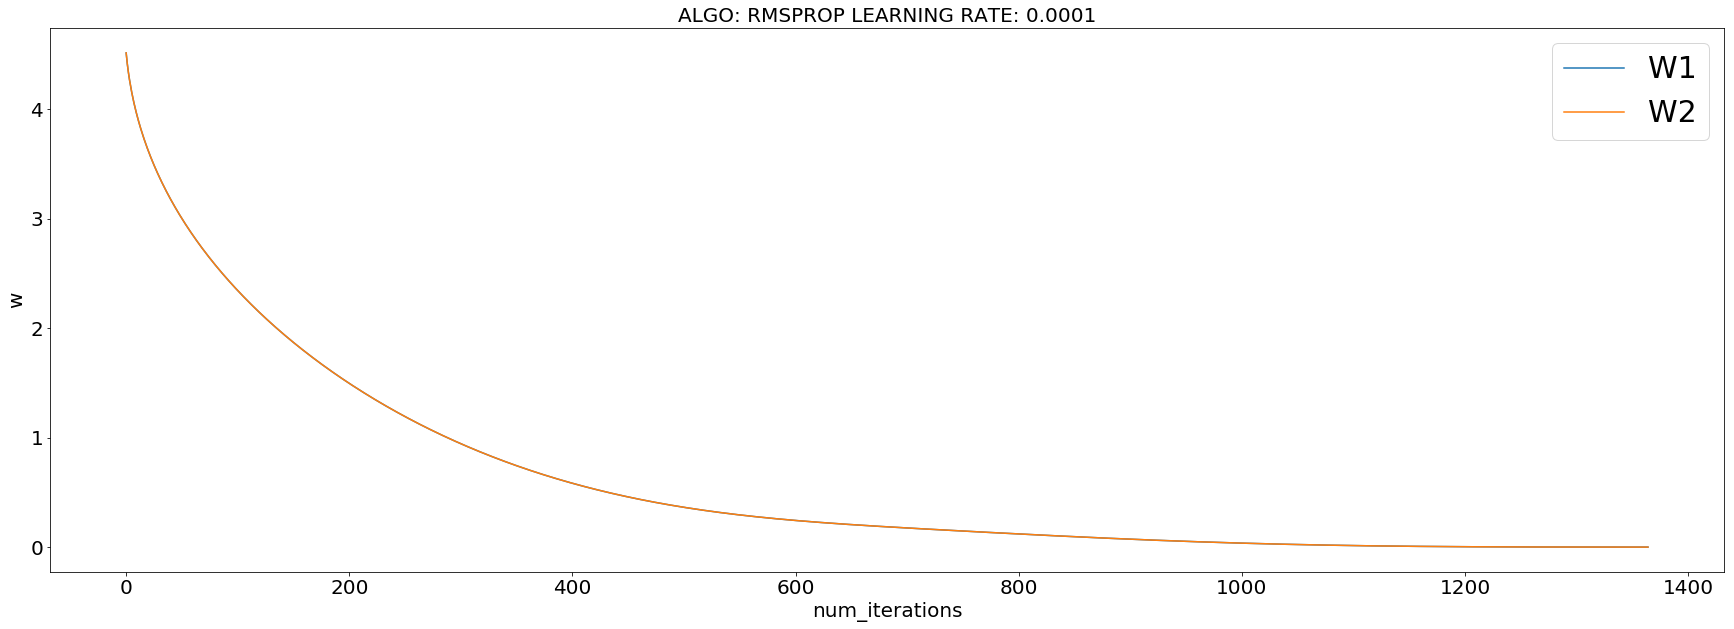

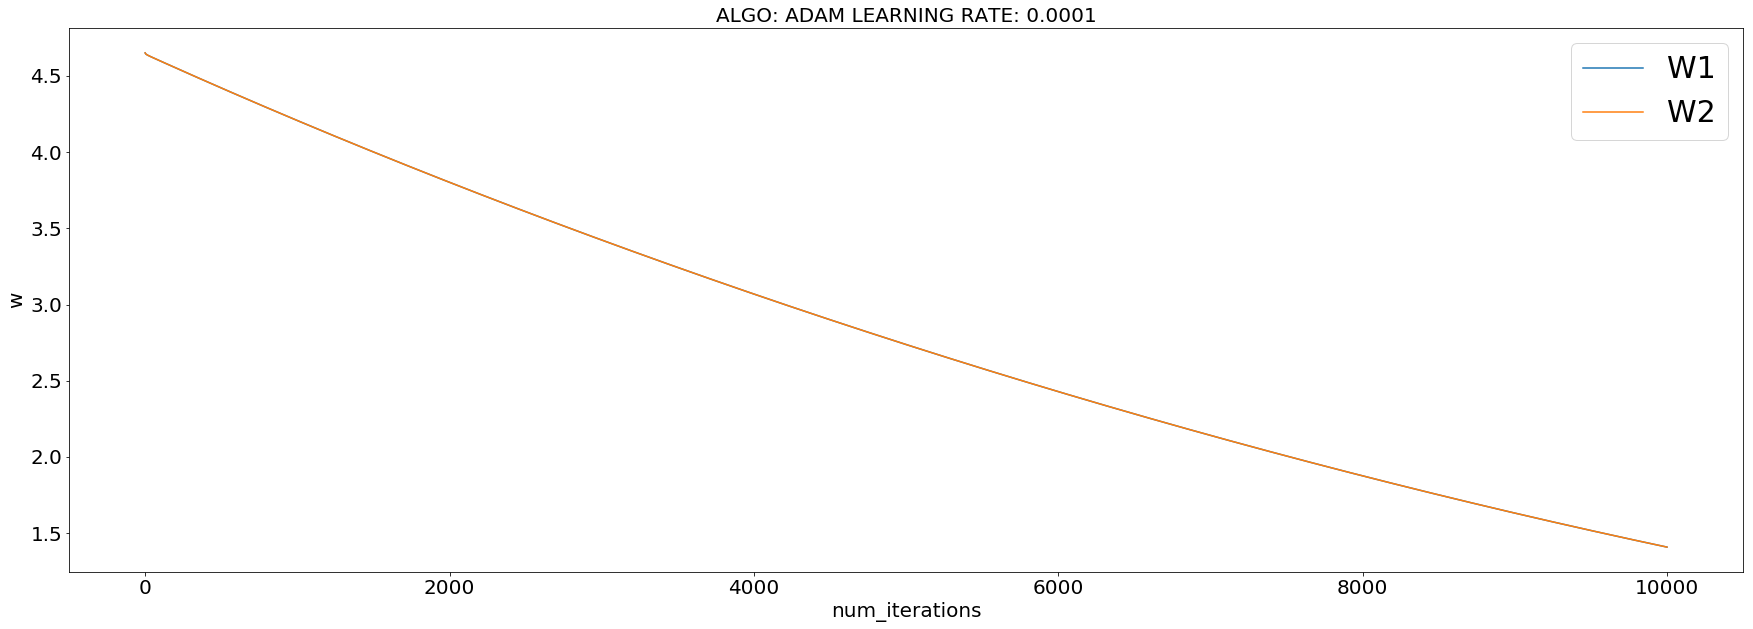

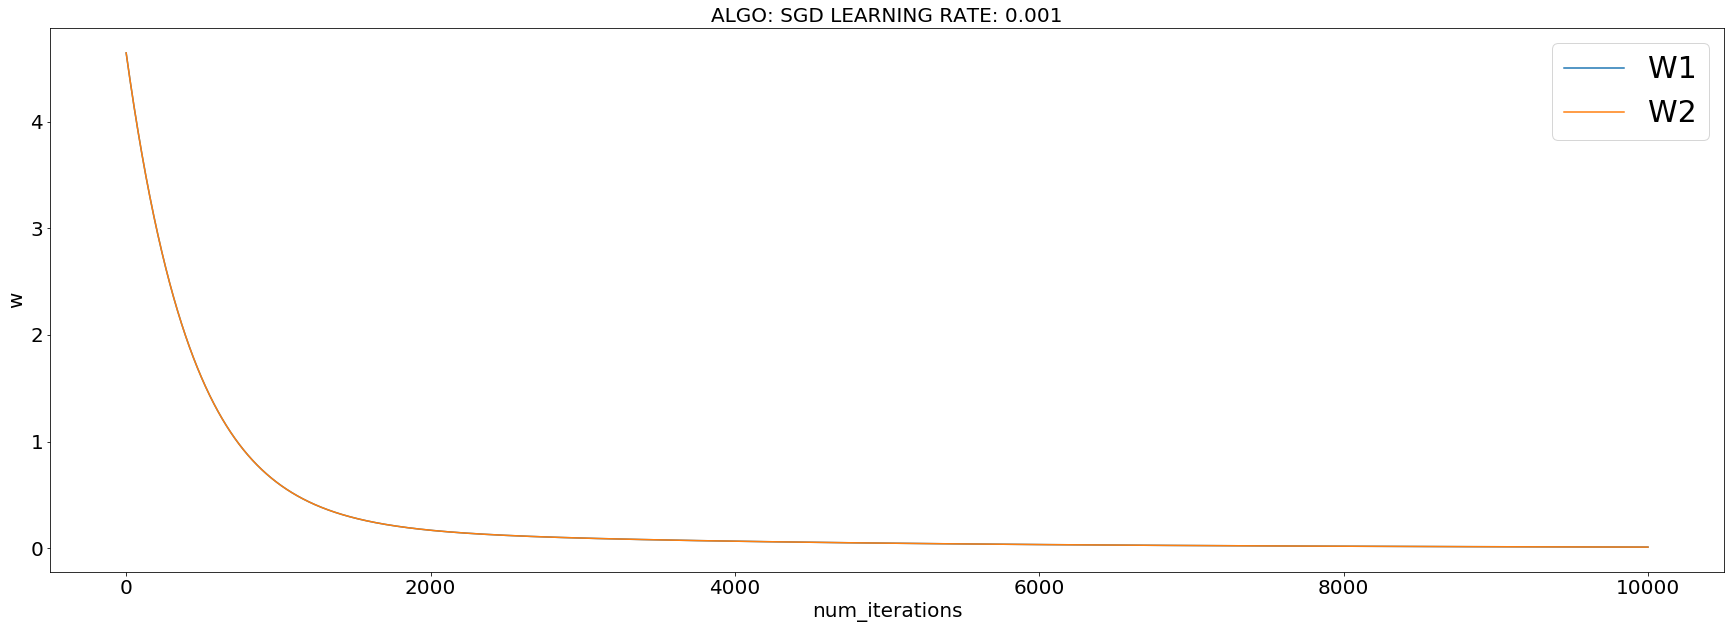

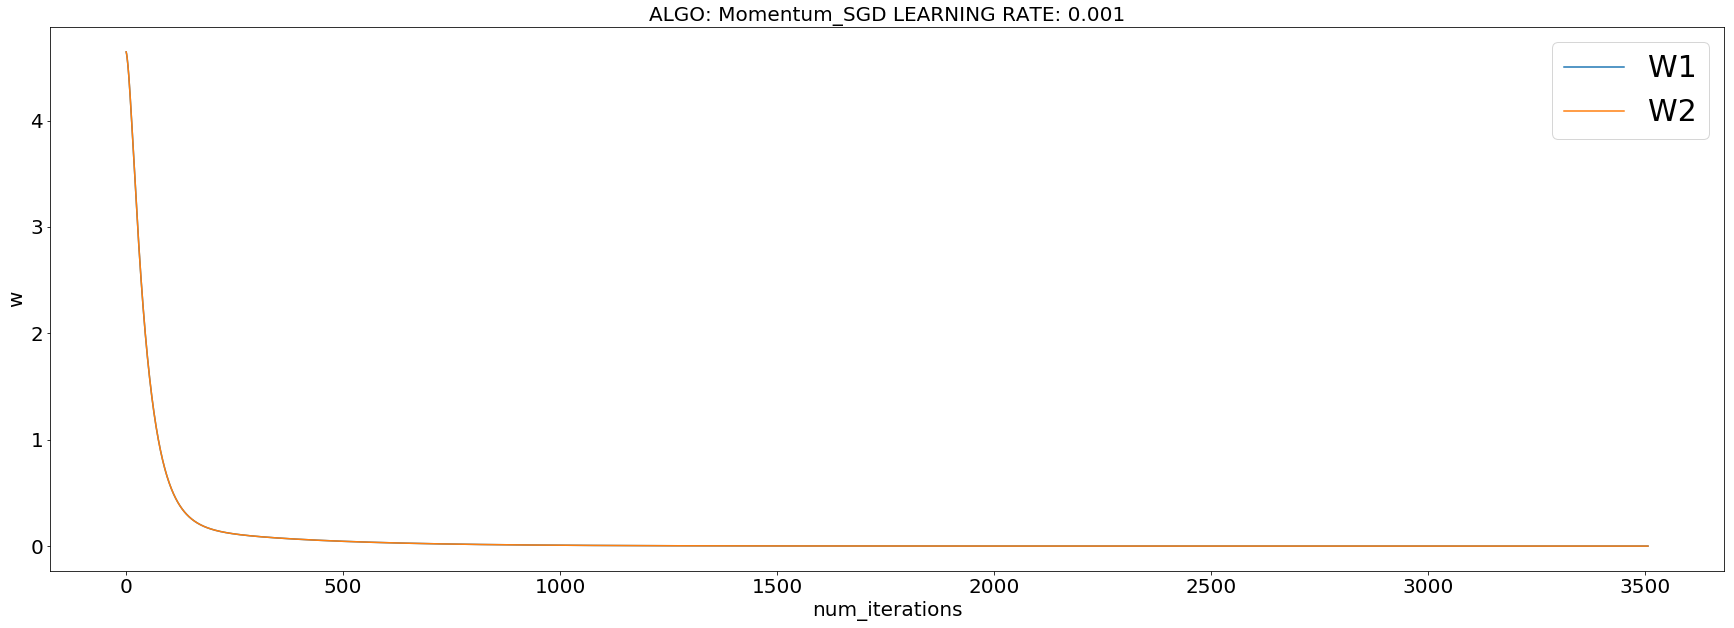

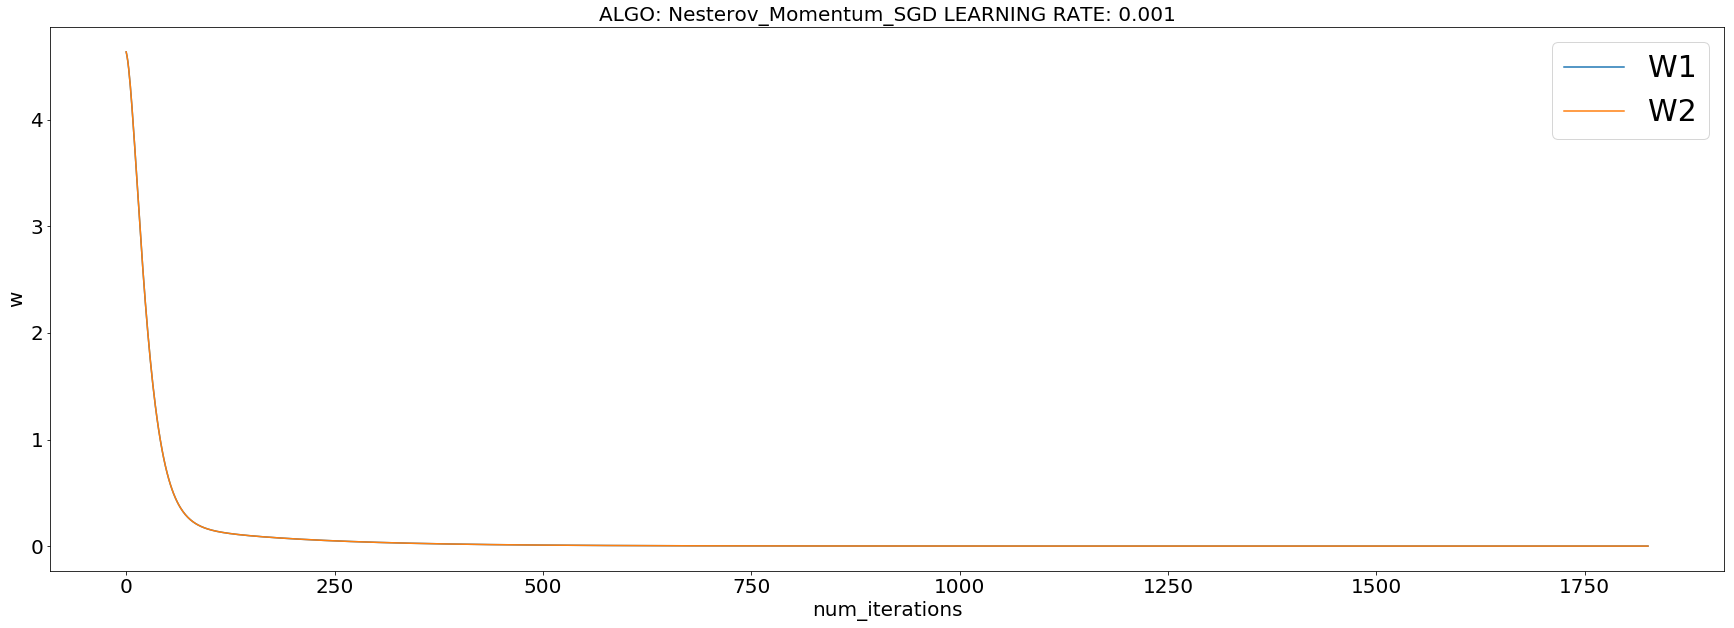

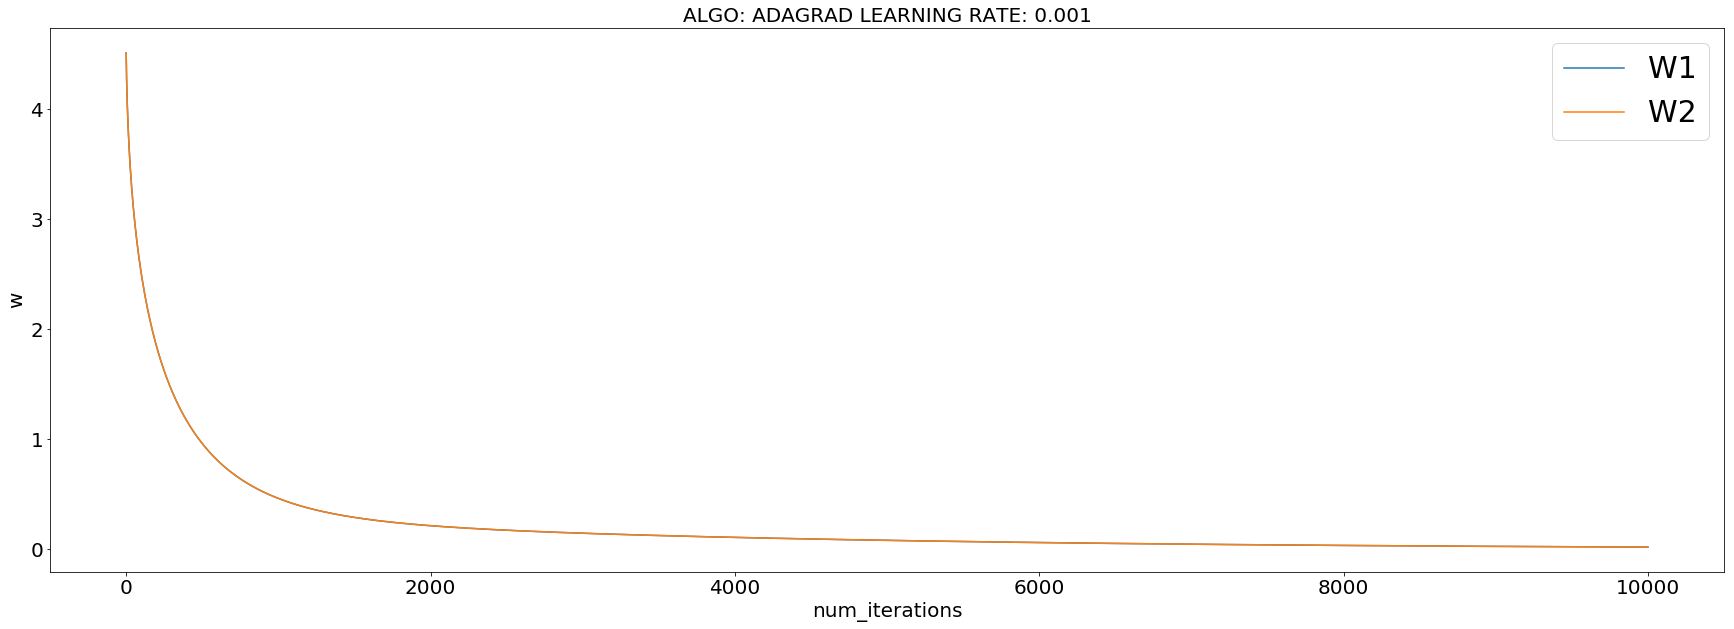

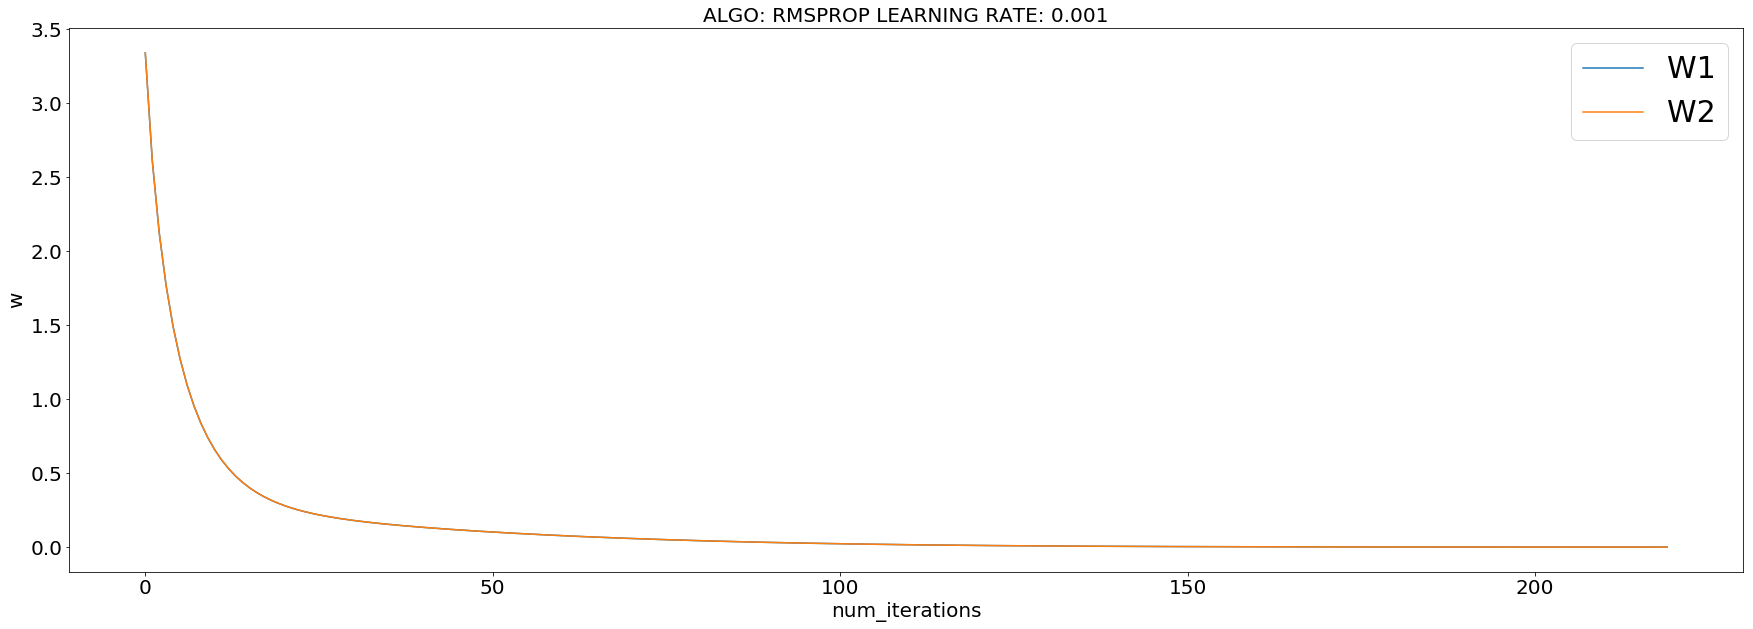

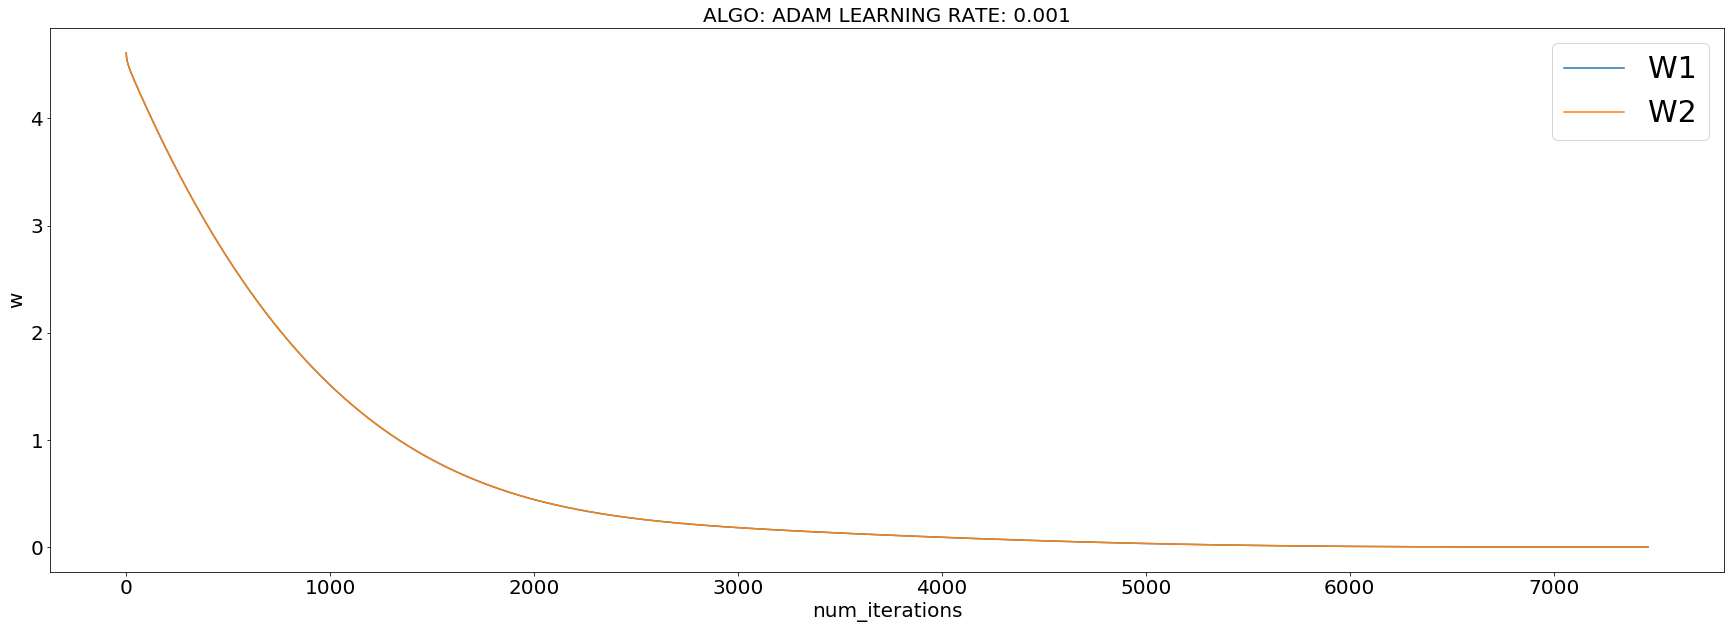

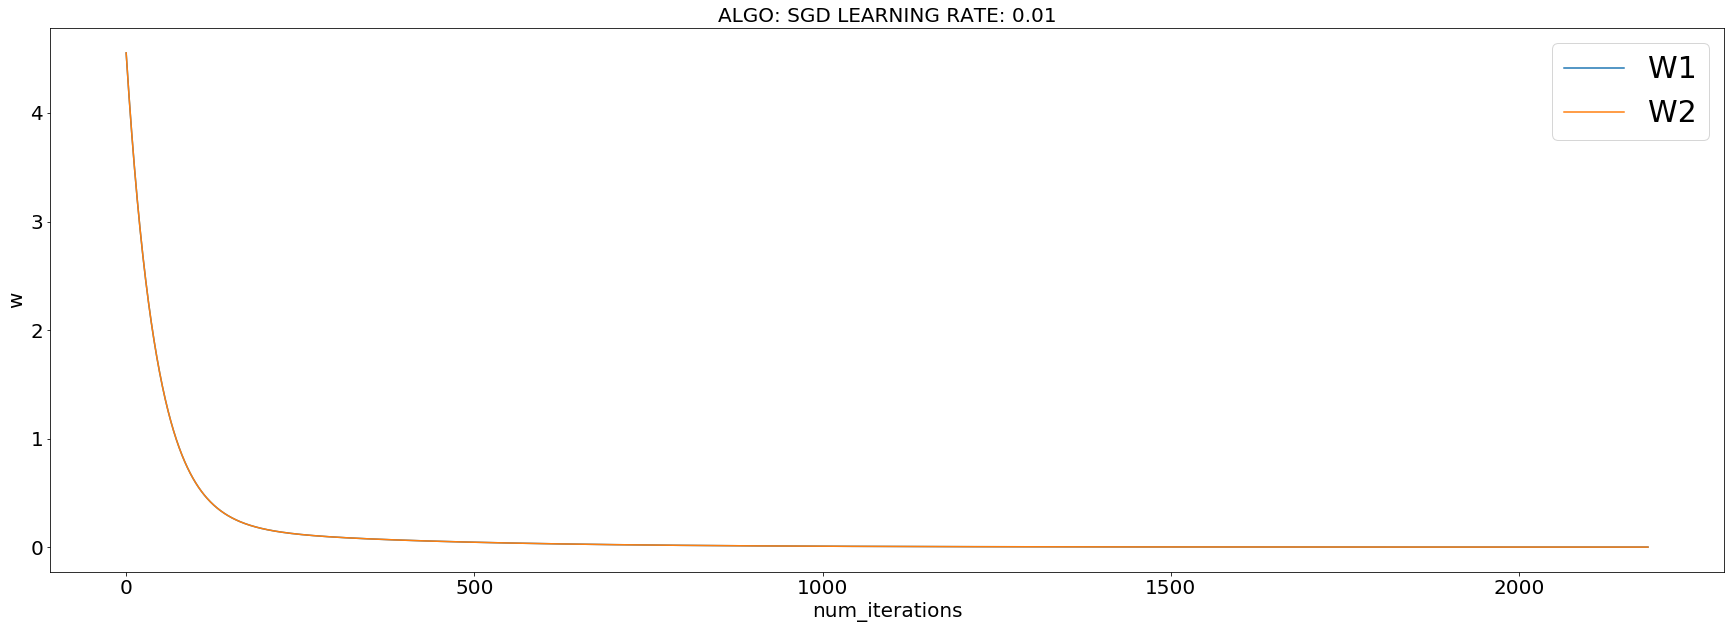

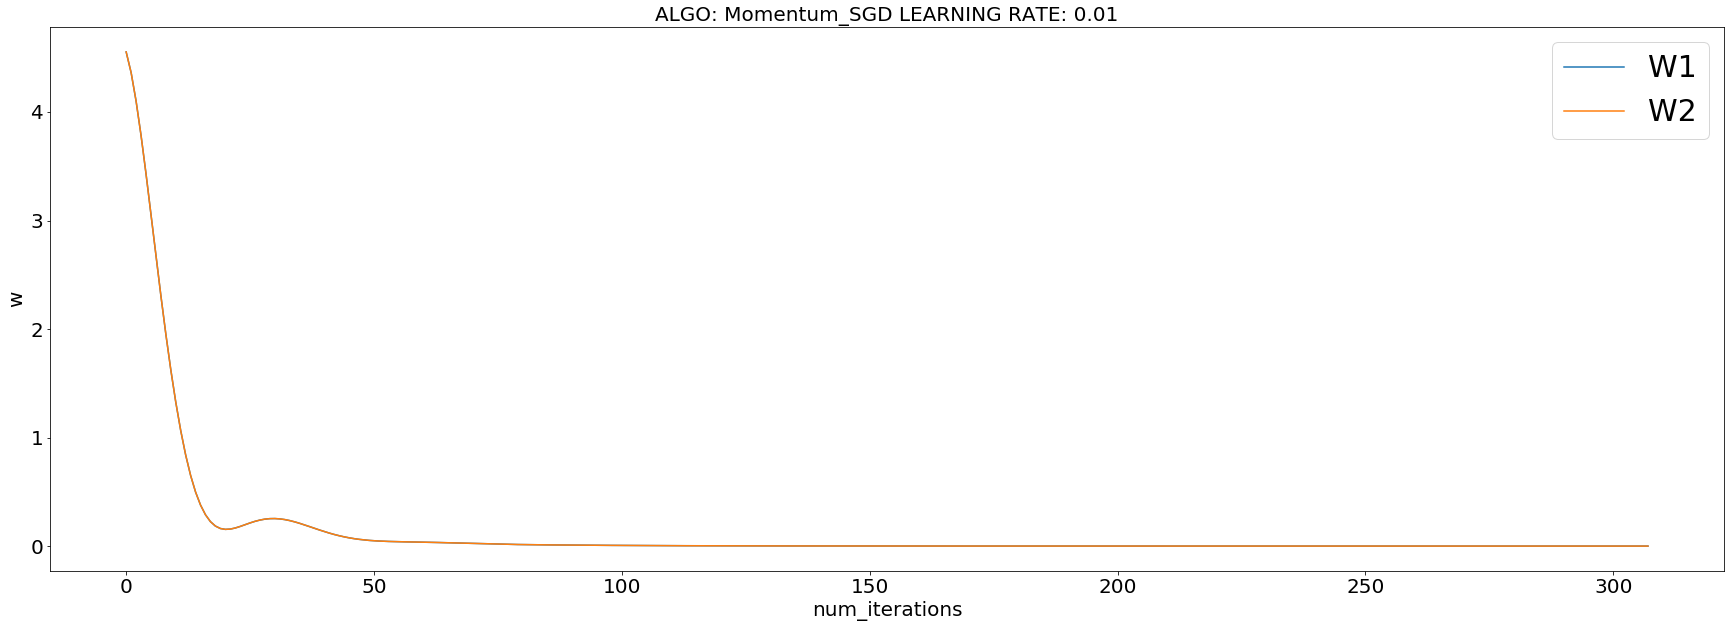

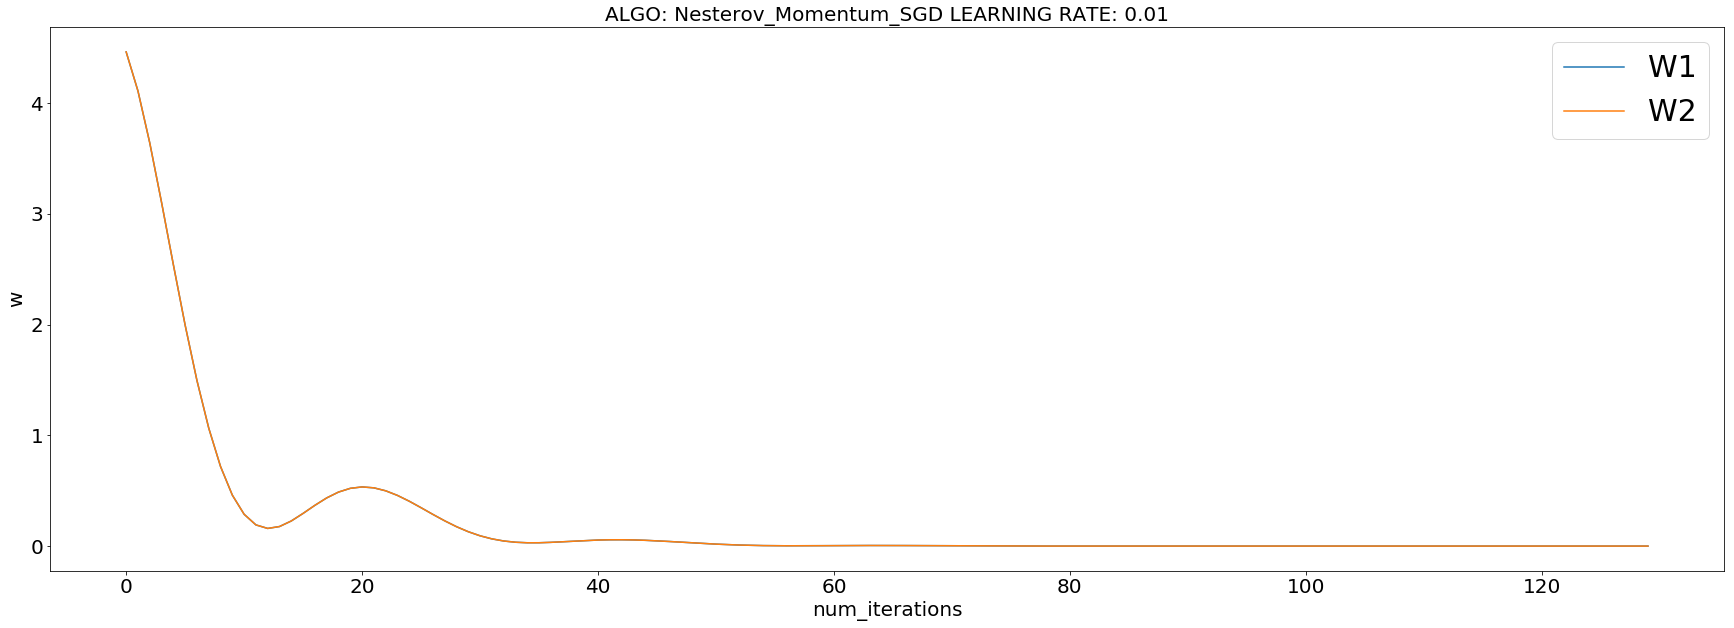

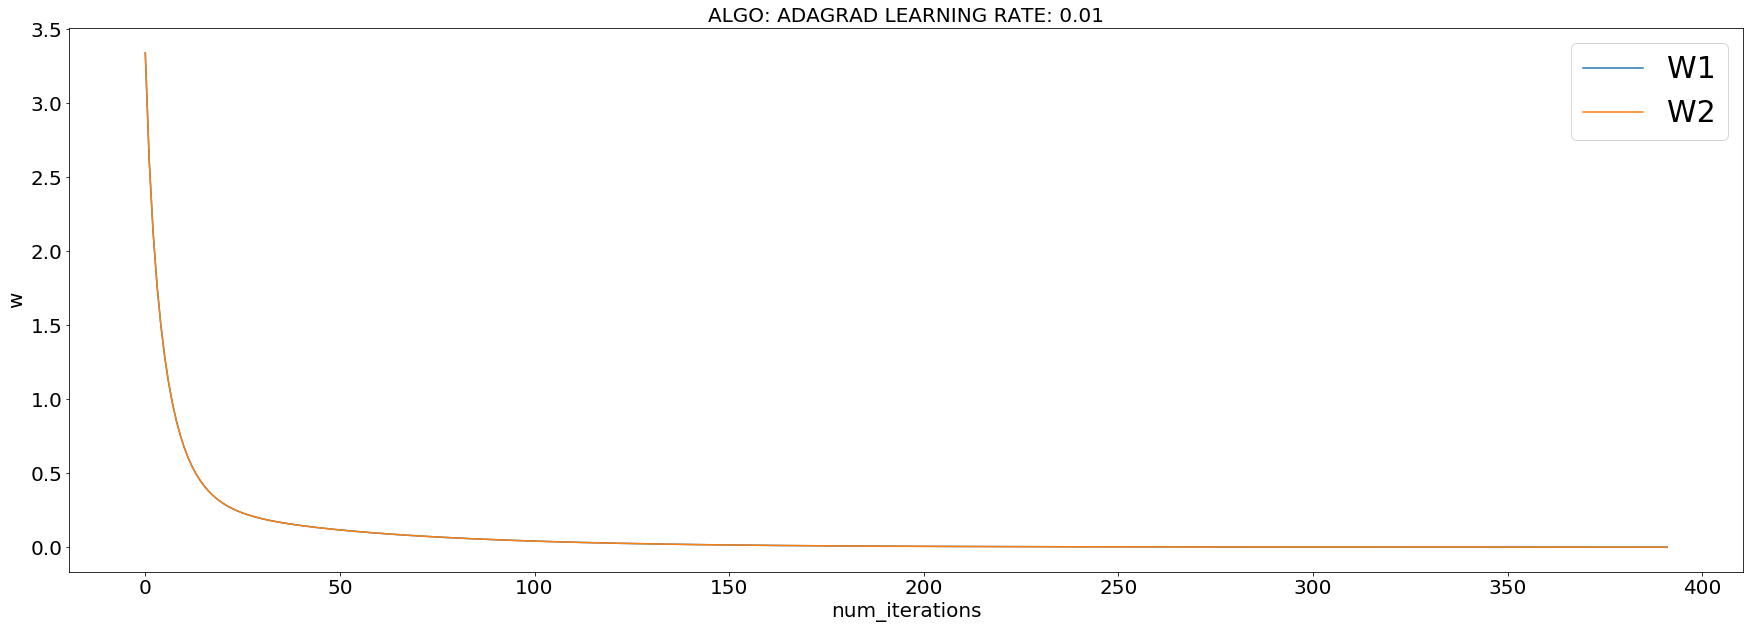

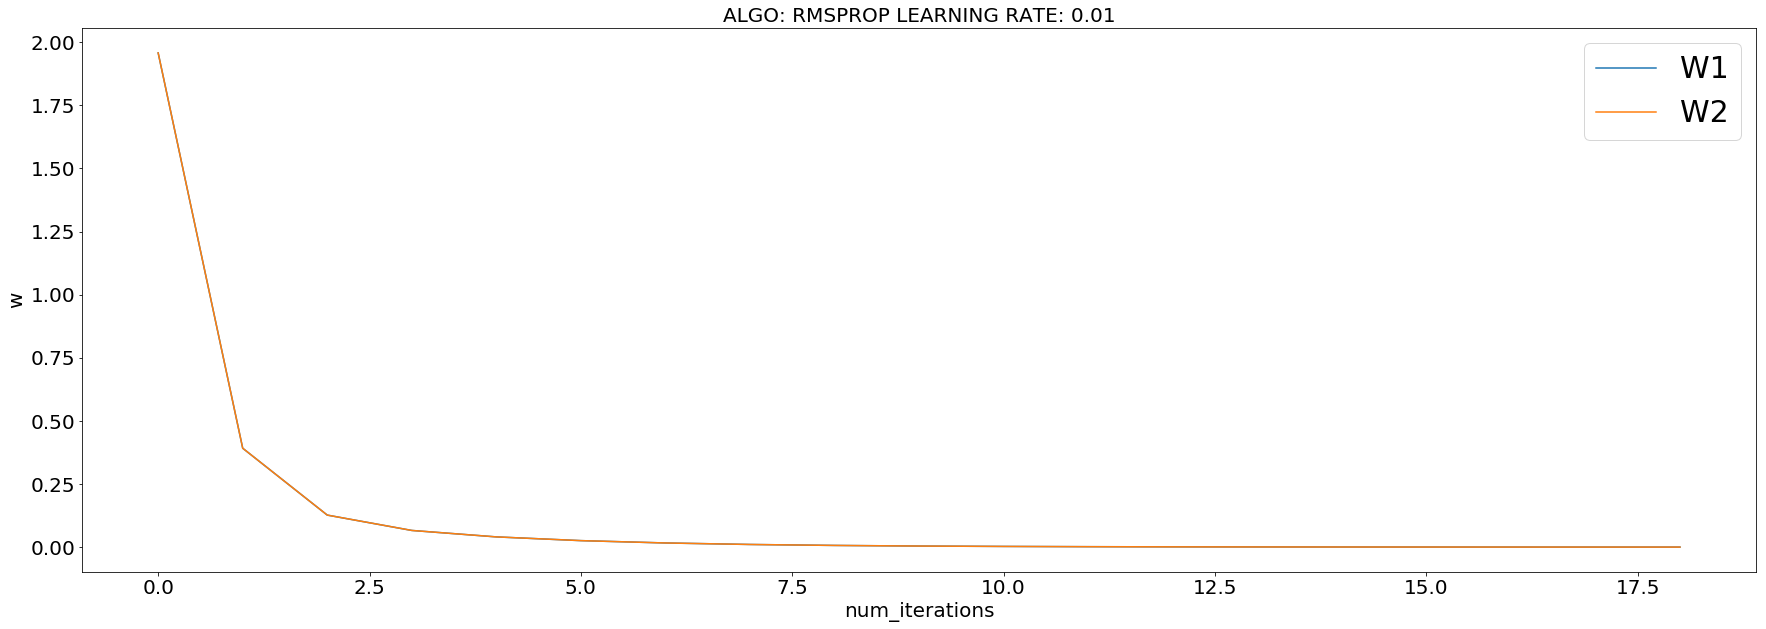

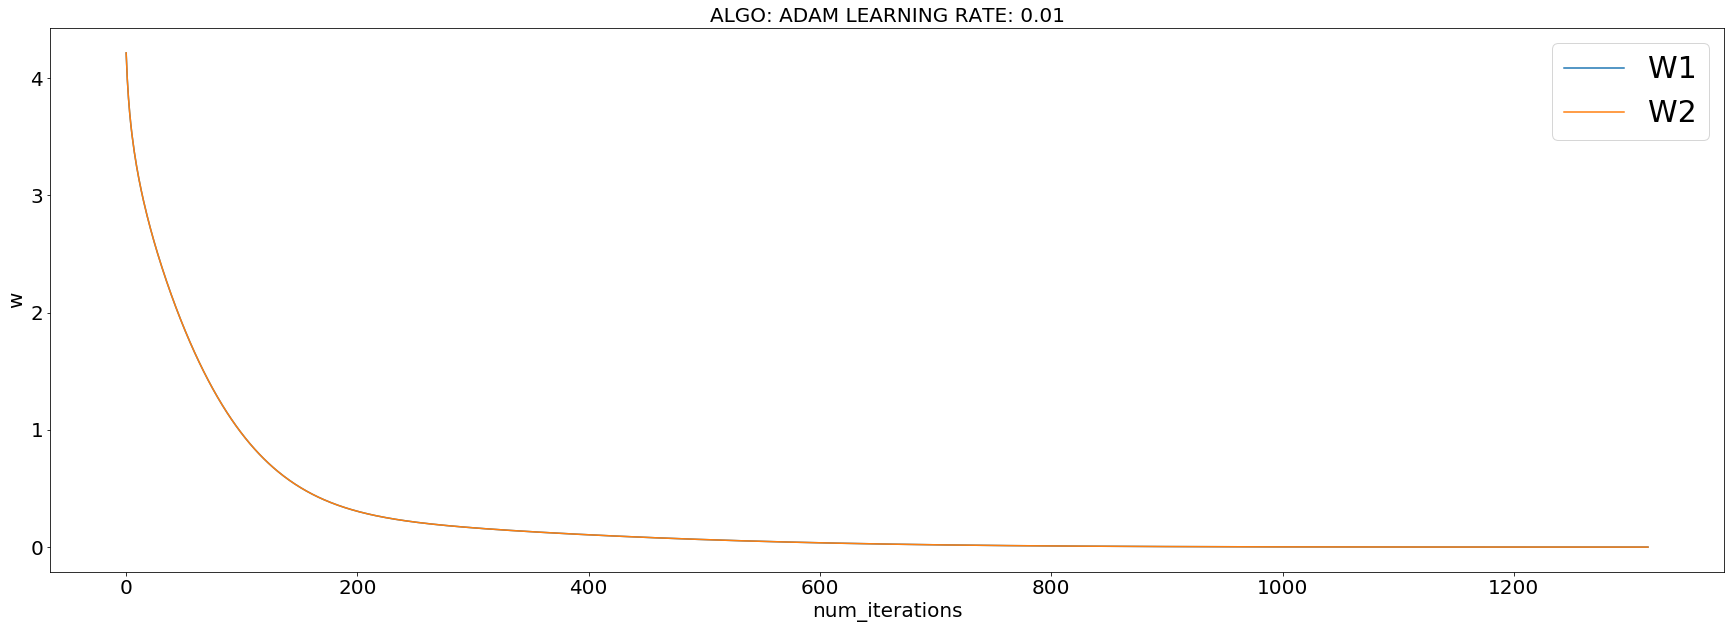

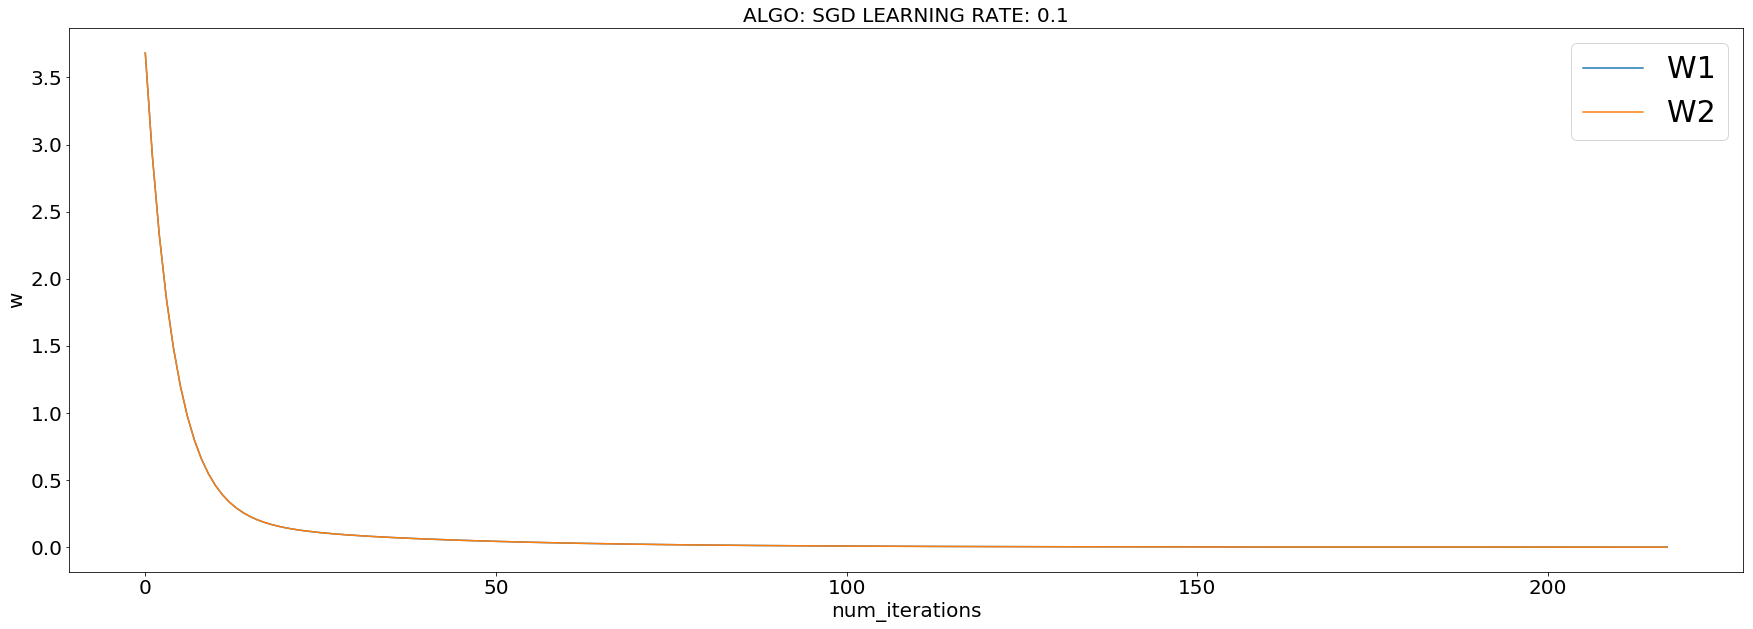

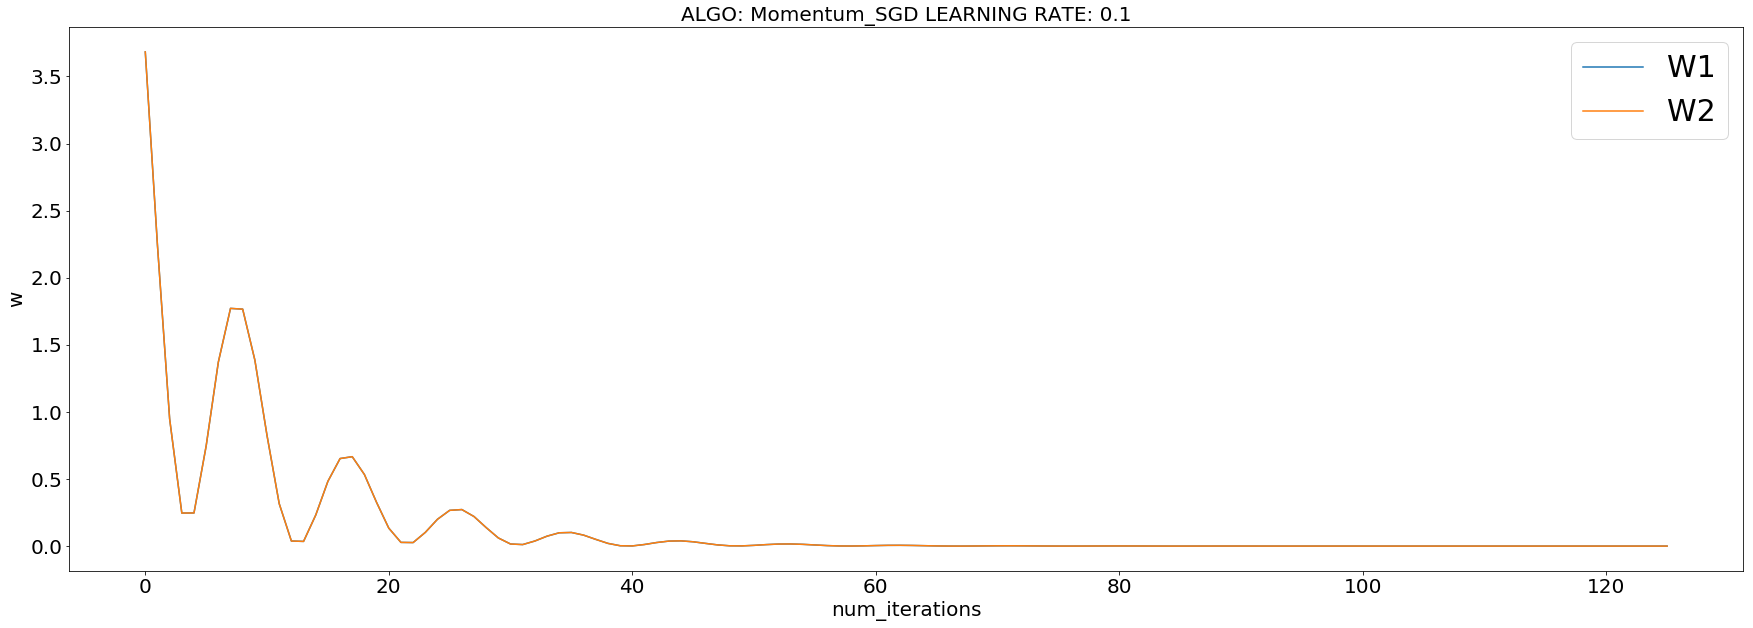

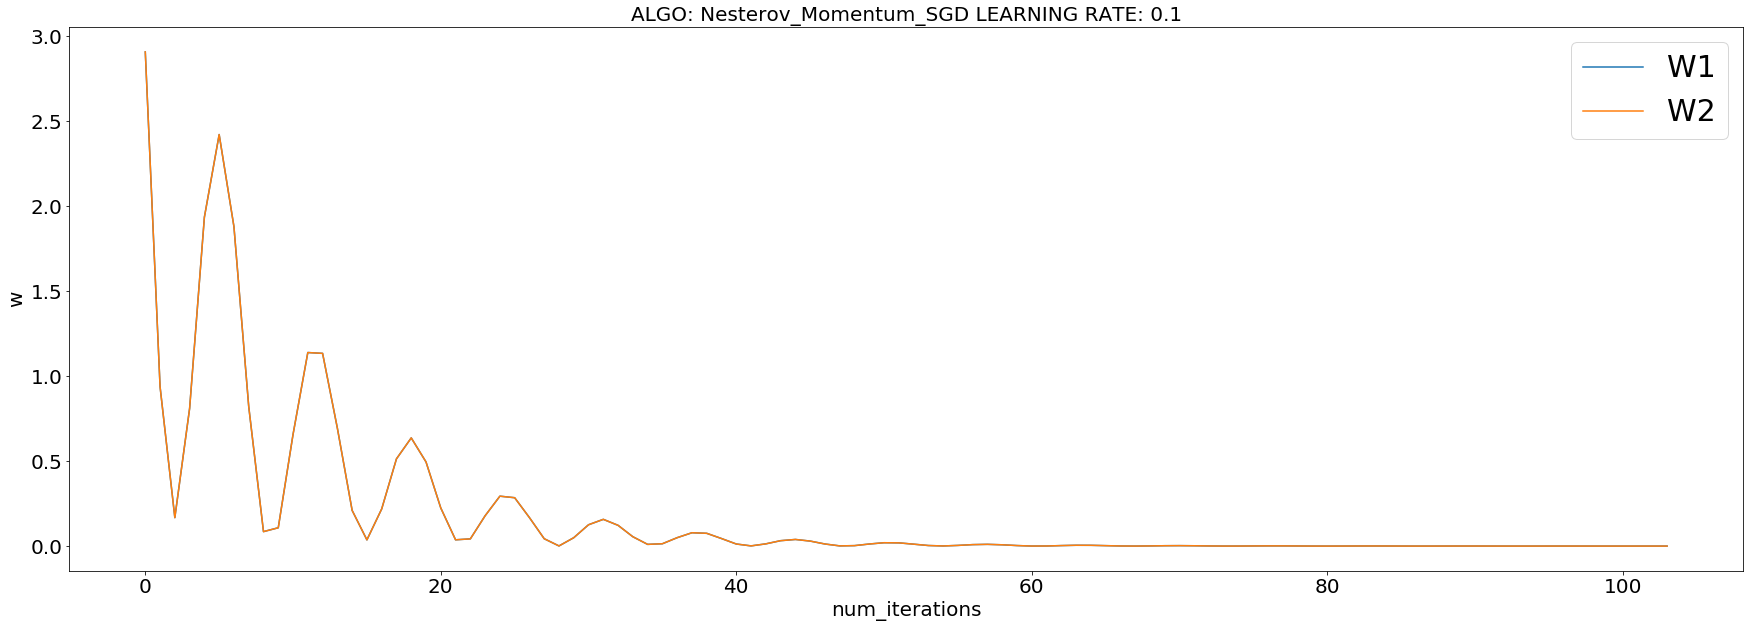

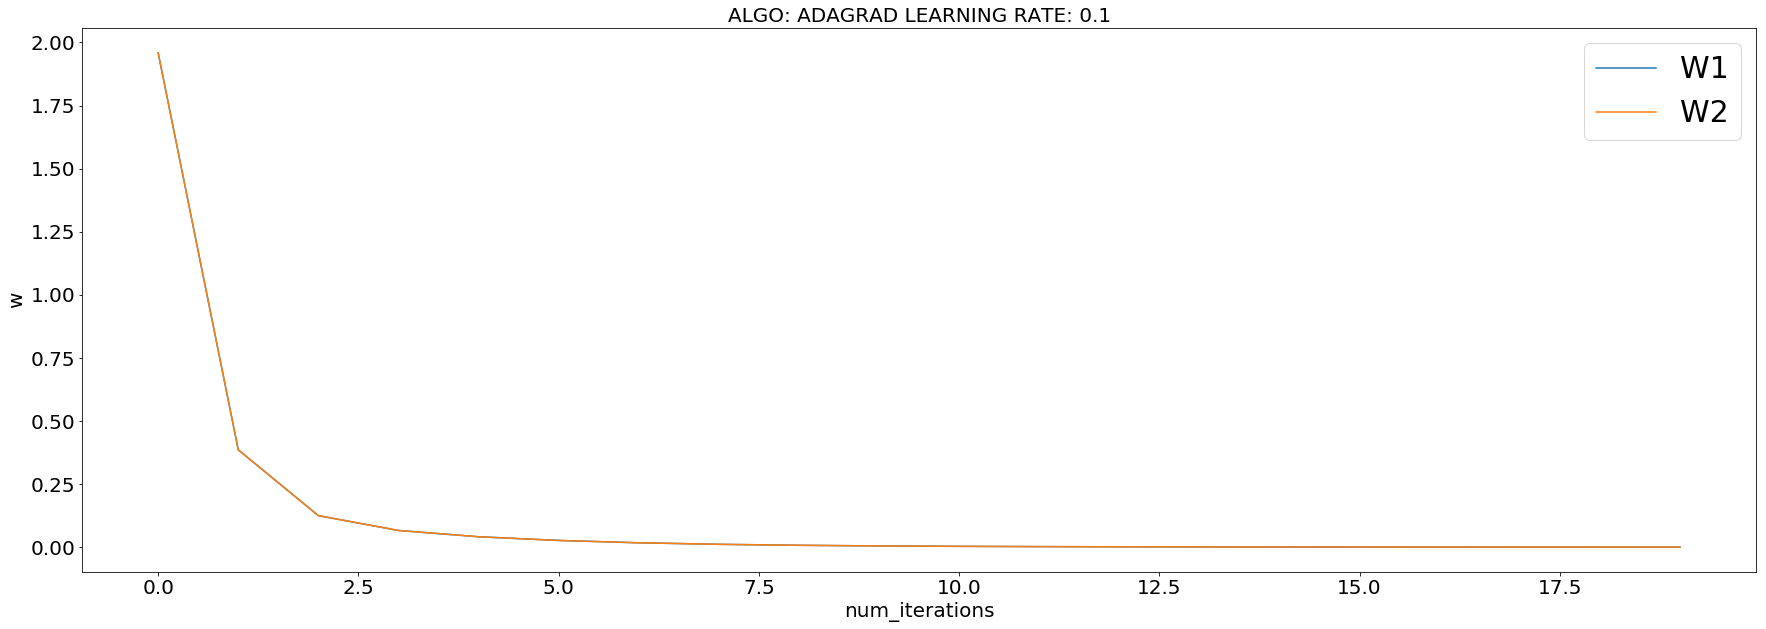

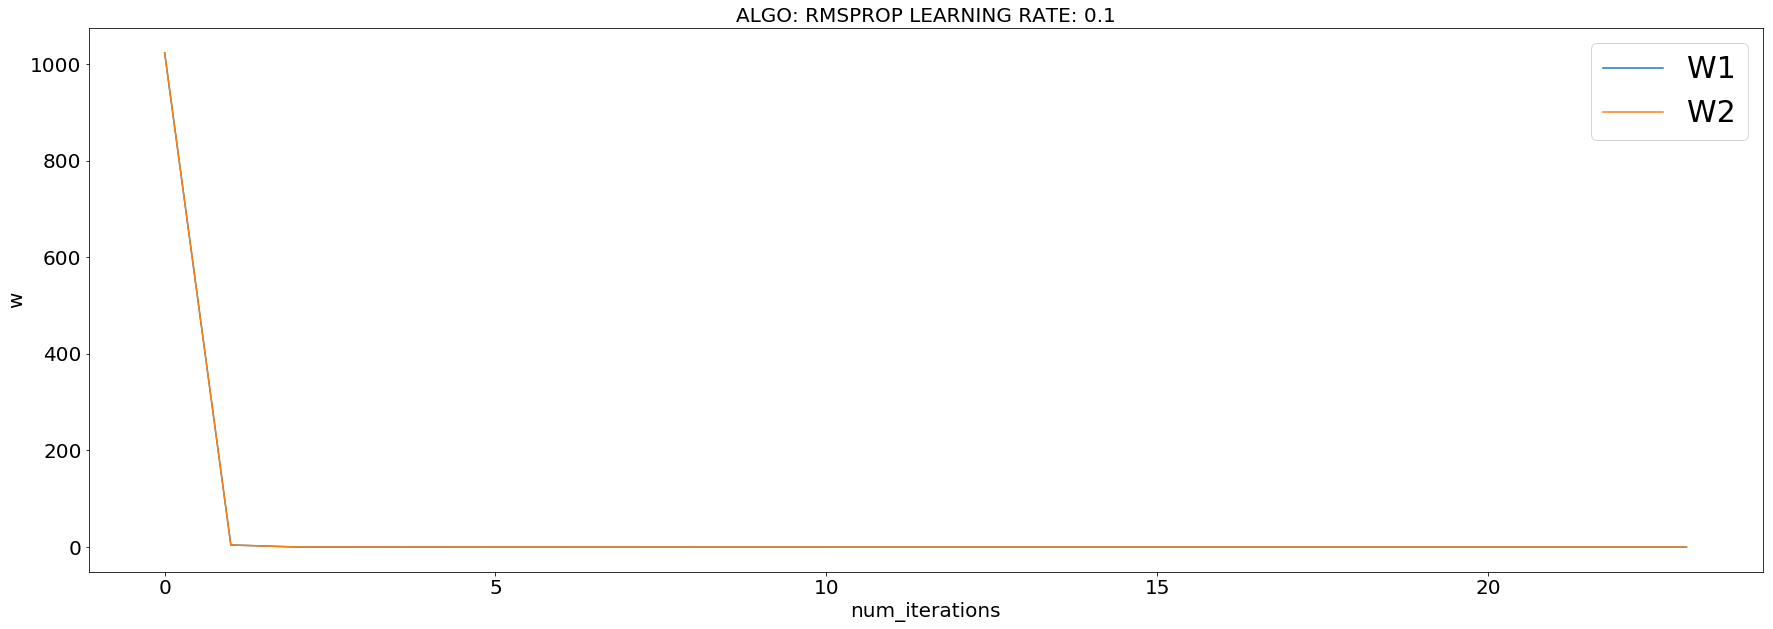

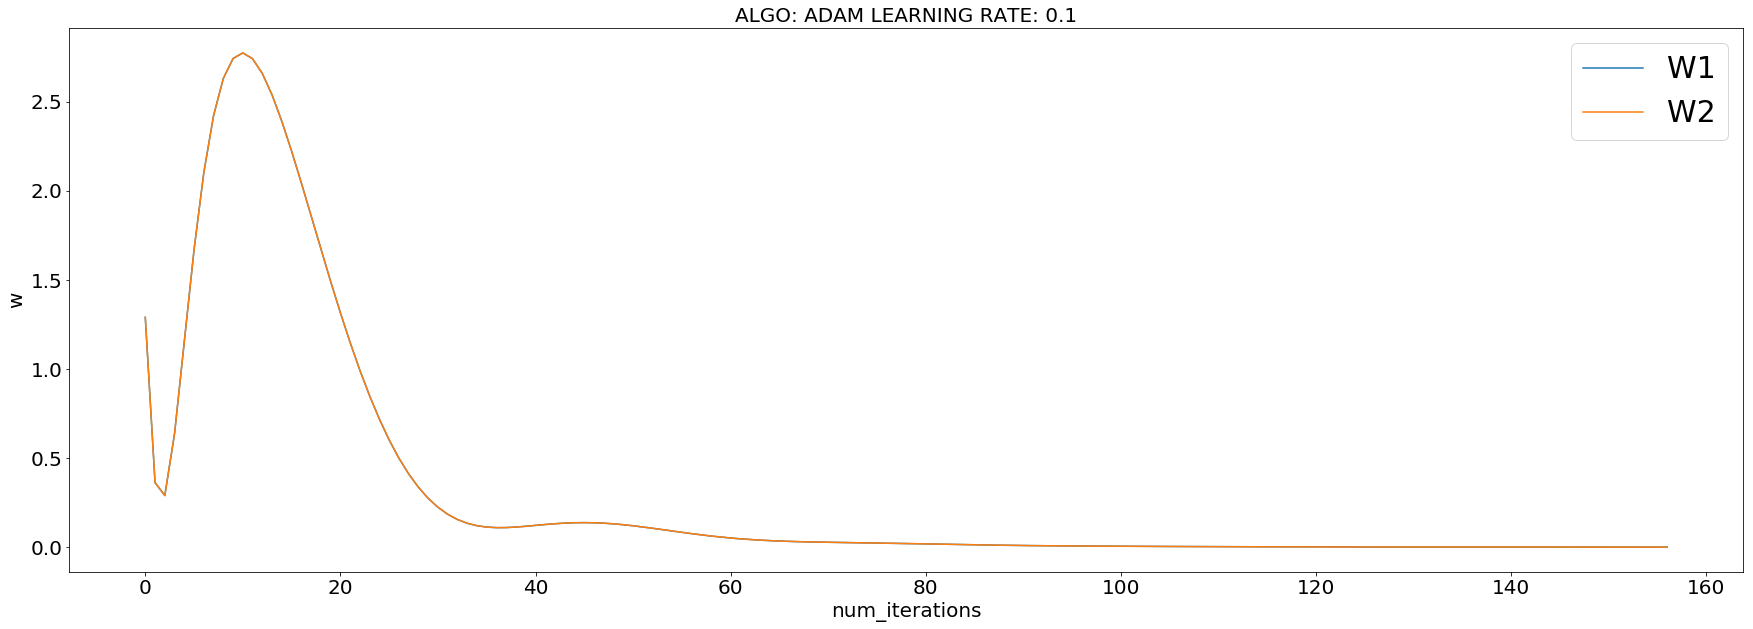

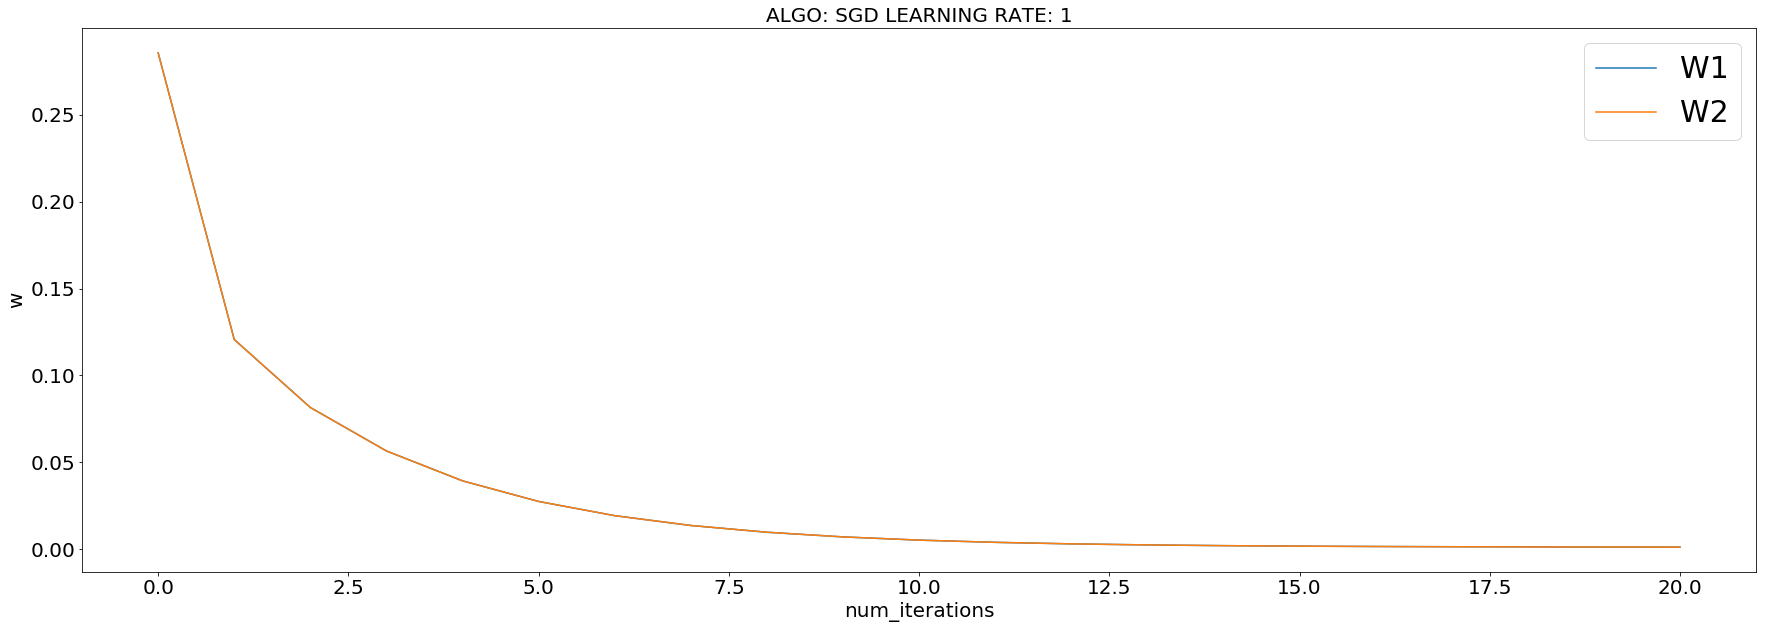

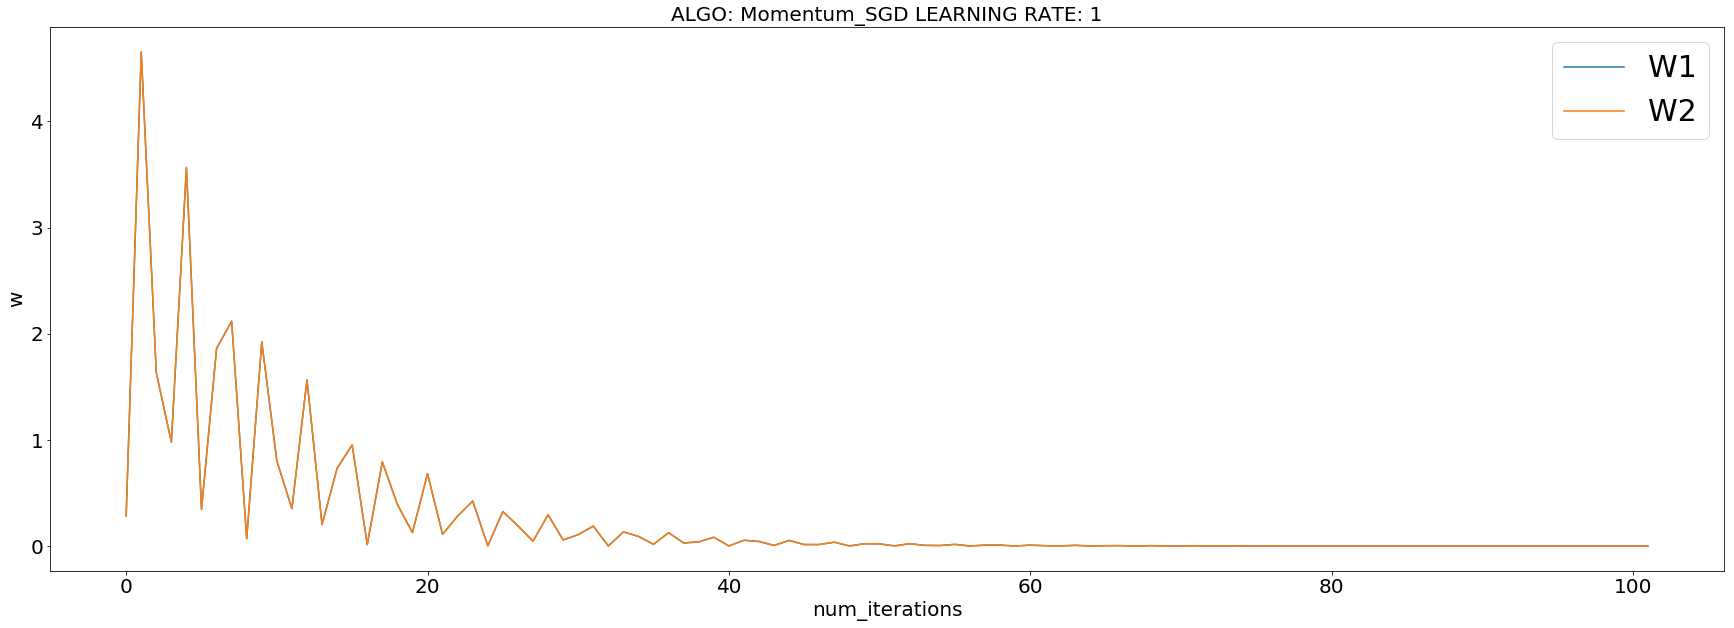

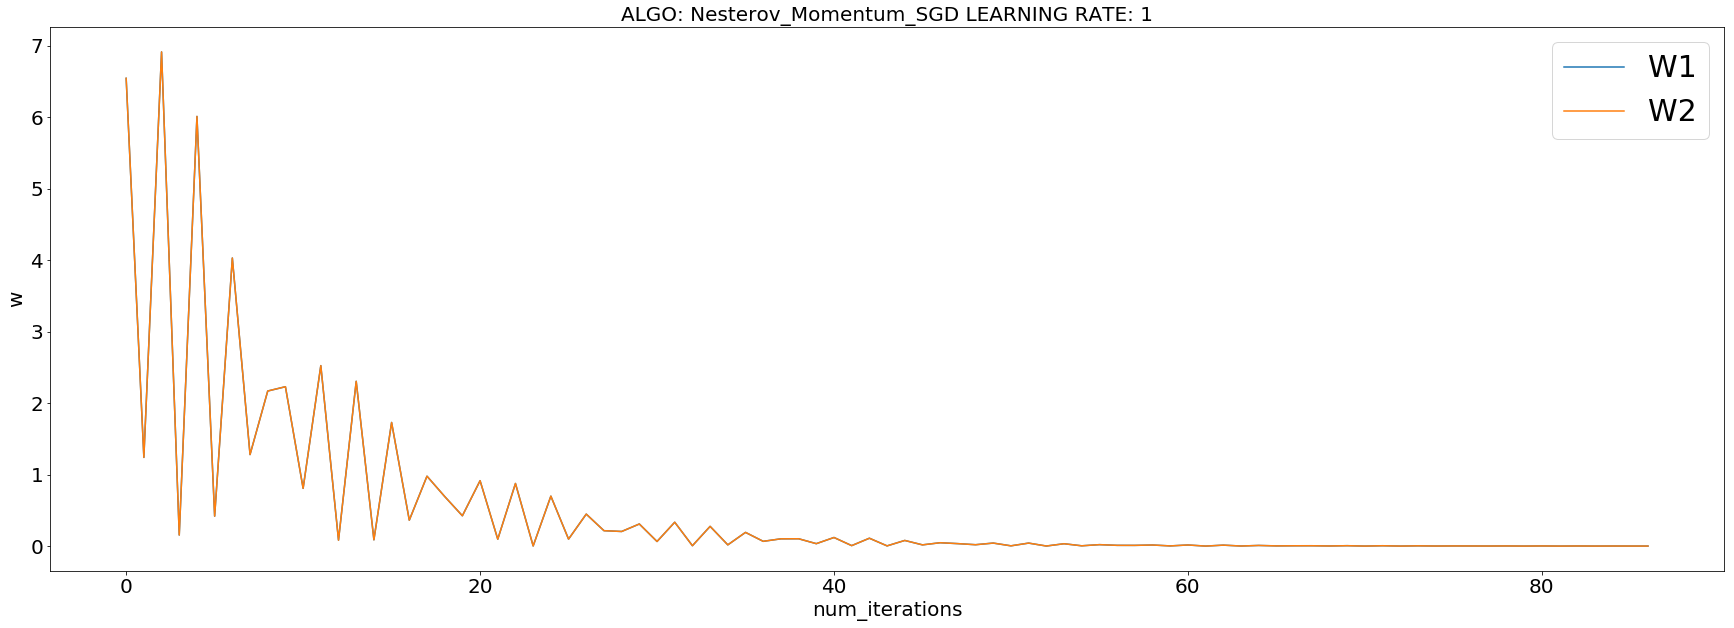

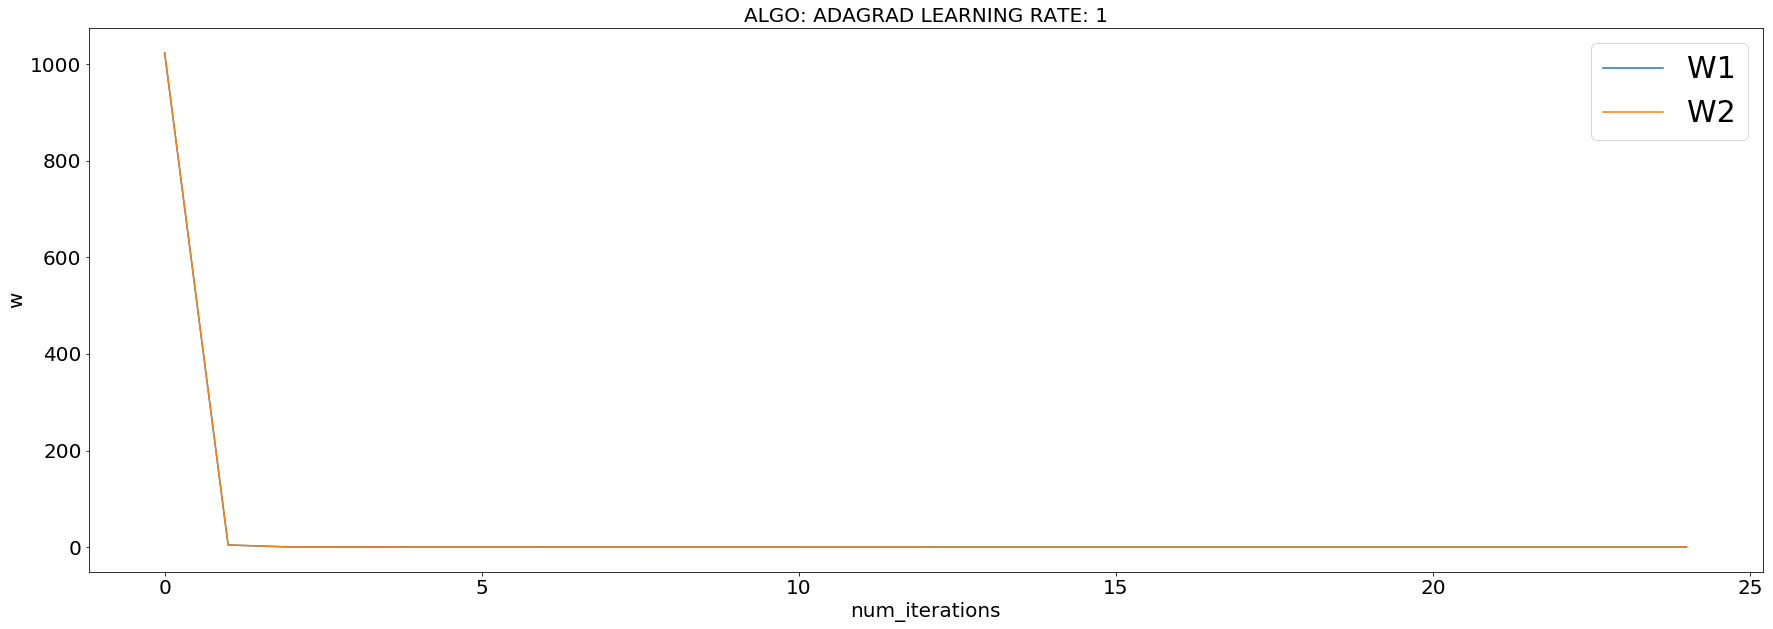

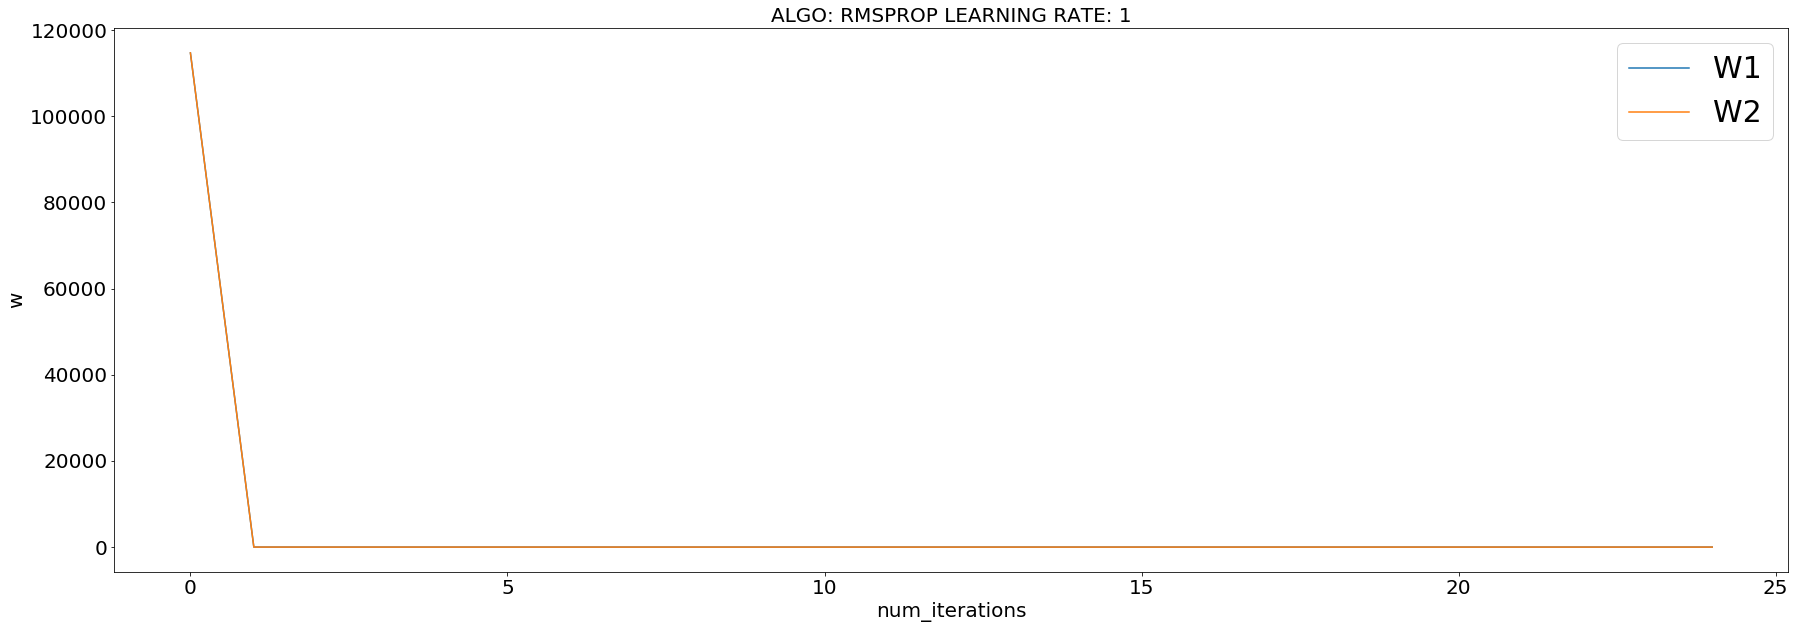

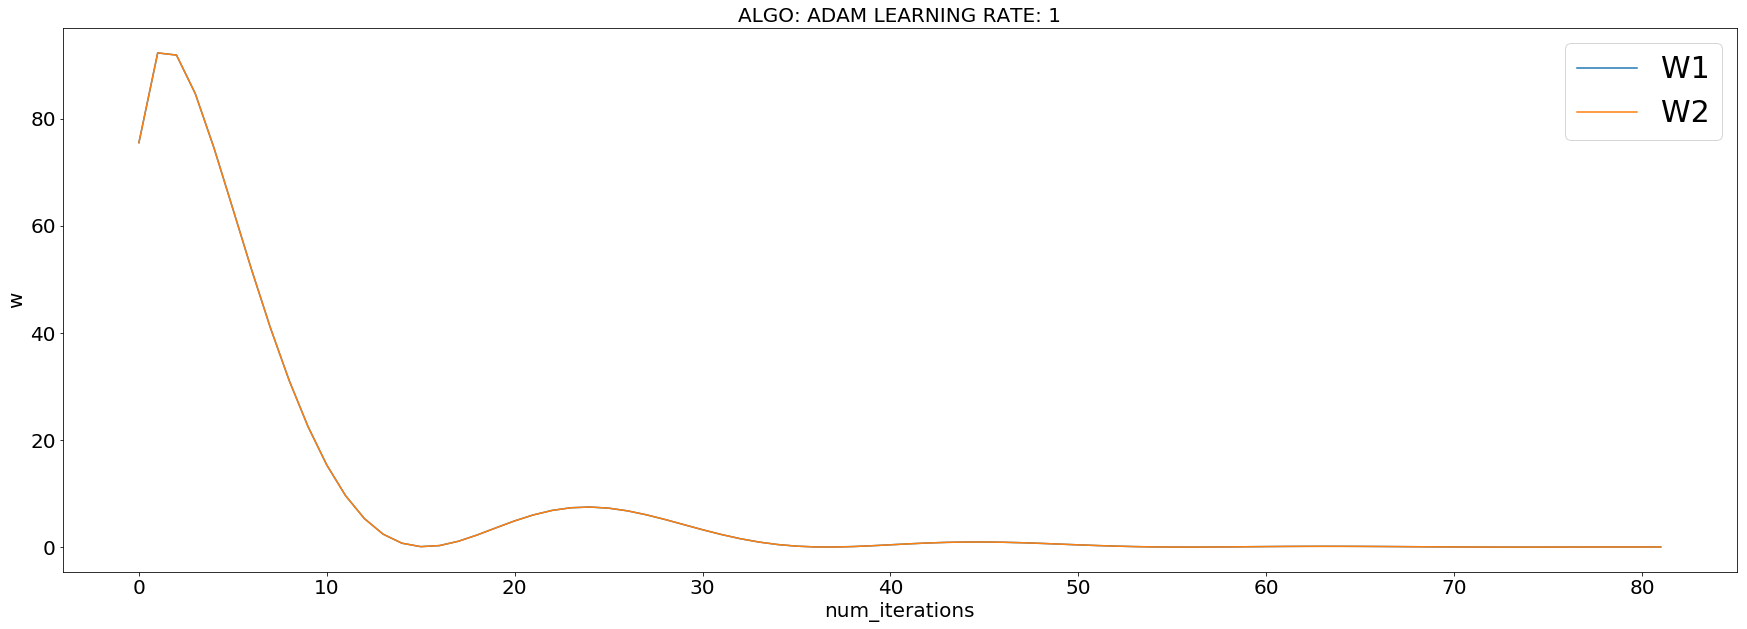

In [17]:
for each_learning_rate in lst_of_learning_rates:
    for each_algo in order:
        plt.figure(figsize=(30, 10))
        viz_ws = dict_err_learning_rates[each_learning_rate][each_algo]
        #print "ALGO: {} learning rate: {}".format(each_algo, each_learning_rate)
        plt.title('ALGO: {} LEARNING RATE: {}'.format(each_algo, each_learning_rate), fontsize=20)
        plt.plot([i for i, _ in enumerate(viz_ws)], viz_ws, label='W1')
        plt.legend(fontsize=30)
        plt.plot([i for i, _ in enumerate(viz_ws)], viz_ws, label='W2')
        plt.legend(fontsize=30)
        plt.xlabel('num_iterations', fontsize=20)
        plt.ylabel('w', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        print "\n"

# Important Questions Continued

**Is Adam always better than SGD?**

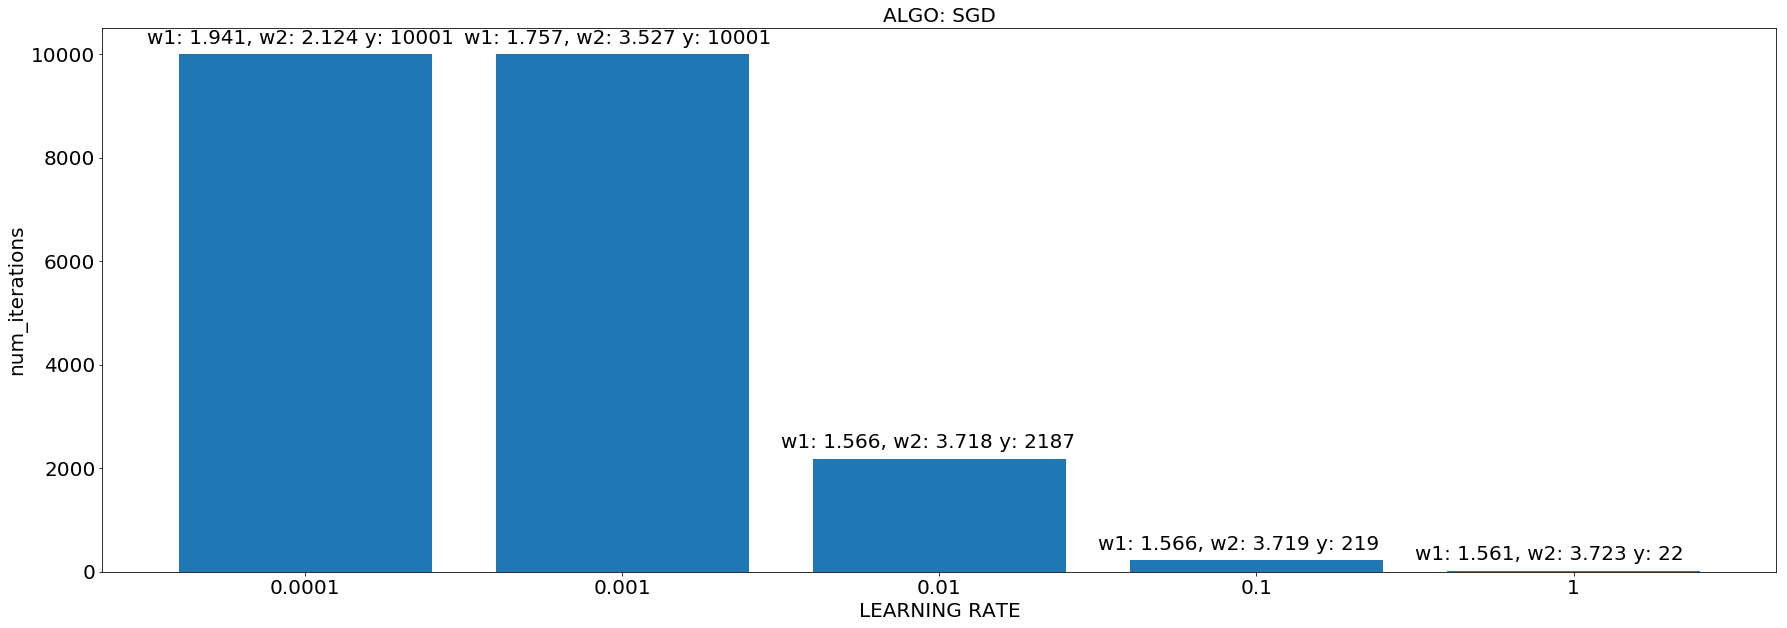

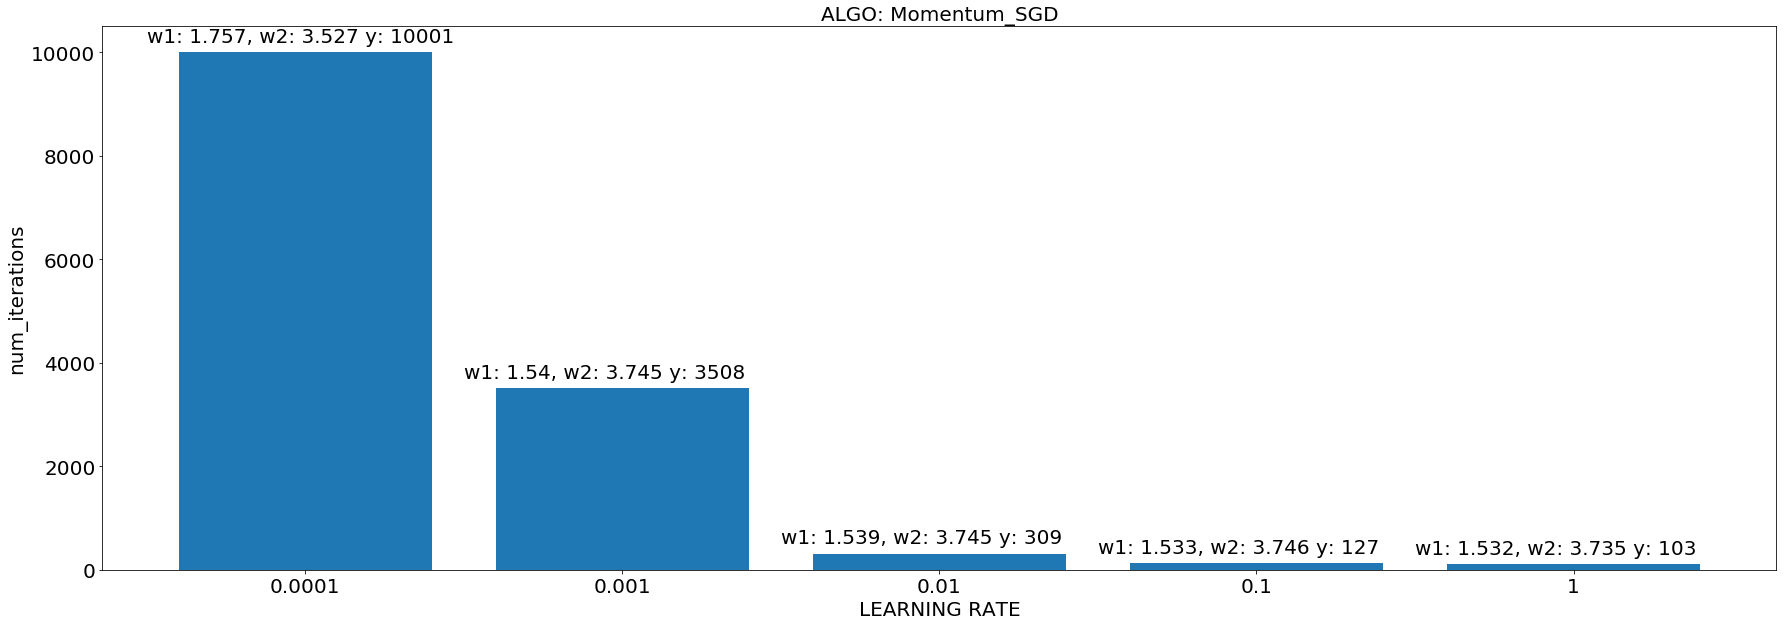

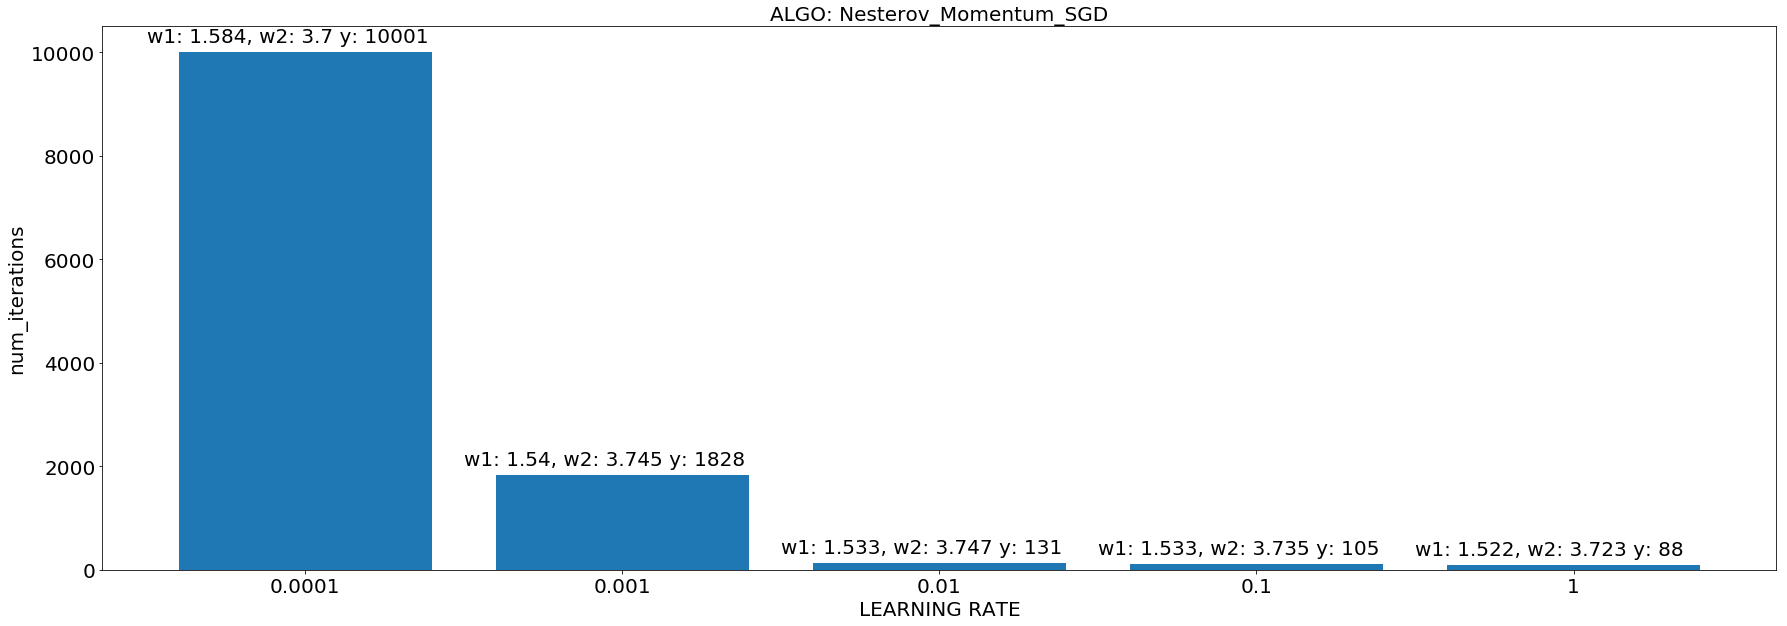

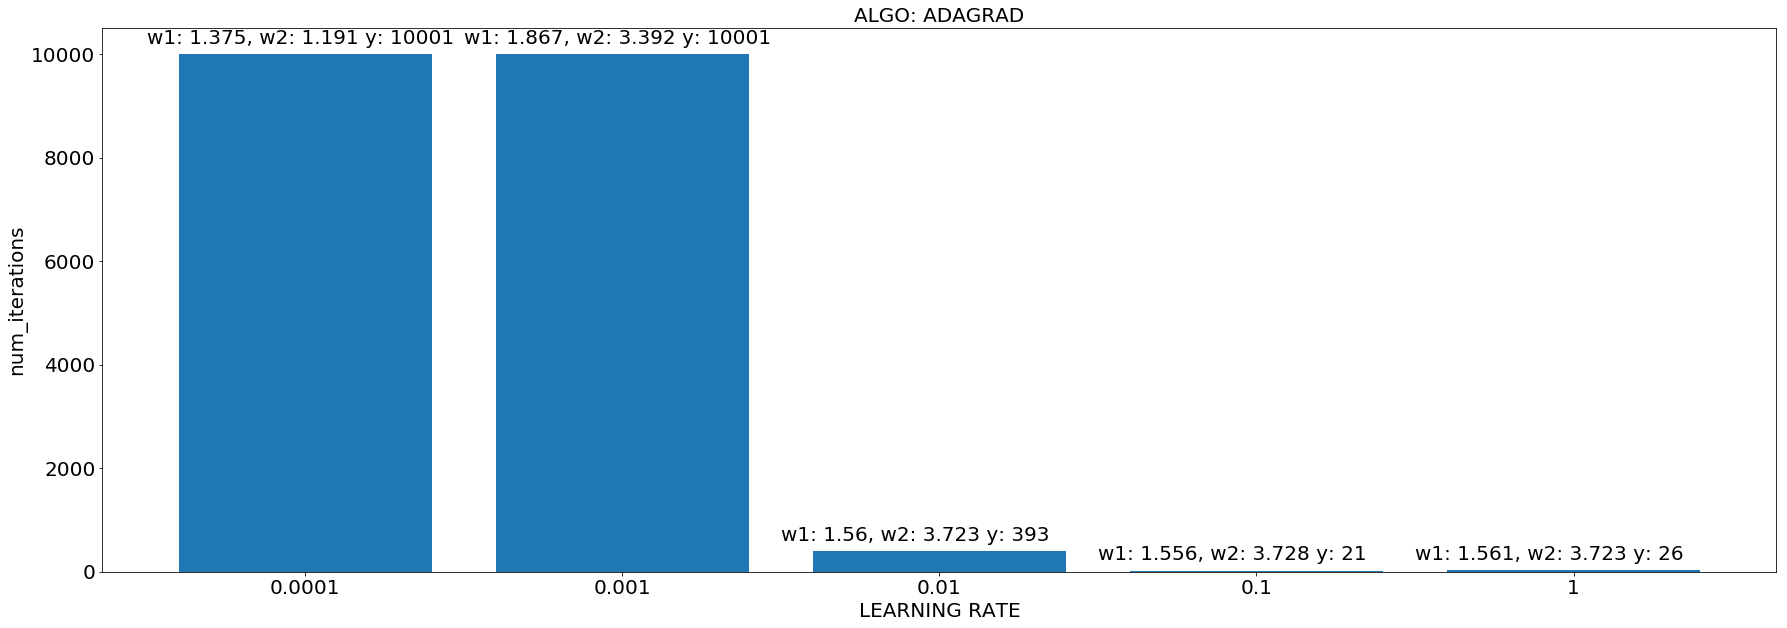

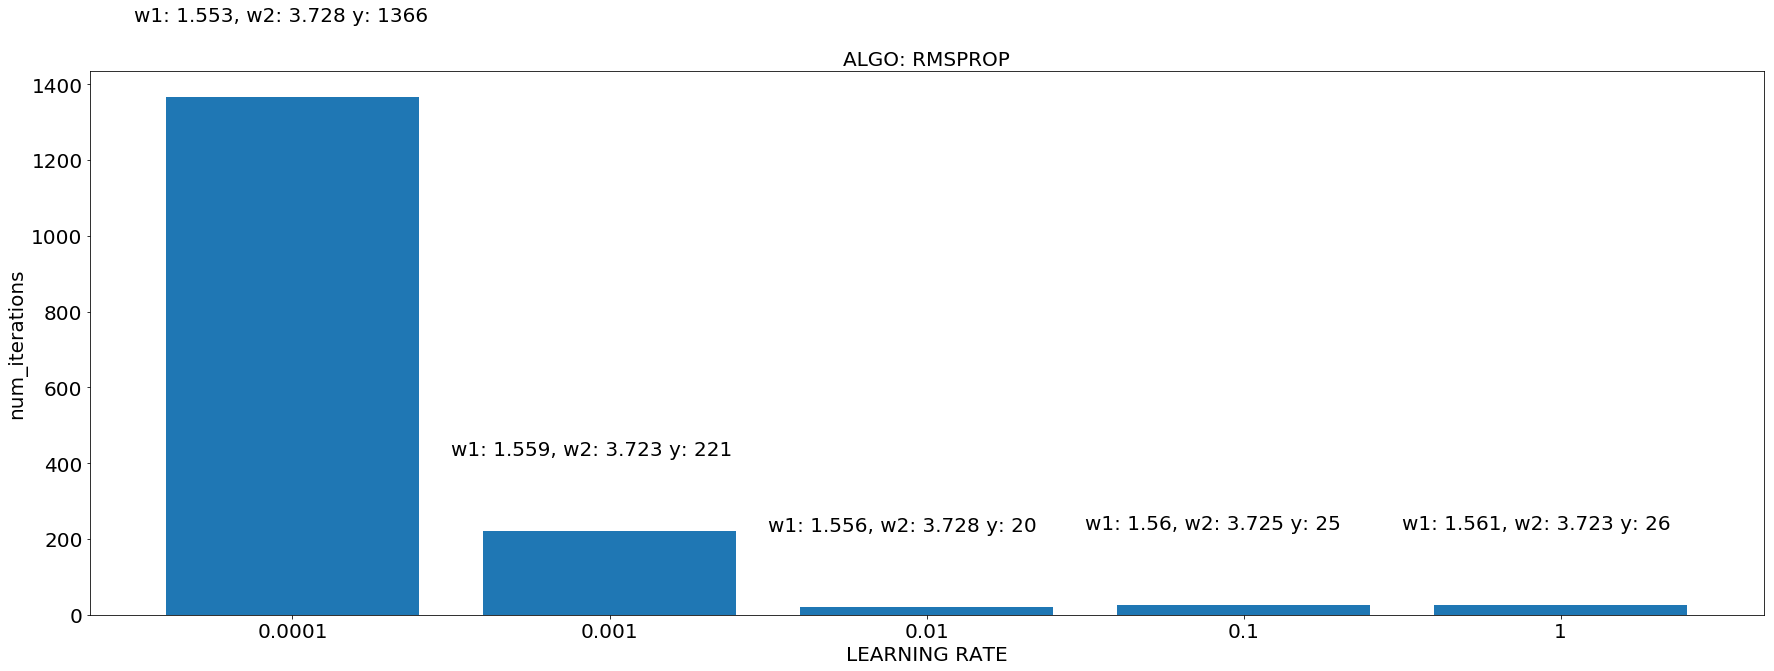

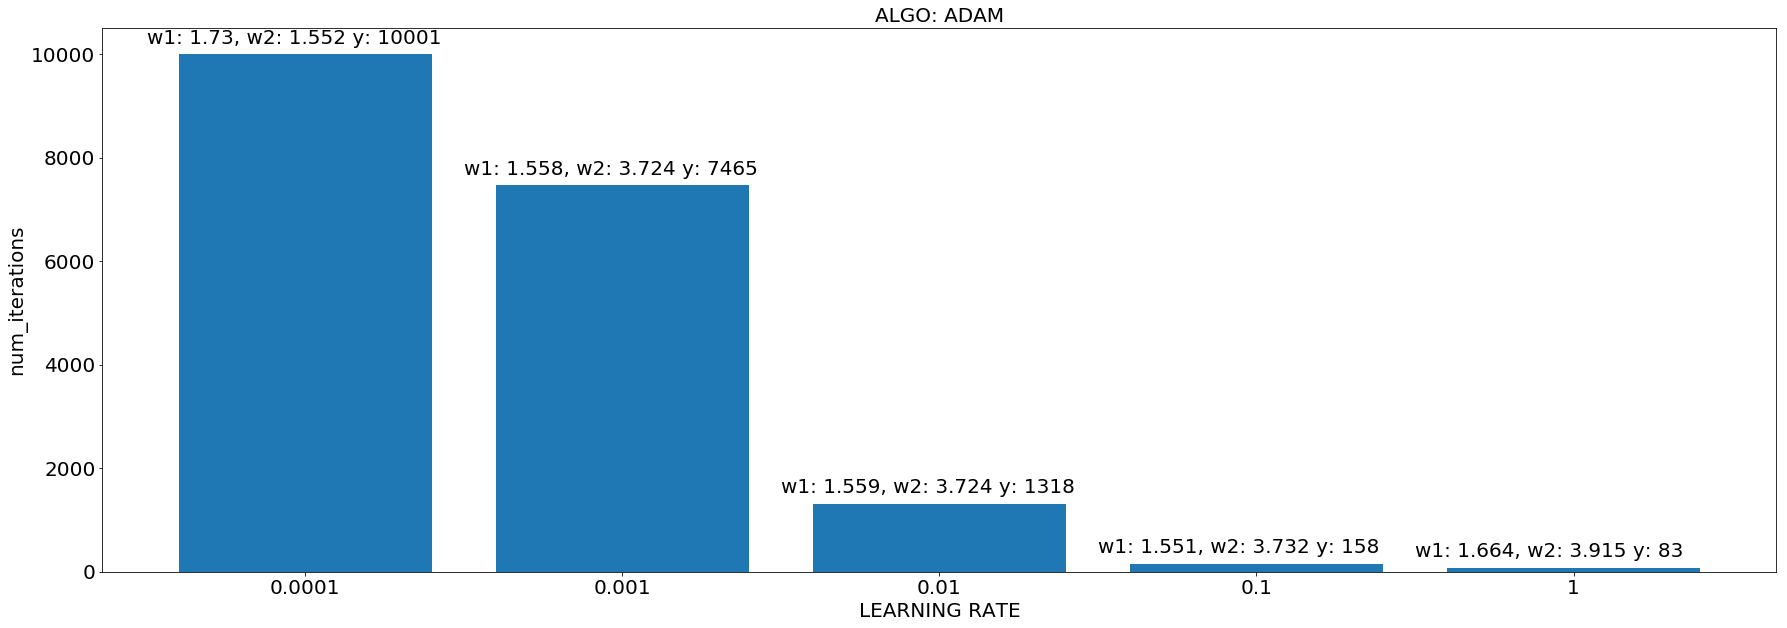

In [18]:
for each_algo in order:
    all_lens = []
    all_learning_rates = []
    tick_labels = []
    w1 = []
    w2 = []
    for each_learning_rate in lst_of_learning_rates:
        viz_ws = dict_w_learning_rates[each_learning_rate][each_algo]
        all_lens.append(len(viz_ws))
        w1.append(viz_ws[-1][0])
        w2.append(viz_ws[-1][1])
        all_learning_rates.append(np.log10(each_learning_rate))
        tick_labels.append(each_learning_rate)
    plt.figure(figsize=(30, 10))
    plt.title('ALGO: {}'.format(each_algo), fontsize=20)
    plt.bar(all_learning_rates, all_lens)
    plt.xlabel('LEARNING RATE', fontsize=20)
    plt.ylabel('num_iterations', fontsize=20)
    plt.xticks(all_learning_rates, [0.0001, 0.001, 0.01, 0.1, 1], fontsize=20)
    plt.yticks(fontsize=20)
    for i, x in enumerate(all_learning_rates):
        plt.text(x - 0.5, all_lens[i] + 200, 'w1: {}, w2: {} y: {}'.format(str(round(w1[i], 3)), str(round(w2[i], 3)), str(all_lens[i])), fontsize=20)
    plt.show()
        
    

# Important Questions Continued


**Does SGD guarantee a minima?**

**Does SGD guarantee global minima?**

# Effect of Learning Rates on Convergence
<img src=learningrates.jpg>

# Look at a function that has multiple minima

$y = 6x sin(2x + 3)$

In [19]:
x1 = [x * 1./1000 + np.random.random() - np.random.random() for x in range(-1000, 1000)]
np.random.shuffle(x1)
x1 = np.array(x1)
y = 6 * x1 * np.sin(2 * x1 + 3)

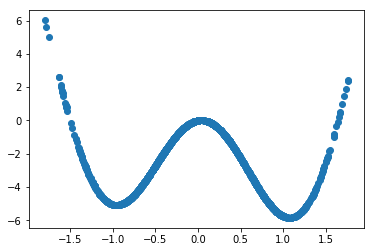

In [20]:
plt.scatter(x1, y)

In [21]:
def SGD_multi(lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    #orig_err = np.sum((lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = delta = 2 * 6 * lst_of_ws * np.cos(2*lst_of_ws + 3) + 6 * np.sin(2*lst_of_ws + 3)
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 2 * 6 * lst_of_ws * np.cos(2*lst_of_ws + 3) + 6 * np.sin(2*lst_of_ws + 3)
        delta = delta.reshape(1,)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        #orig_err = np.sum(((lst_of_ws.dot((lst_of_xs * np.sin(2 * lst_of_xs + 3)).)).reshape(2000, 1)**2)) * 1.
        #lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['SGD'] = viz_ws
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, lst_of_ws

**BTW, why did I have to write three different SGD functions? One for quadratic example, one for the planar example and one for the multiple minima example?**

# Does it always converge? If yes, to the same minima?

In [28]:
lst_of_ws = np.array([0.1])
xx = SGD_multi(copy.deepcopy(lst_of_ws), 0.001)

STARTING WEIGHTS:  [0.1]
FINAL WEIGHTS:  [1.07390173]
NUMBER OF STEPS:  354
